# Conftur - Analysis

Jupyter Notebook that analyzes data for studying the correlation between the "touristicy" of conference venue and its articles impact.

Our analysis are mainly diveded in two parts:
* Exploratory analysis on the bibliometric data
* Computation and analysis of the correlation between the articles impact and the touristicy of the different conferences locations

____________________________________________________________

For this process, our datasets are going to be used. They can be generated running the notebooks contained in the ```Dataset Creation Pipeline``` folder.


In [1]:
# Libraries Import
from datetime import date
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import os

# Libraries options
#mpl.rcParams['font.size'] = 22
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-colorblind')

/var/folders/gy/9drryydn41lddmpgtpzzxrgw0000gn/T/ipykernel_49169/1713821756.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


## File Paths
Please set your working directory paths.

In [2]:
# ******************* PATHS ********************+

# Import Directory Path
path_file_import = r'/Users/marcoterzulli/File/Scuola Local/Magistrale/Materiale Corsi Attuali/Tirocinio/Cartella di Lavoro/Archivi Dump di Lavoro/Import/'

# CSV Exports Directory Path
path_file_export = r'/Users/marcoterzulli/File/Scuola Local/Magistrale/Materiale Corsi Attuali/Tirocinio/Cartella di Lavoro/Archivi Dump di Lavoro/Export/'

### Creation of the Output Directories

In [3]:
if not os.path.exists(path_file_export + 'charts'):
    os.makedirs(path_file_export + 'charts')

<br/>

## Import of the Datasets

#### Citation Dataset

In [4]:
df_citations_and_locations = pd.read_csv(path_file_import + 'out_COCI_citations_and_locations_analysis_ready.csv', low_memory=False, index_col=[0])
print(f'Successfully Imported the Conference Citations and Locations CSV')

Successfully Imported the Conference Citations and Locations CSV


#### Conference Ranking Datasets

In [5]:
df_conference_series_grin_rank = pd.read_csv(path_file_import + 'out_conference_series_with_grin_rank.csv', low_memory=False, index_col=[0])
print(f'Successfully Imported the Grin Conference Rank CSV')

Successfully Imported the Grin Conference Rank CSV


In [6]:
df_conference_series_core_rank = pd.read_csv(path_file_import + 'out_conference_series_with_core_rank.csv', low_memory=False, index_col=[0])
print(f'Successfully Imported the CORE Conference Rating CSV')

Successfully Imported the CORE Conference Rating CSV


#### Conference Acceptance Rate Dataset

In [7]:
df_conference_acceptance_rate = pd.read_csv(path_file_import + 'out_conference_acceptance_rate.csv', low_memory=False, index_col=[0])
print(f'Successfully Imported the Conference Acceptance Rate CSV')

Successfully Imported the Conference Acceptance Rate CSV


#### City Touristic Indexes Dataset

In [8]:
df_city_touristic_indexes = pd.read_csv(path_file_import + 'out_city_touristc_indexes.csv', low_memory=False, index_col=[0])
print(f'Successfully Imported the City Touristic Indexes CSV')

Successfully Imported the City Touristic Indexes CSV


#### Country Touristic Indexes Datasets

In [9]:
df_country_touristic_indexes = pd.read_csv(path_file_import + 'out_country_touristc_indexes.csv', low_memory=False, index_col=[0])
print(f'Successfully Imported the Country Touristic Indexes CSV')

Successfully Imported the Country Touristic Indexes CSV


In [10]:
df_country_yearly_tourist_arrivals = pd.read_csv(path_file_import + 'out_country_yearly_tourist_arrivals.csv', low_memory=False, index_col=[0])
print(f'Successfully Imported the Country Yarly Tourists Arrivals CSV')

Successfully Imported the Country Yarly Tourists Arrivals CSV


<br/><br/>

____________________________________________________________

## Data Cleanup
Before proceeding with the analysis, we need to filter the two recent articles and the too old one (we do not have enough data for the oldest conferences).

In [11]:
df_citations_and_locations

CitationCount                                 ConferenceLocation  \
0                   10                       Austin, Texas, United States   
1                    5        Wrocław, Lower Silesian Voivodeship, Poland   
2                   11                          Innsbruck, Tyrol, Austria   
3                    1  Villefranche-sur-Saône, Auvergne-Rhône-Alpes, ...   
4                    9        Zakopane, Lesser Poland Voivodeship, Poland   
...                ...                                                ...   
3107878              4         Thessaloniki, Macedonia and Thrace, Greece   
3107879              4         Thessaloniki, Macedonia and Thrace, Greece   
3107880              2         Thessaloniki, Macedonia and Thrace, Greece   
3107881              0         Thessaloniki, Macedonia and Thrace, Greece   
3107882              3         Thessaloniki, Macedonia and Thrace, Greece   

        ConferenceNormalizedName ConferenceSeriesNormalizedName  \
0                      disc 2014                           disc   
1                       esa 2014                            esa   
2                     enter 2013                          enter   
3                      dexa 2002                           dexa   
4                    icaisc 2006                         icaisc   
...                          ...                            ...   
3107878              sapere 2011                         sapere   
3107879              sapere 2011                         sapere   
3107880              sapere 2011                         sapere   
3107881              sapere 2011                         sapere   
3107882              sapere 2011                         sapere   

                                  Doi  Year  
0        10.1007/978-3-662-45174-8_28  2014  
1        10.1007/978-3-662-44777-2_60  2014  
2        10.1007/978-3-319-03973-2_13  2013  
3            10.1007/3-540-46146-9_77  2002  
4                 10.1007/11785231_94  2006  
...                               ...   ...  
3107878   10.1007/978-3-642-31674-6_9  2011  
3107879  10.1007/978-3-642-31674-6_20  2011  
3107880  10.1007/978-3-642-31674-6_25  2011  
3107881  10.1007/978-3-642-31674-6_12  2011  
3107882   10.1007/978-3-642-31674-6_3  2011  

[3107883 rows x 6 columns]

### Removing the too recent articles

In [12]:
actual_year = date.today().year

Here you can specify how many years old articles should be at least

In [13]:
minimum_years = 5

Removing the too recent articles:

In [14]:
df_citations_and_locations = df_citations_and_locations.drop(df_citations_and_locations[df_citations_and_locations.Year > actual_year - minimum_years].index)

### Removing the too old articles

We're going to compute the number of citations for each year, so we can choose the starting year for our analysis.

In [15]:
df_articles_groupby_year = df_citations_and_locations.groupby(['Year']).CitationCount.count()
df_articles_groupby_year.head(50)

Year
1951       19
1952       75
1953       55
1954       44
1955       44
1956       72
1957       87
1958      138
1959      173
1960       66
1961      125
1962       81
1963      106
1964      165
1965      242
1966      167
1967      414
1968      298
1969      412
1970      353
1971      655
1972      973
1973     1354
1974     1593
1975     1399
1976     1799
1977     1412
1978     1944
1979     1978
1980     1973
1981     2590
1982     3214
1983     2608
1984     3129
1985     3479
1986     4583
1987     4723
1988     8136
1989     9444
1990    11409
1991    11520
1992    14013
1993    15515
1994    22345
1995    21537
1996    23668
1997    24675
1998    32151
1999    34126
2000    40685
Name: CitationCount, dtype: int64

Here you can specify the starting year.

In [16]:
start_year = 1981

Removing the too old articles:

In [17]:
df_citations_and_locations = df_citations_and_locations.drop(df_citations_and_locations[df_citations_and_locations.Year < 1981].index)

Reset the indexes after the drop:

In [18]:
df_citations_and_locations = df_citations_and_locations.reset_index(drop=True)

### Removing the Articles Without Citations

In [19]:
df_citations_and_locations = df_citations_and_locations.loc[df_citations_and_locations['CitationCount'] > 0]

<br/><br/>

____________________________________________________________

## Exploratory Data Analysis on the Bibliometric Data

### General Top and Flop 10 Classifications

#### Top 10 Conferences Editions by Citation Count

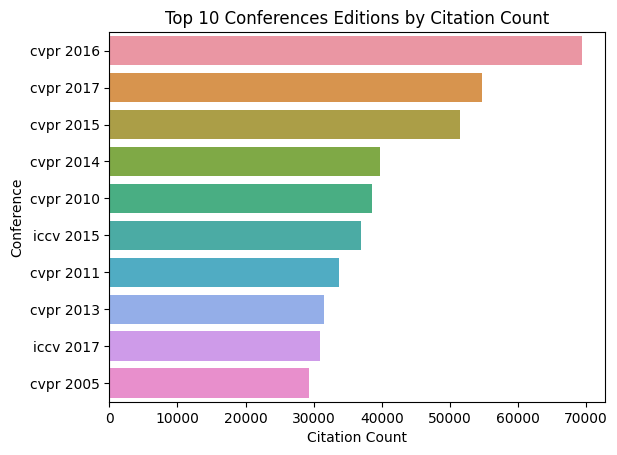

In [20]:
citations_top10 = {v:k for v,k in df_citations_and_locations.groupby(['ConferenceNormalizedName']).CitationCount.sum().sort_values(ascending=False).head(10).items()}

citations_top10_plot = sns.barplot(x=list(citations_top10.values()), y=list(citations_top10.keys()))

plt.title("Top 10 Conferences Editions by Citation Count")
plt.ylabel("Conference")
plt.xlabel("Citation Count")
plt.savefig(path_file_export + 'charts/conf_editions_cit_top_10.png')

#### Flop 10 Conferences Editions by Citation Count

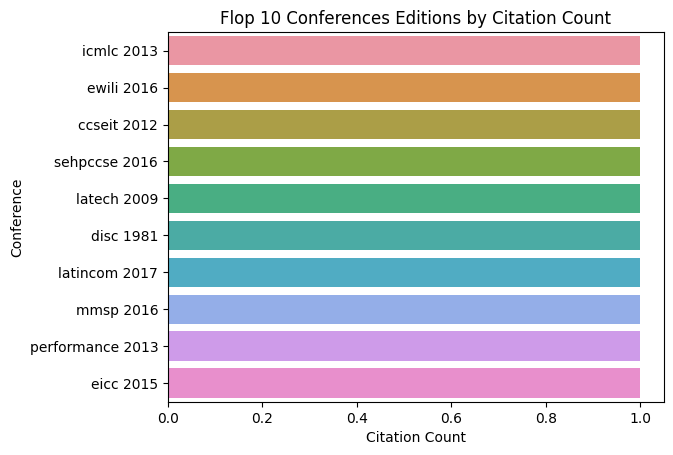

In [21]:
# Only for the conferences with at least a citation
citations_flop10 = {v:k for v,k in df_citations_and_locations[df_citations_and_locations['CitationCount']>0].groupby(['ConferenceNormalizedName']).CitationCount.sum().sort_values().head(10).items()}

citations_flop10_plot = sns.barplot(x=list(citations_flop10.values()), y=list(citations_flop10.keys()))

plt.title("Flop 10 Conferences Editions by Citation Count")
plt.ylabel("Conference")
plt.xlabel("Citation Count")
plt.savefig(path_file_export + 'charts/conf_editions_cit_flop_10.png')

#### Top 10 Conferences Editions by AVG Citation Count

In [22]:
single_conference_cit = df_citations_and_locations.groupby(['ConferenceNormalizedName']).CitationCount.sum().sort_values(ascending=False)
single_conference_count_article = df_citations_and_locations.groupby(['ConferenceNormalizedName']).CitationCount.count().sort_values(ascending=False)

# AVG Citations Computation
single_conference_avg_cit = {key: (int(val) / int(single_conference_count_article[key])) for key, val in single_conference_cit.items()}

# Dataframe creation
single_conference = {k: [v, single_conference_avg_cit[k], single_conference_count_article[k]] for k, v in single_conference_cit.items()}
df_single_conference = pd.DataFrame(data=single_conference.values(), index=single_conference.keys(), columns=['Total Citations', 'AVG Citations', 'N. of Articles'])
df_single_conference = df_single_conference.sort_values('AVG Citations', ascending=False)

df_single_conference.head(10)

Total Citations  AVG Citations  N. of Articles
amia 2009                 3792    1896.000000               2
security 2004             1058    1058.000000               1
icis 2000                  909     909.000000               1
neurips 1988              1033     516.500000               2
mobicom 2000             13929     497.464286              28
wmcsa 1999                5772     481.000000              12
sigir 2001                1433     477.666667               3
aipr 1994                  452     452.000000               1
iwssd 1993                1092     364.000000               3
mobicom 2001              9726     324.200000              30

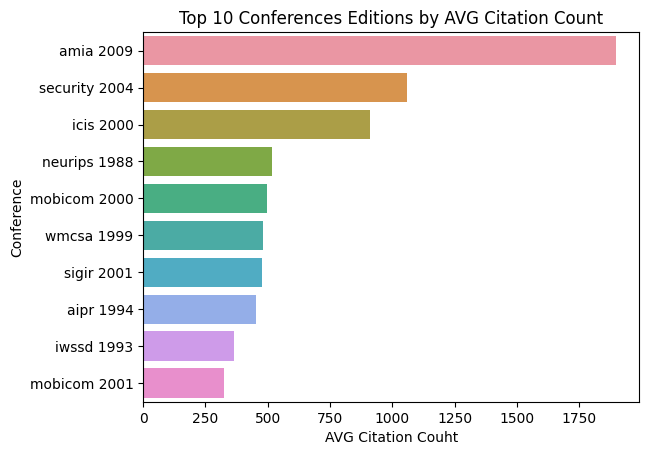

In [23]:
citations_top10_avg = {k:v for k,v in df_single_conference['AVG Citations'].sort_values(ascending=False).head(10).items()}
citations_top10_avg_plot = sns.barplot(x=list(citations_top10_avg.values()), y=list(citations_top10_avg.keys()))

plt.title("Top 10 Conferences Editions by AVG Citation Count")
plt.ylabel("Conference")
plt.xlabel("AVG Citation Couht")
plt.savefig(path_file_export + 'charts/conf_editions_cit_avg_top_10.png')

#### Top 10 Considerations
We can notice that the Top 10 Classification by total citations number is different from the Top 10 Classification by the AVG citations. 

It could be interesting to understand the density of the number of articles of each conference.

/var/folders/gy/9drryydn41lddmpgtpzzxrgw0000gn/T/ipykernel_49169/1545099284.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  article_by_conference_plot = sns.distplot([v for k,v in single_conference_count_article.items()])


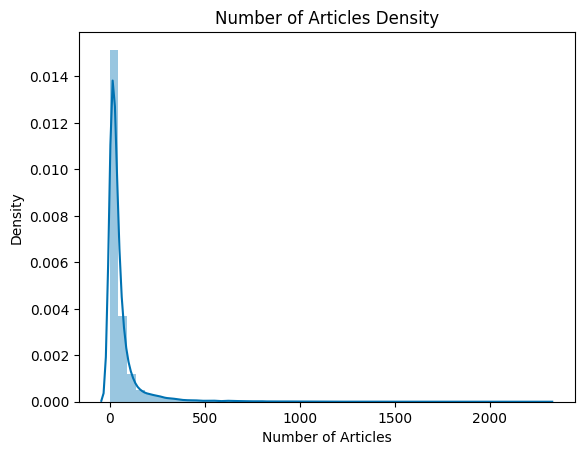

In [24]:
article_by_conference_plot = sns.distplot([v for k,v in single_conference_count_article.items()])
avg_article_by_conference = sum([v for k,v in single_conference_count_article.items()]) / len(single_conference_count_article)

plt.title("Number of Articles Density")
plt.xlabel("Number of Articles")
plt.savefig(path_file_export + 'charts/conf_articles_density.png')

In [25]:
print(f"AVG Articles by conference: {avg_article_by_conference}")

AVG Articles by conference: 58.46580350342727


We can notice that there's a really small number of conferences with a huge number of articles. However, the most of the conferences are in the 10-200 articles range.

<br/>

### Conferences Evolution Analysis
We're going to study the evolution of a conferences in its editions.

#### AVG Citations of the Conferences
AVG Citation calculated over all the editions of a conference, without considering the year.

In [26]:
conference_tot_cit = df_citations_and_locations.groupby(['ConferenceSeriesNormalizedName']).CitationCount.sum()
conference_tot_article = df_citations_and_locations.groupby(['ConferenceSeriesNormalizedName']).CitationCount.count()
avg_cit_for_conference = {key:(int(val) / int(conference_tot_article[key])) for key, val in conference_tot_cit.items()}

conference = {k: [v, avg_cit_for_conference[k], conference_tot_article[k]] for k, v in conference_tot_cit.items()}
df_conference = pd.DataFrame(data=conference.values(), index=conference.keys(), columns=['Total Citations', 'AVG Citations', 'N. of Articles'])
df_conference = df_conference.sort_values(['AVG Citations'], ascending=False)

df_conference.head(10)

Total Citations  AVG Citations  N. of Articles
neurips              1033     516.500000               2
amia                 3861     351.000000              11
wsna                 4641     309.400000              15
mobidata             4202     182.695652              23
avmfss                111     111.000000               1
security             1359     104.538462              13
banff                 309     103.000000               3
fosad                 487      81.166667               6
avc                  5968      77.506494              77
hotpower              306      76.500000               4

#### Top 10 Conferences by Citation Count

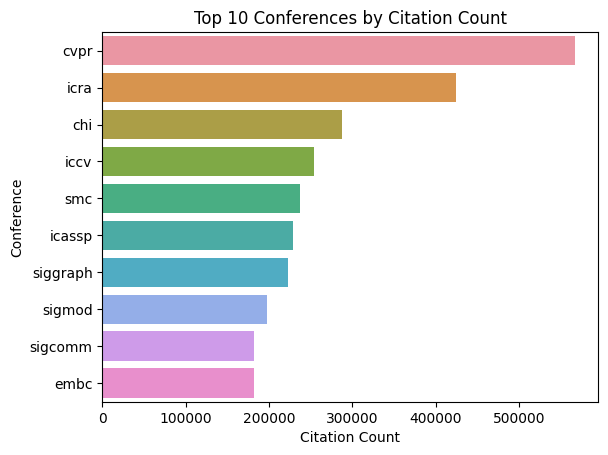

In [27]:
citations_top10_conference_by_cit = {k:v for k,v in df_conference['Total Citations'].sort_values(ascending=False).head(10).items()}
citations_top10_conference_by_cit_plot = sns.barplot(x = list(citations_top10_conference_by_cit.values()), y = list(citations_top10_conference_by_cit.keys()))

plt.title("Top 10 Conferences by Citation Count")
plt.ylabel("Conference")
plt.xlabel("Citation Count")
plt.savefig(path_file_export + 'charts/conf_cit_top_10.png')

#### Top 10 Conferences by AVG Citation Count

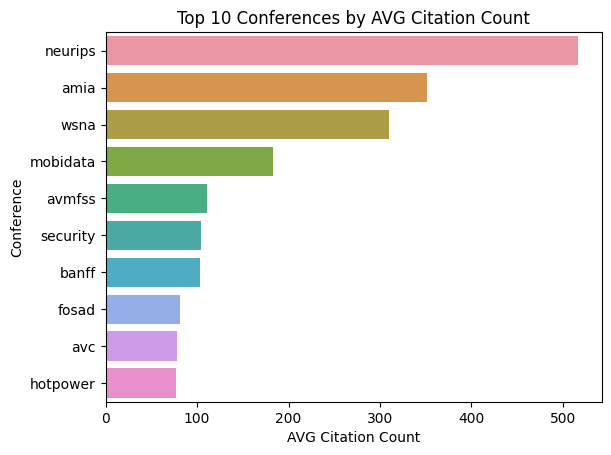

In [28]:
citations_top10_conference_by_avg_cit = {k:v for k,v in df_conference['AVG Citations'].sort_values(ascending=False).head(10).items()}
citations_top10_conference_by_avg_cit_plot = sns.barplot(x = list(citations_top10_conference_by_avg_cit.values()), y = list(citations_top10_conference_by_avg_cit.keys()))

plt.title("Top 10 Conferences by AVG Citation Count")
plt.ylabel("Conference")
plt.xlabel("AVG Citation Count")
plt.savefig(path_file_export + 'charts/conf_cit_avg_top_10.png')

<br/>

### Study of the Evolution of the Conferences

The study of the evolution of the conferences is one of the most important factors that we need to study for correctly understanding the correlation between the obtained citations and the conference location of a given year.

#### Creation of the Support Structures

**Creation of the dataframe with Total Citations and AVG Citations for each year**

In [29]:
lst_dataframes = []
conference_tot_cit = df_citations_and_locations.groupby(['ConferenceSeriesNormalizedName', 'Year']).CitationCount.sum()
conference_tot_article = df_citations_and_locations.groupby(['ConferenceSeriesNormalizedName', 'Year']).CitationCount.count()
keys = df_citations_and_locations.groupby(['ConferenceSeriesNormalizedName']).CitationCount.count().keys()

for conference in keys:
    single_conference = {}
    tot_cit = 0
    tot_article = 0
    n_editions = 0

    for k, v in conference_tot_cit[conference].items():
        single_conference[str(k) + ' - Total Citations'] = v   # totoal citations for each conference year
        single_conference[str(k) + ' - AVG Citations'] = v / conference_tot_article[conference][k] # avg citations for each conference year
        tot_cit += v #calcolo cit totali
        tot_article += conference_tot_article[conference][k]  # total number of articles for each conference
        n_editions += 1 # number of conference editions for each conference
    single_conference['Total Citations'] = tot_cit
    single_conference['AVG Citations'] = tot_cit / tot_article
    single_conference['N. of Editions'] = n_editions

    # each dataframe contains a conference
    lst_dataframes.append(pd.DataFrame(data = [single_conference.values()], index = [conference], columns = single_conference.keys()))

# creation of the final dataframe
df_conf_evolution = pd.concat(lst_dataframes)

# column and row sort
df_conf_evolution = df_conf_evolution.reindex(sorted(df_conf_evolution.columns), axis=1)
df_conf_evolution = df_conf_evolution.sort_values(['N. of Editions'], ascending=False)

df_conf_evolution

1981 - AVG Citations  1981 - Total Citations  \
icalp                   13.405405                   496.0   
stoc                    26.463415                  1085.0   
sigmetrics               4.698113                   249.0   
sigmod                  23.406250                   749.0   
popl                    40.789474                   775.0   
...                           ...                     ...   
ihis                          NaN                     NaN   
igis                          NaN                     NaN   
ifsa/nafips                   NaN                     NaN   
ifmt                          NaN                     NaN   
idp                           NaN                     NaN   

             1982 - AVG Citations  1982 - Total Citations  \
icalp                   22.128205                   863.0   
stoc                    46.133333                  2076.0   
sigmetrics               4.692308                   244.0   
sigmod                  12.511111                   563.0   
popl                    30.058824                  1022.0   
...                           ...                     ...   
ihis                          NaN                     NaN   
igis                          NaN                     NaN   
ifsa/nafips                   NaN                     NaN   
ifmt                          NaN                     NaN   
idp                           NaN                     NaN   

             1983 - AVG Citations  1983 - Total Citations  \
icalp                   12.352941                   630.0   
stoc                    40.211538                  2091.0   
sigmetrics               6.173913                   142.0   
sigmod                   9.400000                   376.0   
popl                    37.321429                  1045.0   
...                           ...                     ...   
ihis                          NaN                     NaN   
igis                          NaN                     NaN   
ifsa/nafips                   NaN                     NaN   
ifmt                          NaN                     NaN   
idp                           NaN                     NaN   

             1984 - AVG Citations  1984 - Total Citations  \
icalp                    9.166667                   385.0   
stoc                    26.234375                  1679.0   
sigmetrics               7.710526                   293.0   
sigmod                 105.787879                  3491.0   
popl                    29.033333                   871.0   
...                           ...                     ...   
ihis                          NaN                     NaN   
igis                          NaN                     NaN   
ifsa/nafips                   NaN                     NaN   
ifmt                          NaN                     NaN   
idp                           NaN                     NaN   

             1985 - AVG Citations  1985 - Total Citations  \
icalp                   10.575000                   423.0   
stoc                    32.431373                  1654.0   
sigmetrics               9.450000                   378.0   
sigmod                  20.972222                   755.0   
popl                    37.166667                  1115.0   
...                           ...                     ...   
ihis                          NaN                     NaN   
igis                          NaN                     NaN   
ifsa/nafips                   NaN                     NaN   
ifmt                          NaN                     NaN   
idp                           NaN                     NaN   

             1986 - AVG Citations  1986 - Total Citations  \
icalp                   11.024390                   452.0   
stoc                    40.446809                  1901.0   
sigmetrics               7.750000                   186.0   
sigmod                  36.369863                  2655.0   
popl                    31.931034          

**Total Citations Dataframe**

Since we need to study the evolution of the conferences, we're going to remove the conferences that only have one edition and without citations.

In [30]:
lst_dataframes = []
for conference in keys:
    single_conference = {}
    n_editions = 0
    for k, v in conference_tot_cit[conference].items():
        single_conference[str(k)] = v 
        n_editions += 1
        
    if n_editions > 1 and df_conf_evolution.loc[conference]['Total Citations'] > 0:
        lst_dataframes.append(pd.DataFrame(data=[single_conference.values()], index = [conference], columns=single_conference.keys()))

df_cit_evolution = pd.concat(lst_dataframes)

df_cit_evolution = df_cit_evolution.reindex(sorted(df_cit_evolution.columns), axis=1)
df_cit_evolution.head(10)

1981  1982  1983  1984  1985  1986  1987  1988  1989  1990  1991  \
3dic       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3dica      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3dim       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3dimpvt    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3dor       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3dpvt      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3dtv-con   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3dui       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3dv        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3pgcic     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

          1992  1993  1994  1995  1996  1997  1998  1999   2000  2001   2002  \
3dic       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN    NaN   
3dica      NaN   NaN   NaN   NaN   NaN  47.0  90.0  60.0  109.0  21.0   84.0   
3dim       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN    NaN   
3dimpvt    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN    NaN   
3dor       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN    NaN   
3dpvt      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN  954.0   
3dtv-con   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN    NaN   
3dui       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN    NaN   
3dv        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN    NaN   
3pgcic     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN    NaN   

          2003    2004  2005    2006   2007   2008   2009   2010   2011  \
3dic       NaN     NaN   NaN     NaN    NaN    NaN  959.0    NaN    NaN   
3dica      NaN    61.0   NaN    74.0    NaN   56.0    NaN   55.0  173.0   
3dim       NaN     NaN   NaN     NaN    NaN    NaN    NaN    NaN    NaN   
3dimpvt    NaN     NaN   NaN     NaN    NaN    NaN    NaN    NaN  574.0   
3dor       NaN     NaN   NaN     NaN    NaN    1.0    2.0    4.0    6.0   
3dpvt      NaN  1047.0   NaN  1590.0    NaN    NaN    NaN    NaN    NaN   
3dtv-con   NaN     NaN   NaN     NaN    4.0  576.0  329.0  423.0  359.0   
3dui       NaN     NaN   NaN   137.0  318.0  240.0  290.0  338.0    NaN   
3dv        NaN     NaN   NaN     NaN    NaN    NaN    NaN    NaN    NaN   
3pgcic     NaN     NaN   NaN     NaN    NaN    NaN    NaN  265.0  214.0   

           2012   2013   2014   2015   2016   2017  
3dic        NaN    NaN    NaN    NaN    4.0    NaN  
3dica     154.0   36.0    7.0   13.0    NaN    NaN  
3dim       16.0    NaN    NaN    NaN    NaN    2.0  
3dimpvt   913.0    NaN    NaN    NaN    NaN    NaN  
3dor        NaN    NaN    NaN    NaN    NaN    1.0  
3dpvt       NaN    NaN    NaN    NaN    NaN    NaN  
3dtv-con  128.0    NaN  148.0   74.0   39.0   44.0  
3dui      352.0  340.0  431.0  243.0  350.0  336.0  
3dv         NaN  972.0  543.0  389.0    NaN  687.0  
3pgcic    140.0    NaN  219.0  307.0   80.0   85.0

**AVG Citations Dataframe.**

Since we need to study the evolution of the conferences, we're going to remove the conferences that only have one edition and without citations.

In [31]:
lst_dataframes = []
for conference in keys:
    single_conference = {}
    n_editions = 0
    for k,v in conference_tot_cit[conference].items():
        single_conference[str(k)] = v / conference_tot_article[conference][k] 
        n_editions += 1
    
    if n_editions > 1 and df_conf_evolution.loc[conference]['Total Citations'] > 0:
        lst_dataframes.append(pd.DataFrame(data=[single_conference.values()], index = [conference], columns=single_conference.keys()))

df_avg_cit_evolution = pd.concat(lst_dataframes)

df_avg_cit_evolution = df_avg_cit_evolution.reindex(sorted(df_avg_cit_evolution.columns), axis=1)
df_avg_cit_evolution.head(10)

1981  1982  1983  1984  1985  1986  1987  1988  1989  1990  1991  \
3dic       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3dica      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3dim       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3dimpvt    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3dor       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3dpvt      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3dtv-con   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3dui       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3dv        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3pgcic     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

          1992  1993  1994  1995  1996      1997  1998  1999    2000  \
3dic       NaN   NaN   NaN   NaN   NaN       NaN   NaN   NaN     NaN   
3dica      NaN   NaN   NaN   NaN   NaN  4.272727   6.0  3.75  6.8125   
3dim       NaN   NaN   NaN   NaN   NaN       NaN   NaN   NaN     NaN   
3dimpvt    NaN   NaN   NaN   NaN   NaN       NaN   NaN   NaN     NaN   
3dor       NaN   NaN   NaN   NaN   NaN       NaN   NaN   NaN     NaN   
3dpvt      NaN   NaN   NaN   NaN   NaN       NaN   NaN   NaN     NaN   
3dtv-con   NaN   NaN   NaN   NaN   NaN       NaN   NaN   NaN     NaN   
3dui       NaN   NaN   NaN   NaN   NaN       NaN   NaN   NaN     NaN   
3dv        NaN   NaN   NaN   NaN   NaN       NaN   NaN   NaN     NaN   
3pgcic     NaN   NaN   NaN   NaN   NaN       NaN   NaN   NaN     NaN   

              2001  2002  2003      2004  2005       2006       2007  \
3dic           NaN   NaN   NaN       NaN   NaN        NaN        NaN   
3dica     1.909091   6.0   NaN  6.777778   NaN   3.894737        NaN   
3dim           NaN   NaN   NaN       NaN   NaN        NaN        NaN   
3dimpvt        NaN   NaN   NaN       NaN   NaN        NaN        NaN   
3dor           NaN   NaN   NaN       NaN   NaN        NaN        NaN   
3dpvt          NaN   9.0   NaN  9.184211   NaN  12.519685        NaN   
3dtv-con       NaN   NaN   NaN       NaN   NaN        NaN   2.000000   
3dui           NaN   NaN   NaN       NaN   NaN   5.708333  14.454545   
3dv            NaN   NaN   NaN       NaN   NaN        NaN        NaN   
3pgcic         NaN   NaN   NaN       NaN   NaN        NaN        NaN   

              2008       2009       2010       2011       2012       2013  \
3dic           NaN  13.319444        NaN        NaN        NaN        NaN   
3dica     2.947368        NaN   3.437500   6.407407   5.133333   2.571429   
3dim           NaN        NaN        NaN        NaN  16.000000        NaN   
3dimpvt        NaN        NaN        NaN  11.714286  14.265625        NaN   
3dor      1.000000   1.000000   1.333333   2.000000        NaN        NaN   
3dpvt          NaN        NaN        NaN        NaN        NaN        NaN   
3dtv-con  7.111111   6.580000   7.690909   5.983333   3.200000        NaN   
3dui      9.230769  10.740741  11.266667        NaN   9.513514   7.391304   
3dv            NaN        NaN        NaN        NaN        NaN  19.058824   
3pgcic         NaN        NaN   4.491525   4.280000   4.000000        NaN   

               2014      2015      2016       2017  
3dic            NaN       NaN  4.000000        NaN  
3dica      1.750000  2.166667       NaN        NaN  
3dim            NaN       NaN       NaN   2.000000  
3dimpvt         NaN       NaN       NaN        NaN  
3dor            NaN       NaN       NaN   1.000000  
3dpvt           NaN       NaN       NaN        NaN  
3dtv-con   3.288889  3.363636  2.600000   3.384615  
3dui      10.775000  5.785714  7.000000   6.339623  
3dv        6.464286  5.984615       NaN  12.267857  
3pgcic     3.128571  3.528736  2.162162   2.656250

**Dataframe of the Editions Over and Under the AVG**

First of all, we're going to create two lists for each conference:
* all the years with AVG Citations over the total AVG
* all the years with AVG Citations under the total AVG

In [32]:
dict_over_and_under_avg_cit = {}

for row, col in df_avg_cit_evolution.iterrows():
    list_over_avg = []
    list_under_avg = []

    for k, v in col.items():
        if not math.isnan(v):
            if(v >= df_conference.at[row, 'AVG Citations']):
                list_over_avg.append(k)
            else:
                list_under_avg.append(k)

    tmp_dict = {}
    tmp_dict['Editions Over the AVG'] = list_under_avg
    tmp_dict['Editions Under the AVG'] = list_over_avg

    dict_over_and_under_avg_cit[row] = tmp_dict

Now we're able to compute the percentage of the editions under the average. This is going to allow us to analyze extremes (the conferences with the highest and the lowest percentages); those are the most significant for our purposes.

In [33]:
lst_df = []
for k,v in dict_over_and_under_avg_cit.items():
    v['% Editions Under the AVG'] = (len(v['Editions Under the AVG']) / df_conf_evolution.at[k, 'N. of Editions']) * 100
    lst_df.append(pd.DataFrame(data=[v.values()], index = [k], columns=v.keys()))
      
df_over_and_under_avg_cit = pd.concat(lst_df)
df_over_and_under_avg_cit = df_over_and_under_avg_cit.sort_values(['% Editions Under the AVG'], ascending=False)

df_over_and_under_avg_cit

Editions Over the AVG  \
issoc                                                    []   
ceig                                                     []   
ipta                                                     []   
ejc                                                      []   
smt                                                      []   
...                                                     ...   
tamc       [2006, 2007, 2009, 2010, 2011, 2012, 2013, 2014]   
security  [1998, 1999, 2000, 2001, 2003, 2005, 2011, 201...   
ipcc      [1998, 2000, 2008, 2010, 2011, 2013, 2014, 201...   
uc        [2005, 2006, 2007, 2008, 2010, 2011, 2013, 201...   
wmed      [2004, 2006, 2007, 2008, 2009, 2010, 2011, 201...   

                        Editions Under the AVG  % Editions Under the AVG  
issoc                             [2007, 2012]                100.000000  
ceig                        [2014, 2016, 2017]                100.000000  
ipta                              [2010, 2017]                100.000000  
ejc       [2009, 2010, 2013, 2014, 2016, 2017]                100.000000  
smt                               [2012, 2013]                100.000000  
...                                        ...                       ...  
tamc                                    [2008]                 11.111111  
security                                [2004]                 10.000000  
ipcc                                    [2012]                  9.090909  
uc                                      [2012]                  8.333333  
wmed                                    [2005]                  7.142857  

[3268 rows x 3 columns]

**Dictionary with the Year and Total Citations of the Year**

It's useful to semplify the creation of the next graphs

In [34]:
dict_cit_conference = {}
for row,col in df_cit_evolution.iterrows():
    x = {}
    for k, v in col.items():
        #if not math.isnan(v): # questo provoca errori nella stampa dei grafici
            x[k] = v
    dict_cit_conference[row] = x

**Dictionary with the Year and AVG Citations of the Year**

It's useful to semplify the creation of the next graphs

In [35]:
dict_avg_cit_conference = {}
for row,col in df_avg_cit_evolution.iterrows():
    x = {}
    for k, v in col.items():
        #if not math.isnan(v): # questo provoca errori nella stampa dei grafici
            x[k] = v
    dict_avg_cit_conference[row] = x

#### Creation of the Plotting Functions

**Plot of the Total Citations for each Year of a given Conference**

In [36]:
def draw_tot_cit_graph(conf_name):
    plot = sns.barplot(x=list(dict_cit_conference[conf_name].keys()), y=list(dict_cit_conference[conf_name].values()))
    plot.set_xticklabels(plot.get_xticklabels(), rotation=75)
    plot.set_title(conf_name.upper())
    plot.set(xlabel='Year', ylabel='Total Citation Number')
    
    plt.savefig(path_file_export + f'charts/example_tot_{conf_name}.png')

**Plot of the AVG Citations for each Year of a given Conference**

In [37]:
def draw_avg_cit_graph(conf_name):
    plot = sns.barplot(x=list(dict_avg_cit_conference[conf_name].keys()), y=list(dict_avg_cit_conference[conf_name].values()))
    plot.set_xticklabels(plot.get_xticklabels(), rotation=75)
    plot.set_title(conf_name.upper())
    plot.set(xlabel='Year', ylabel='Average Citation Number')
    plot.axhline(df_conference.at[conf_name, 'AVG Citations'], ls='--')
    
    plt.savefig(path_file_export + f'charts/example_avg_{conf_name}.png')

#### Analysis of the Conferences Over and Under the AVG
Now we can study these conferences for understandig why some of them distinguish between the other

In [38]:
top10_num_editions = {k:v for k, v in df_conf_evolution['N. of Editions'].sort_values(ascending=False).head(10).items()}

print('TOP 10 Total Citation: ' + str(list(citations_top10_conference_by_cit.keys())) + "\n")
print('TOP 10 Average Citation: ' + str(list(citations_top10_conference_by_avg_cit.keys())) + "\n")
print('TOP 10 Number of Editions: ' + str(list(top10_num_editions.keys())))

TOP 10 Total Citation: ['cvpr', 'icra', 'chi', 'iccv', 'smc', 'icassp', 'siggraph', 'sigmod', 'sigcomm', 'embc']

TOP 10 Average Citation: ['neurips', 'amia', 'wsna', 'mobidata', 'avmfss', 'security', 'banff', 'fosad', 'avc', 'hotpower']

TOP 10 Number of Editions: ['icalp', 'popl', 'siggraph', 'focs', 'stoc', 'sigmod', 'sigmetrics', 'sigcse', 'isca', 'acl']


**Plot of some of the conferences with the highest Total Citations**

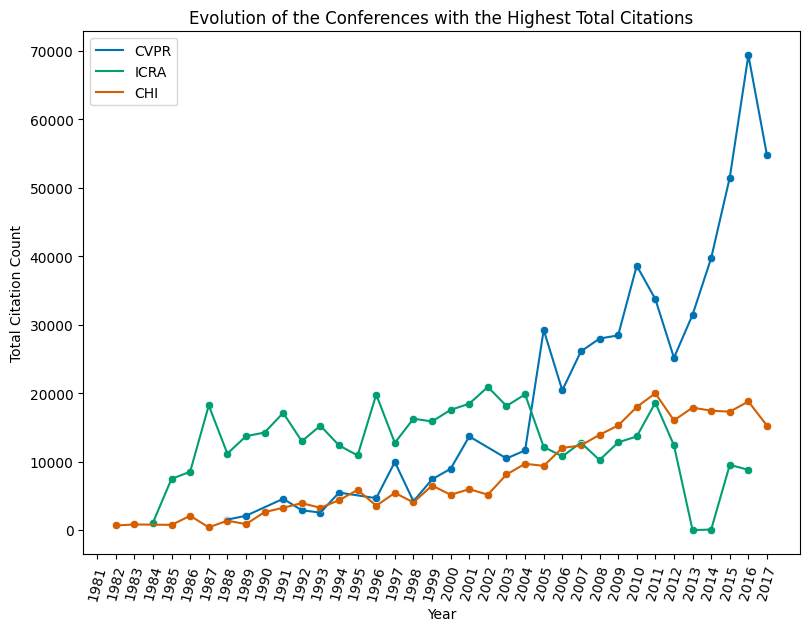

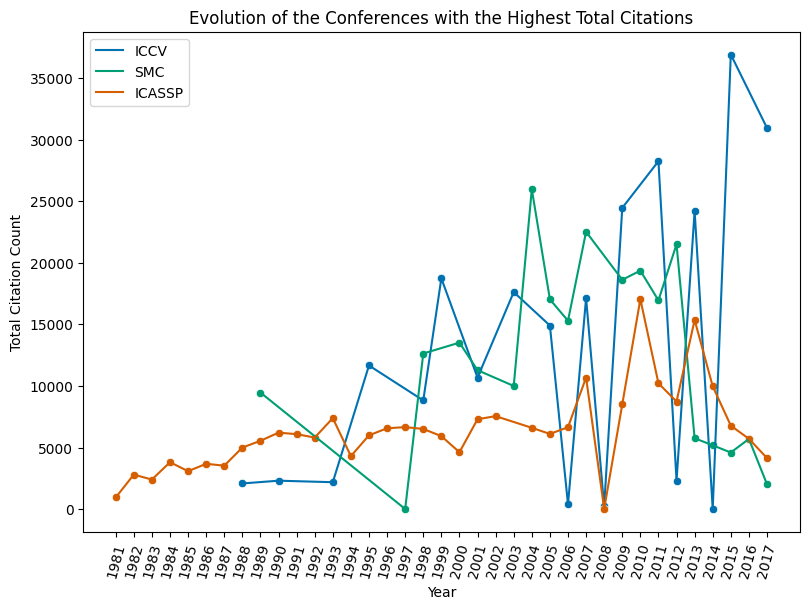

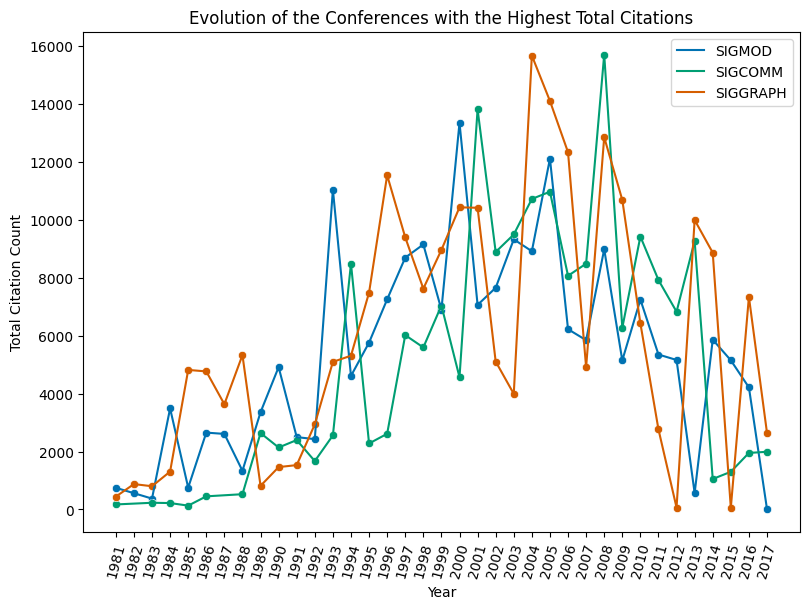

In [39]:
fig,ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=list(dict_cit_conference['cvpr'].keys()), y=list(dict_cit_conference['cvpr'].values()), label='cvpr'.upper())
sns.lineplot(x=list(dict_cit_conference['icra'].keys()), y=list(dict_cit_conference['icra'].values()), label='icra'.upper())
sns.lineplot(x=list(dict_cit_conference['chi'].keys()), y=list(dict_cit_conference['chi'].values()), label='chi'.upper())
sns.scatterplot(x=list(dict_cit_conference['cvpr'].keys()), y=list(dict_cit_conference['cvpr'].values()))
sns.scatterplot(x=list(dict_cit_conference['icra'].keys()), y=list(dict_cit_conference['icra'].values()))
sns.scatterplot(x=list(dict_cit_conference['chi'].keys()), y=list(dict_cit_conference['chi'].values()))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.xticks(rotation=75)
plt.tight_layout()
plt.title("Evolution of the Conferences with the Highest Total Citations")
plt.xlabel("Year")
plt.ylabel("Total Citation Count")
plt.savefig(path_file_export + 'charts/conf_tot_c.png')

fig,ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=list(dict_cit_conference['iccv'].keys()), y=list(dict_cit_conference['iccv'].values()), label='iccv'.upper())
sns.lineplot(x=list(dict_cit_conference['smc'].keys()), y=list(dict_cit_conference['smc'].values()), label='smc'.upper())
sns.lineplot(x=list(dict_cit_conference['icassp'].keys()), y=list(dict_cit_conference['icassp'].values()), label='icassp'.upper())
sns.scatterplot(x=list(dict_cit_conference['iccv'].keys()), y=list(dict_cit_conference['iccv'].values()))
sns.scatterplot(x=list(dict_cit_conference['smc'].keys()), y=list(dict_cit_conference['smc'].values()))
sns.scatterplot(x=list(dict_cit_conference['icassp'].keys()), y=list(dict_cit_conference['icassp'].values()))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.xticks(rotation=75)
plt.title("Evolution of the Conferences with the Highest Total Citations")
plt.tight_layout()
plt.xlabel("Year")
plt.ylabel("Total Citation Count")
plt.savefig(path_file_export + 'charts/conf_tot_b.png')

fig,ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=list(dict_cit_conference['sigmod'].keys()), y=list(dict_cit_conference['sigmod'].values()), label='sigmod'.upper())
sns.lineplot(x=list(dict_cit_conference['sigcomm'].keys()), y=list(dict_cit_conference['sigcomm'].values()), label='sigcomm'.upper())
sns.lineplot(x=list(dict_cit_conference['siggraph'].keys()), y=list(dict_cit_conference['siggraph'].values()), label='siggraph'.upper())
sns.scatterplot(x=list(dict_cit_conference['sigmod'].keys()), y=list(dict_cit_conference['sigmod'].values()))
sns.scatterplot(x=list(dict_cit_conference['sigcomm'].keys()), y=list(dict_cit_conference['sigcomm'].values()))
sns.scatterplot(x=list(dict_cit_conference['siggraph'].keys()), y=list(dict_cit_conference['siggraph'].values()))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.xticks(rotation=75)
plt.title("Evolution of the Conferences with the Highest Total Citations")
plt.tight_layout()
plt.xlabel("Year")
plt.ylabel("Total Citation Count")
plt.savefig(path_file_export + 'charts/conf_tot_a.png')

**Plot of the AVG Citations with the Conferences with the highest Citations**

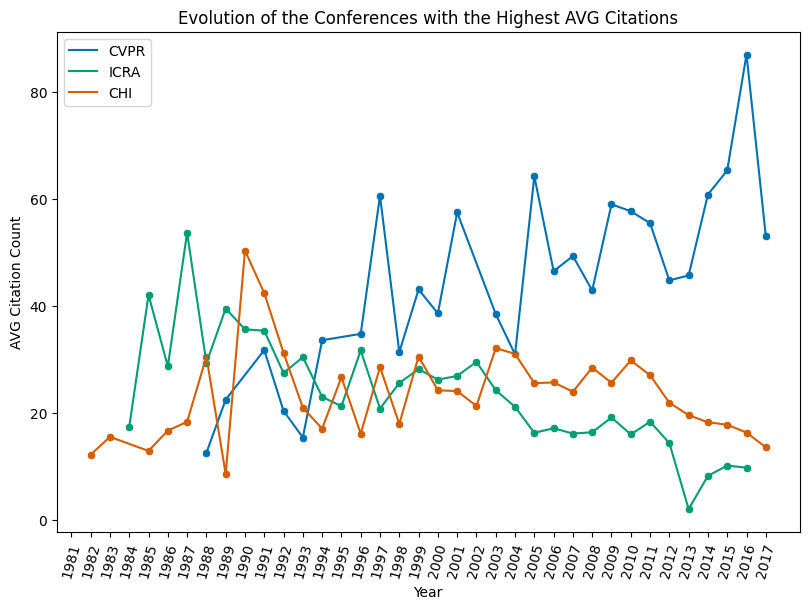

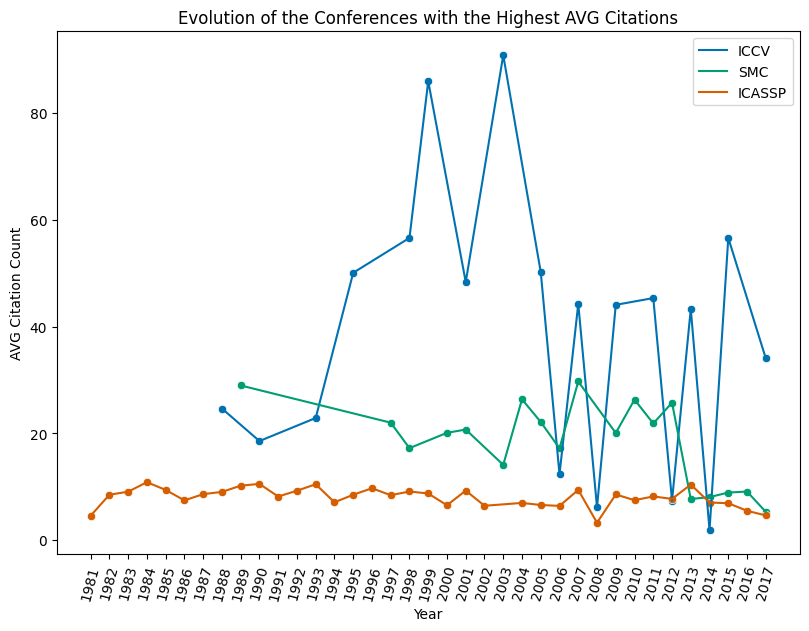

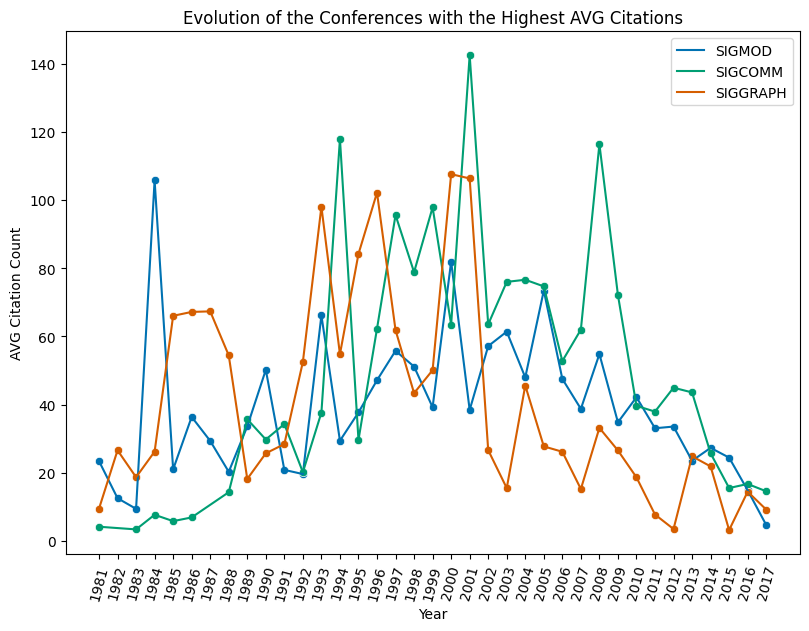

In [40]:
fig,ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=list(dict_avg_cit_conference['cvpr'].keys()), y=list(dict_avg_cit_conference['cvpr'].values()), label='cvpr'.upper())
sns.lineplot(x=list(dict_avg_cit_conference['icra'].keys()), y=list(dict_avg_cit_conference['icra'].values()), label='icra'.upper())
sns.lineplot(x=list(dict_avg_cit_conference['chi'].keys()), y=list(dict_avg_cit_conference['chi'].values()), label='chi'.upper())
sns.scatterplot(x=list(dict_avg_cit_conference['cvpr'].keys()), y=list(dict_avg_cit_conference['cvpr'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['icra'].keys()), y=list(dict_avg_cit_conference['icra'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['chi'].keys()), y=list(dict_avg_cit_conference['chi'].values()))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.xticks(rotation=75)
plt.title("Evolution of the Conferences with the Highest AVG Citations")
plt.tight_layout()
plt.xlabel("Year")
plt.ylabel("AVG Citation Count")
plt.savefig(path_file_export + 'charts/conf_tot_avg_c.png')

fig,ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=list(dict_avg_cit_conference['iccv'].keys()), y=list(dict_avg_cit_conference['iccv'].values()), label='iccv'.upper())
sns.lineplot(x=list(dict_avg_cit_conference['smc'].keys()), y=list(dict_avg_cit_conference['smc'].values()), label='smc'.upper())
sns.lineplot(x=list(dict_avg_cit_conference['icassp'].keys()), y=list(dict_avg_cit_conference['icassp'].values()), label='icassp'.upper())
sns.scatterplot(x=list(dict_avg_cit_conference['iccv'].keys()), y=list(dict_avg_cit_conference['iccv'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['smc'].keys()), y=list(dict_avg_cit_conference['smc'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['icassp'].keys()), y=list(dict_avg_cit_conference['icassp'].values()))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.xticks(rotation=75)
plt.tight_layout()
plt.title("Evolution of the Conferences with the Highest AVG Citations")
plt.xlabel("Year")
plt.ylabel("AVG Citation Count")
plt.savefig(path_file_export + 'charts/conf_tot_avg_b.png')

fig,ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=list(dict_avg_cit_conference['sigmod'].keys()), y=list(dict_avg_cit_conference['sigmod'].values()), label='sigmod'.upper())
sns.lineplot(x=list(dict_avg_cit_conference['sigcomm'].keys()), y=list(dict_avg_cit_conference['sigcomm'].values()), label='sigcomm'.upper())
sns.lineplot(x=list(dict_avg_cit_conference['siggraph'].keys()), y=list(dict_avg_cit_conference['siggraph'].values()), label='siggraph'.upper())
sns.scatterplot(x=list(dict_avg_cit_conference['sigmod'].keys()), y=list(dict_avg_cit_conference['sigmod'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['sigcomm'].keys()), y=list(dict_avg_cit_conference['sigcomm'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['siggraph'].keys()), y=list(dict_avg_cit_conference['siggraph'].values()))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.xticks(rotation=75)
plt.tight_layout()
plt.title("Evolution of the Conferences with the Highest AVG Citations")
plt.xlabel("Year")
plt.ylabel("AVG Citation Count")
plt.savefig(path_file_export + 'charts/conf_tot_avg_a.png')

**Plot of some of the conferences with the highest AVG Citations**

**Note**: since some of the conferences in our top 10 only have one edition, we're going to compute a new top 10 for only the conferences that have at least a specified number of editions.

In [41]:
minimum_number_of_editions = 5

TOP 10 Average Citation: ['amia', 'security', 'mobicom', 'sosp', 'gcb', 'ismb', 'eurocrypt', 'crypto', 'sp', 'sigcomm']



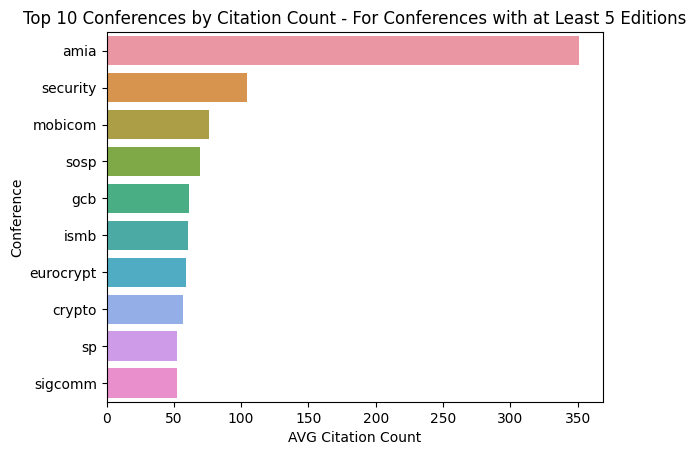

In [42]:
# df with the conferences that have at least n editions
conf_with_at_least_n_editions = list()

for index, row in df_conf_evolution.iterrows():
    if(row['N. of Editions'] >= minimum_number_of_editions):
        conf_with_at_least_n_editions.append(index)

df_conference_with_more_editions = df_conference.loc[conf_with_at_least_n_editions]

citations_top10_conference_with_more_editions_by_avg_cit = {k:v for k,v in df_conference_with_more_editions['AVG Citations'].sort_values(ascending=False).head(10).items()}
citations_top10_conference_with_more_editions_by_tot_cit = {k:v for k,v in df_conference_with_more_editions['Total Citations'].sort_values(ascending=False).head(10).items()}

sns.barplot(x = list(citations_top10_conference_with_more_editions_by_avg_cit.values()), y = list(citations_top10_conference_with_more_editions_by_avg_cit.keys()))
plt.title(f"Top 10 Conferences by Citation Count - For Conferences with at Least {minimum_number_of_editions} Editions")
plt.ylabel("Conference")
plt.xlabel("AVG Citation Count")
plt.savefig(path_file_export + 'charts/conf_cit_avg_top_10_with_at_least_n_editions.png')

print('TOP 10 Average Citation: ' + str(list(citations_top10_conference_with_more_editions_by_avg_cit.keys())) + "\n")

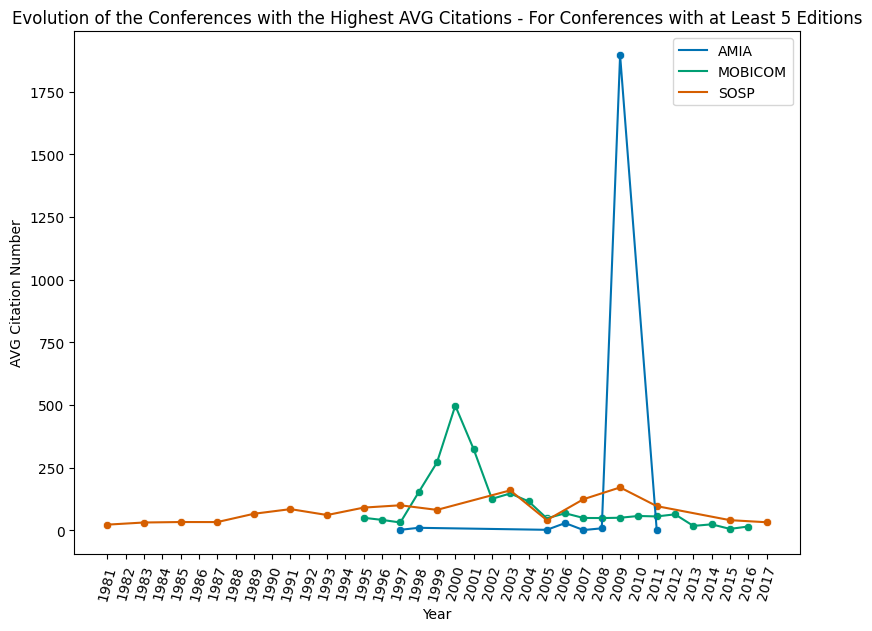

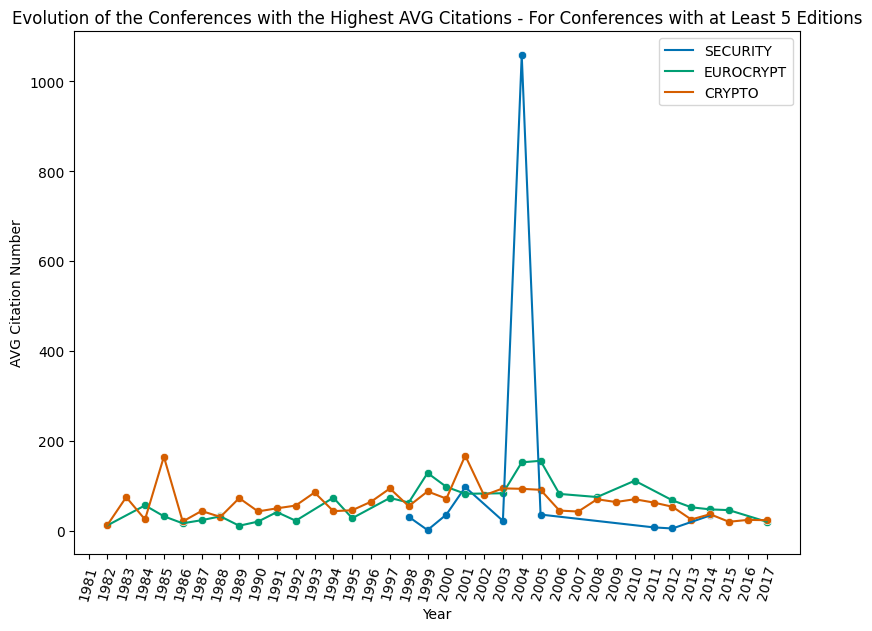

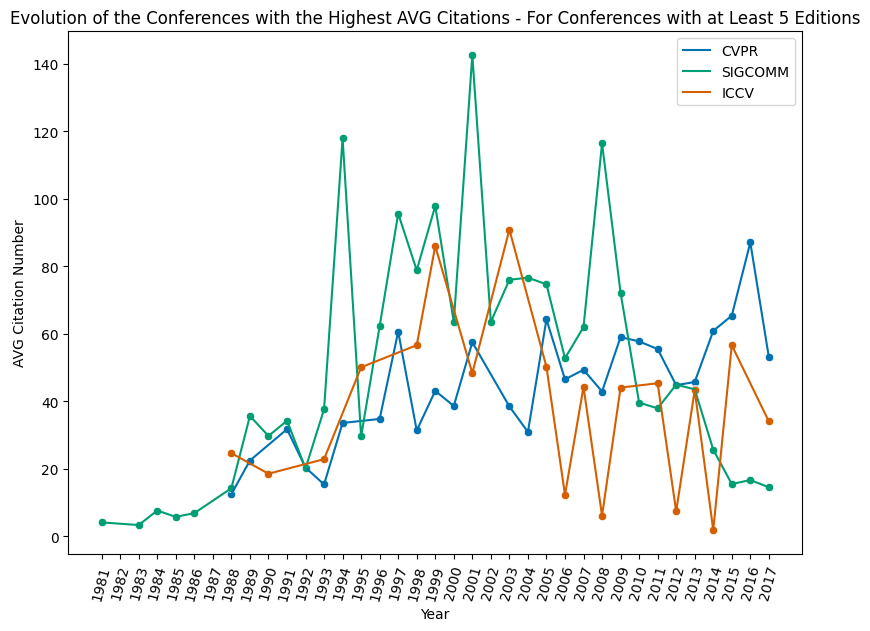

In [44]:
fig,ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=list(dict_avg_cit_conference['amia'].keys()), y=list(dict_avg_cit_conference['amia'].values()), label='amia'.upper())
sns.lineplot(x=list(dict_avg_cit_conference['mobicom'].keys()), y=list(dict_avg_cit_conference['mobicom'].values()), label='mobicom'.upper())
sns.lineplot(x=list(dict_avg_cit_conference['sosp'].keys()), y=list(dict_avg_cit_conference['sosp'].values()), label='sosp'.upper())
sns.scatterplot(x=list(dict_avg_cit_conference['amia'].keys()), y=list(dict_avg_cit_conference['amia'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['mobicom'].keys()), y=list(dict_avg_cit_conference['mobicom'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['sosp'].keys()), y=list(dict_avg_cit_conference['sosp'].values()))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.xticks(rotation=75)
plt.tight_layout()
plt.title(f"Evolution of the Conferences with the Highest AVG Citations - For Conferences with at Least {minimum_number_of_editions} Editions")
plt.xlabel("Year")
plt.ylabel("AVG Citation Number")
plt.savefig(path_file_export + 'charts/conf_avg_c.png')

fig,ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=list(dict_avg_cit_conference['security'].keys()), y=list(dict_avg_cit_conference['security'].values()), label='security'.upper())
sns.lineplot(x=list(dict_avg_cit_conference['eurocrypt'].keys()), y=list(dict_avg_cit_conference['eurocrypt'].values()), label='eurocrypt'.upper())
sns.lineplot(x=list(dict_avg_cit_conference['crypto'].keys()), y=list(dict_avg_cit_conference['crypto'].values()), label='crypto'.upper())
sns.scatterplot(x=list(dict_avg_cit_conference['security'].keys()), y=list(dict_avg_cit_conference['security'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['eurocrypt'].keys()), y=list(dict_avg_cit_conference['eurocrypt'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['crypto'].keys()), y=list(dict_avg_cit_conference['crypto'].values()))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.xticks(rotation=75)
plt.tight_layout()
plt.title(f"Evolution of the Conferences with the Highest AVG Citations - For Conferences with at Least {minimum_number_of_editions} Editions")
plt.xlabel("Year")
plt.ylabel("AVG Citation Number")
plt.savefig(path_file_export + 'charts/conf_avg_b.png')

fig,ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=list(dict_avg_cit_conference['cvpr'].keys()), y=list(dict_avg_cit_conference['cvpr'].values()), label='cvpr'.upper())
sns.lineplot(x=list(dict_avg_cit_conference['sigcomm'].keys()), y=list(dict_avg_cit_conference['sigcomm'].values()), label='sigcomm'.upper())
sns.lineplot(x=list(dict_avg_cit_conference['iccv'].keys()), y=list(dict_avg_cit_conference['iccv'].values()), label='iccv'.upper())
sns.scatterplot(x=list(dict_avg_cit_conference['cvpr'].keys()), y=list(dict_avg_cit_conference['cvpr'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['sigcomm'].keys()), y=list(dict_avg_cit_conference['sigcomm'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['iccv'].keys()), y=list(dict_avg_cit_conference['iccv'].values()))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.xticks(rotation=75)
plt.tight_layout()
plt.title(f"Evolution of the Conferences with the Highest AVG Citations - For Conferences with at Least {minimum_number_of_editions} Editions")
plt.xlabel("Year")
plt.ylabel("AVG Citation Number")
plt.savefig(path_file_export + 'charts/conf_avg_a.png')

**Single Plots for Total Citation Number**

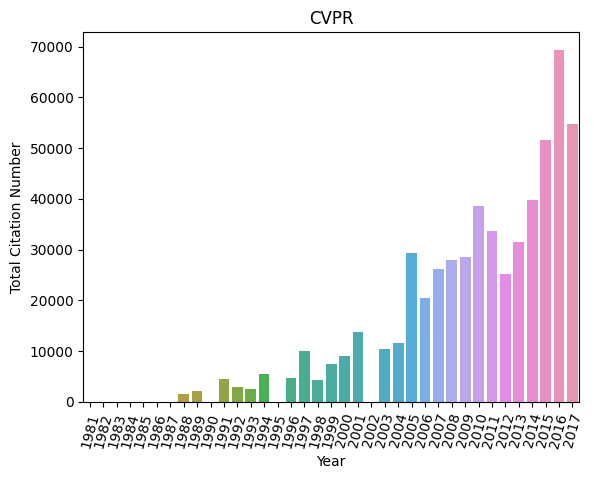

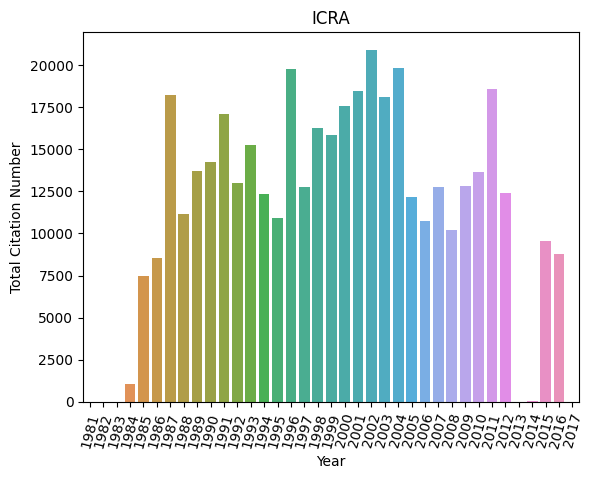

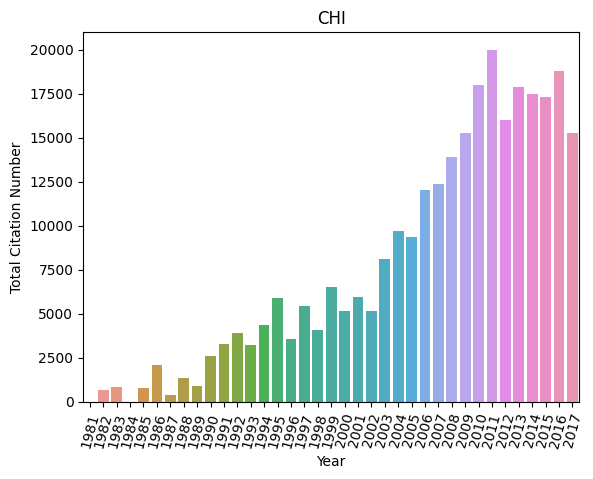

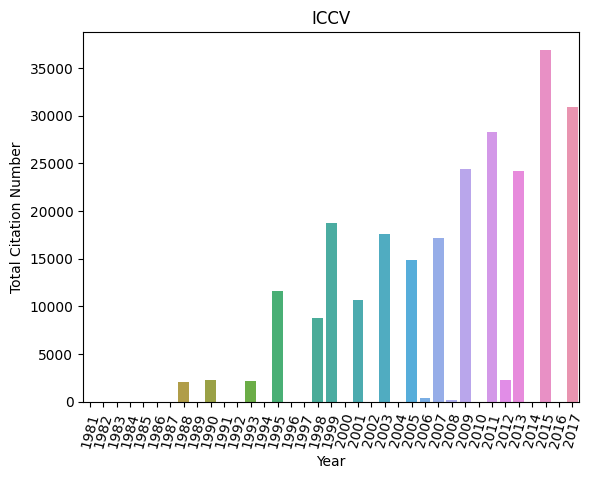

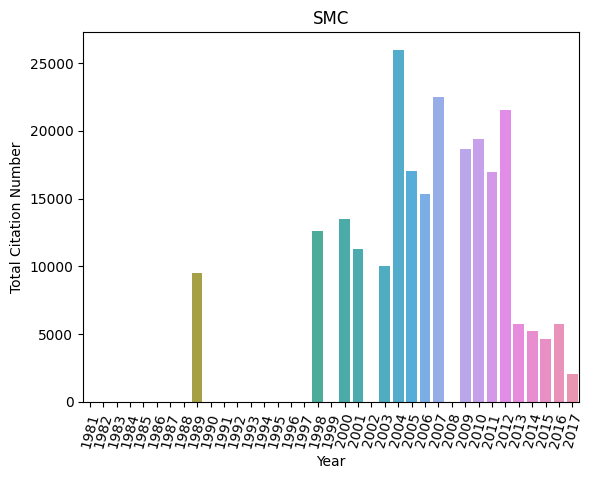

In [45]:
for key in list(citations_top10_conference_by_cit.keys())[0:5]:
    plt.figure(key)
    draw_tot_cit_graph(key)

**Single Plots for AVG Citation Number**

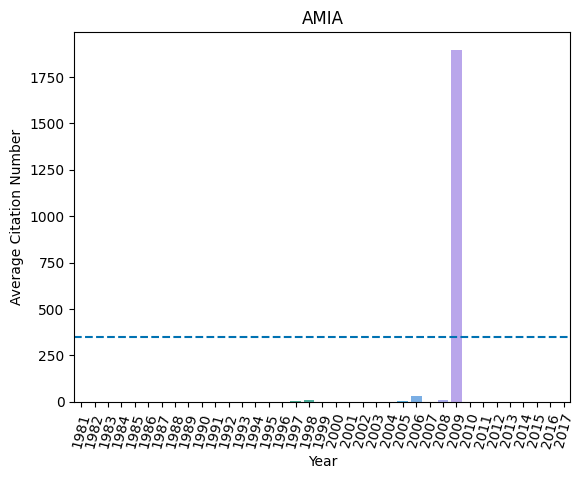

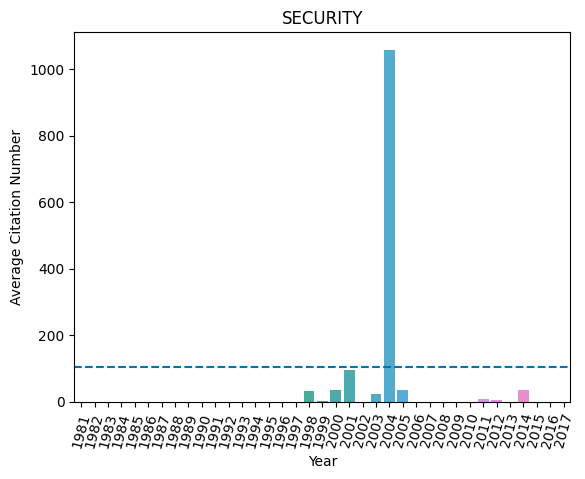

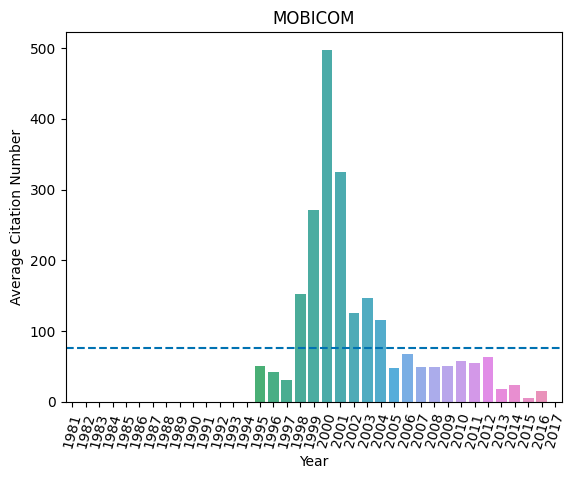

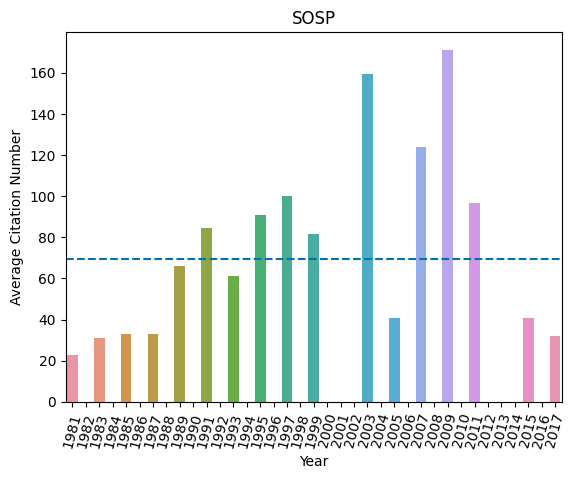

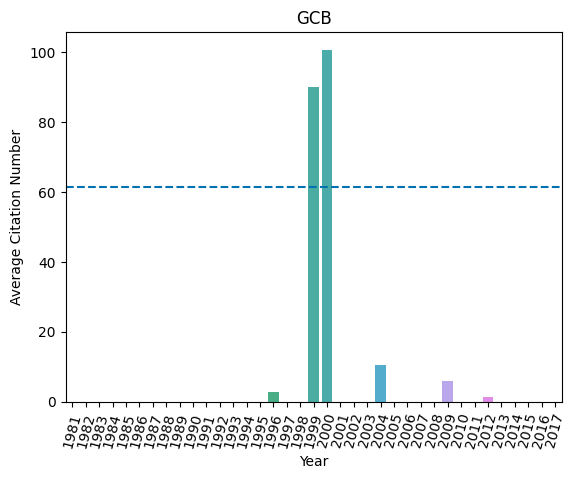

In [46]:
for key in list(citations_top10_conference_with_more_editions_by_avg_cit.keys())[0:5]:
    plt.figure(key)
    draw_avg_cit_graph(key)

**Single Plots for Conferences with a High Percentage of Editions Under the AVG**

The following flag is useful to prevent the print of conferences with AVG citations equal to 1 for every year.

In [47]:
print_only_conf_with_avg_not_equal_to_one = True

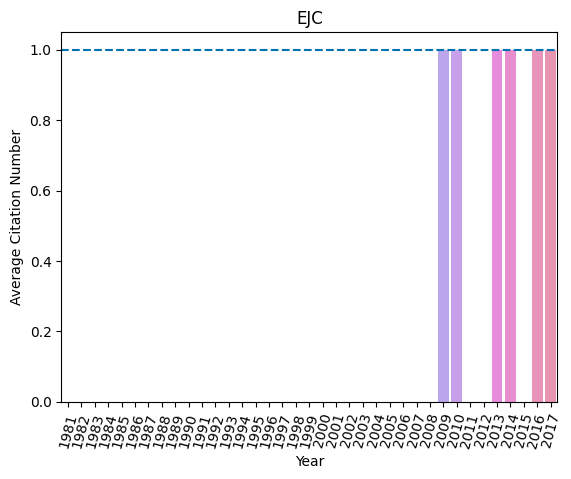

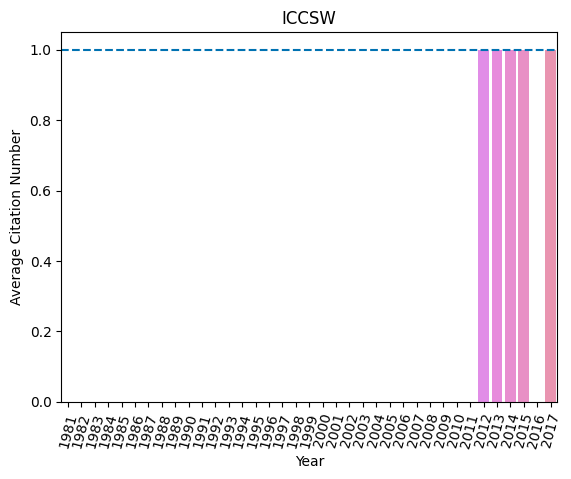

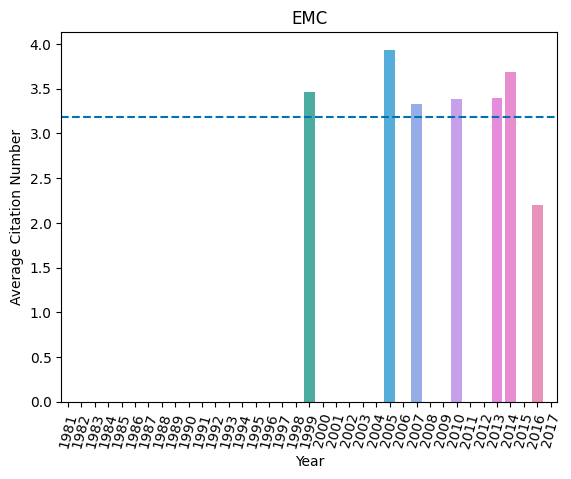

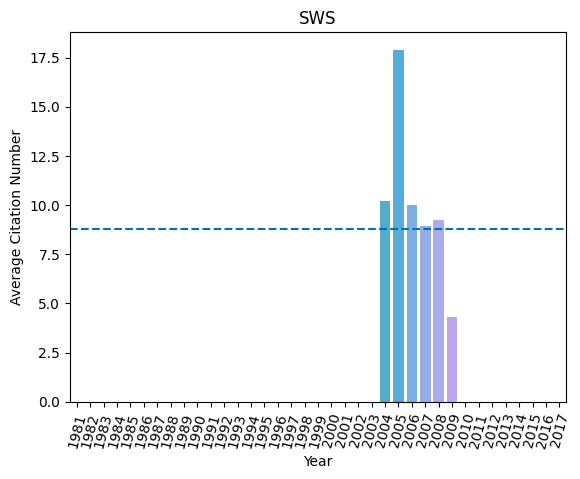

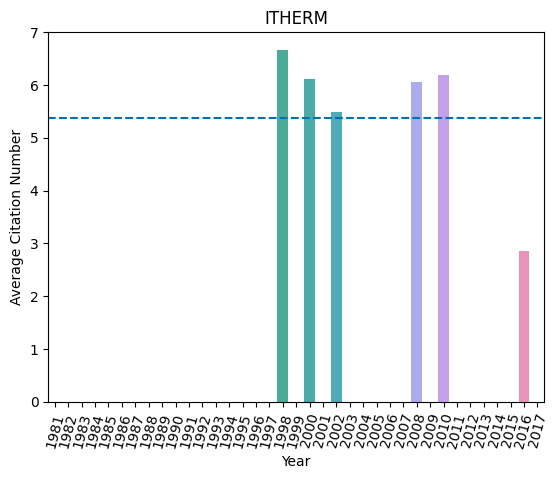

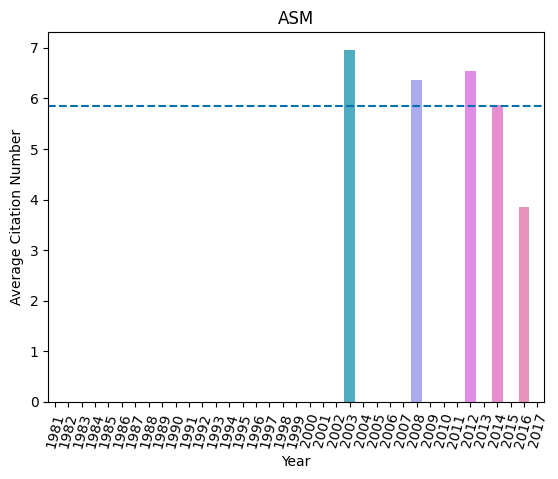

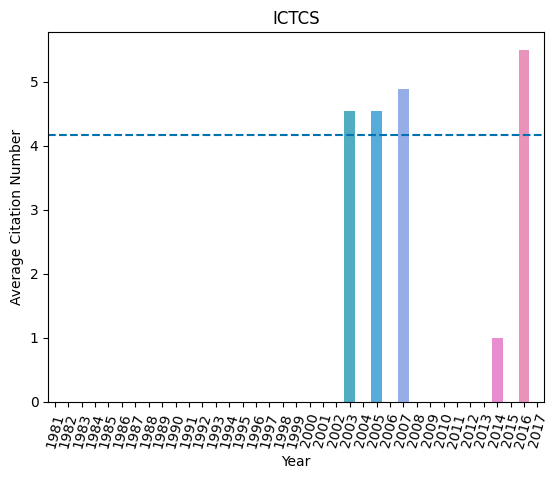

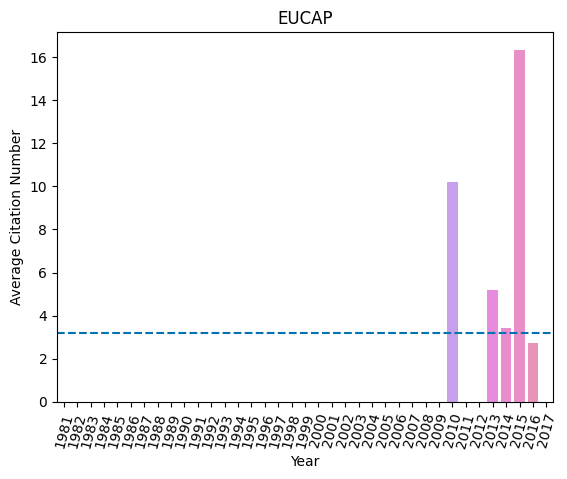

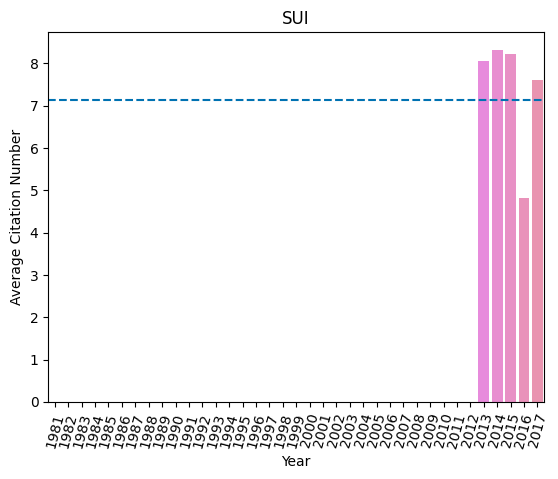

In [48]:
max_plots = 10
plot_count = 0

for row, col in list(df_over_and_under_avg_cit.iterrows())[0:30]:
    if(df_conf_evolution.at[row, 'N. of Editions'] >= minimum_number_of_editions):
        
        if print_only_conf_with_avg_not_equal_to_one and plot_count < max_plots:
            for avg_year_citations in list(dict_avg_cit_conference[row].values()):
                if avg_year_citations != 1.0:
                    plt.figure(row)
                    draw_avg_cit_graph(row)
                    plot_count += 1
                    break

        else:
            plt.figure(row)
            draw_avg_cit_graph(row)

#### Some Interesting Observations
We can already make some observations looking at these graphs.

We can easily notice that usually there are **huge differences between the different editions of a conferences**. This datum is really interesting since it will help us choice which year and conferences to consider for our analysis.

Another interesting datum is that some conferences have a really huge Total AVG Citation number, but **the AVG Citation is high only for a single year**. Maybe that was a pretty profitable year, or maybe it's simply an abnormal year for which we haven't enough data (example: a single article with a lot of citations could cause the AVG value to reach that level).
**These conferences could be a problem for our analysis**. We have to keep an eye on them.

#### Study of the Conferences with the Biggest Difference Between the Best and the Worst Year
This could be helpful to obtain other interesting cases for the next analysis.

**Creation of the support dataframe**

In [49]:
# creation of a dataframe that contains for each conference the year with the most and the least total and avg citations


# year with the most total citations
year_with_max_cit = {k:v for k,v in df_cit_evolution.idxmax(axis=1).items()}
df_year_with_max_cit = pd.DataFrame(data=year_with_max_cit.values(), index=year_with_max_cit.keys(), columns=['Year with MAX Total Citations'])

# year with the most total citations
max_cit = {k:v for k,v in df_cit_evolution.max(axis=1).items()}
df_max_cit = pd.DataFrame(data=max_cit.values(), index=max_cit.keys(), columns=['MAX Total Citations'])

# year with the least total citations
year_with_min_cit = {k:v for k,v in df_cit_evolution.idxmin(axis=1).items()}
df_year_with_min_cit = pd.DataFrame(data=year_with_min_cit.values(), index=year_with_min_cit.keys(), columns=['Year with MIN Total Citations'])

# value of the year with the least total citations
min_cit = {k:v for k,v in df_cit_evolution.min(axis=1).items()}
df_min_cit = pd.DataFrame(data=min_cit.values(), index=min_cit.keys(), columns=['MIN Total Citations'])


# year with the most avg citations
year_with_max_avg_cit = {k:v for k,v in df_avg_cit_evolution.idxmax(axis=1).items()}
df_year_with_max_avg_cit = pd.DataFrame(data=year_with_max_avg_cit.values(), index=year_with_max_avg_cit.keys(), columns=['Year with MAX AVG Citations'])

# year with the most avg citations
max_avg_cit = {k:v for k,v in df_avg_cit_evolution.max(axis=1).items()}
df_max_avg_cit = pd.DataFrame(data=max_avg_cit.values(), index=max_avg_cit.keys(), columns=['MIN AVG Citations'])

# year with the least avg citations
year_with_min_avg_cit = {k:v for k,v in df_avg_cit_evolution.idxmin(axis=1).items()}
df_year_with_min_avg_cit = pd.DataFrame(data=year_with_min_avg_cit.values(), index=year_with_min_avg_cit.keys(), columns=['Year with MIN AVG Citations'])

# value of the year with the least avg citations
min_avg_cit = {k:v for k,v in df_avg_cit_evolution.min(axis=1).items()}
df_min_avg_cit = pd.DataFrame(data=min_avg_cit.values(), index=min_avg_cit.keys(), columns=['MIN AVG Citations'])


# difference between min and max values
dif_cit = {k: (max_cit[k] - v)  for k,v in min_cit.items()}
df_dif_cit = pd.DataFrame(data=dif_cit.values(), index=dif_cit.keys(), columns=['MAX-MIN Total Citations Difference'])
dif_avg_cit = {k: (max_avg_cit[k] - v)  for k, v in min_avg_cit.items()}
df_dif_avg_cit = pd.DataFrame(data=dif_avg_cit.values(), index=dif_avg_cit.keys(), columns=['MAX-MIN AVG Citations Difference'])

# creation of the final dataframe
df_min_max = pd.concat([df_year_with_min_avg_cit, df_min_avg_cit, df_year_with_max_avg_cit, df_max_avg_cit, 
                       df_year_with_min_cit, df_min_cit, df_year_with_max_cit, df_max_cit, df_dif_avg_cit, df_dif_cit],axis=1)
df_min_max = df_min_max.sort_values(['MAX-MIN AVG Citations Difference'], ascending=False)

df_min_max.head(10)

Year with MIN AVG Citations  MIN AVG Citations  \
amia                            2007           1.000000   
security                        1999           1.500000   
icis                            1999           1.000000   
mobicom                         2015           5.619048   
wmcsa                           2003           6.677419   
aipr                            2014           2.760000   
iwssd                           1989           7.722222   
fast                            2017           1.000000   
icml                            1998           2.000000   
ecis                            1996           1.000000   

         Year with MAX AVG Citations  MIN AVG Citations  \
amia                            2009        1896.000000   
security                        2004        1058.000000   
icis                            2000         909.000000   
mobicom                         2000         497.464286   
wmcsa                           1999         481.000000   
aipr                            1994         452.000000   
iwssd                           1993         364.000000   
fast                            2008         321.000000   
icml                            1997         249.500000   
ecis                            2012         237.500000   

         Year with MIN Total Citations  MIN Total Citations  \
amia                              2007                  1.0   
security                          1999                  3.0   
icis                              1999                  1.0   
mobicom                           2015                236.0   
wmcsa                             2006                145.0   
aipr                              2007                 49.0   
iwssd                             1989                556.0   
fast                              2017                  1.0   
icml                              1998                  2.0   
ecis                              1996                  1.0   

         Year with MAX Total Citations  MAX Total Citations  \
amia                              2009               3792.0   
security                          2004               1058.0   
icis                              2007               1821.0   
mobicom                           2000              13929.0   
wmcsa                             1999               5772.0   
aipr                              1994                452.0   
iwssd                             1993               1092.0   
fast                              2009                396.0   
icml                              2006              10544.0   
ecis                              2012                475.0   

          MAX-MIN AVG Citations Difference  MAX-MIN Total Citations Difference  
amia                           1895.000000                              3791.0  
security                       1056.500000                              1055.0  
icis                            908.000000                              1820.0  
mobicom                         491.845238                             13693.0  
wmcsa                           474.322581                              5627.0  
aipr                            449.240000                               403.0  
iwssd                           356.277778                               536.0  
fast                            320.000000                               395.0  
icml                            247.500000                             10542.0  
ecis                            236.500000                               474.0

**Plots of the Total Citations of the Conferences with the Most Difference Between the Best and Worst Years**

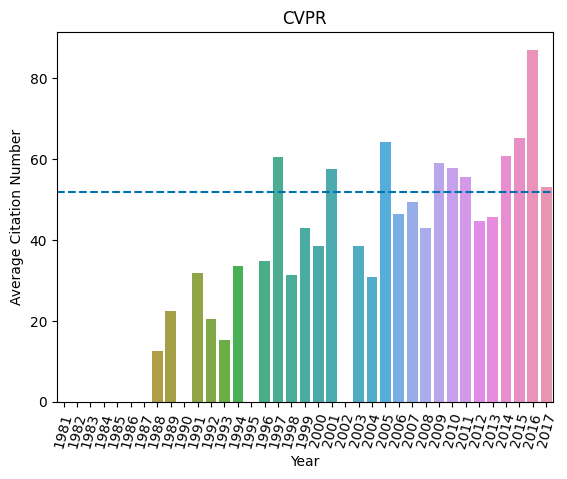

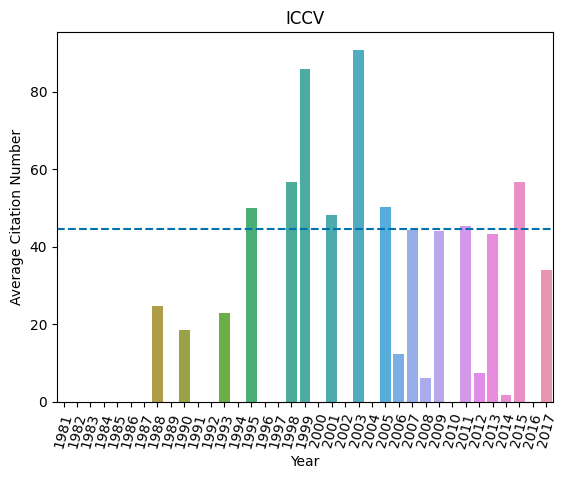

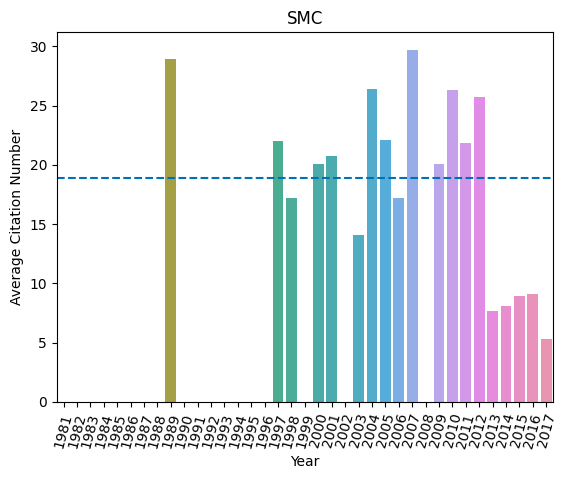

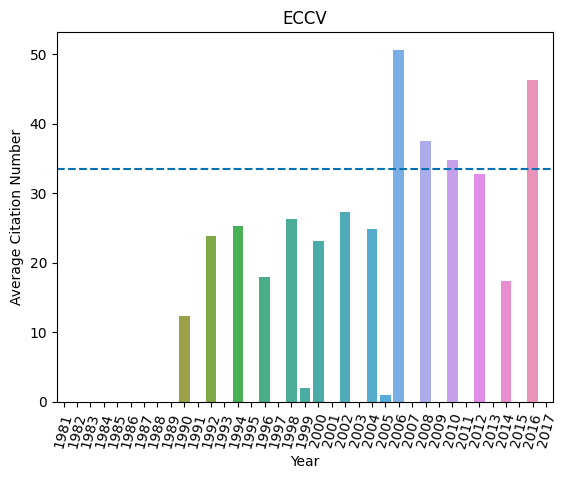

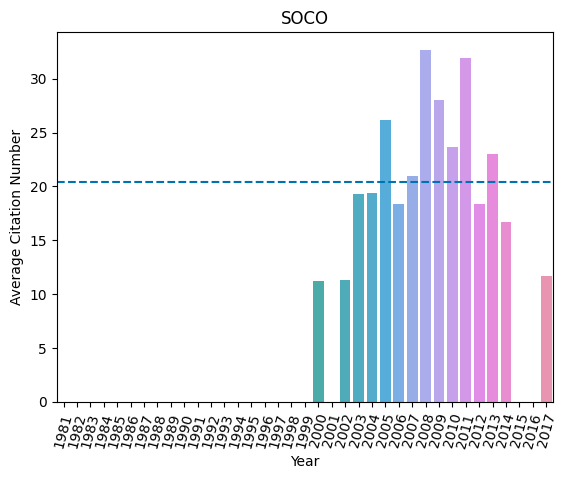

In [50]:
df_min_max_by_total_cit = df_min_max.sort_values(['MAX-MIN Total Citations Difference'], ascending=False)

for row,col in list(df_min_max_by_total_cit.iterrows())[0:5]:
    plt.figure(row)
    draw_avg_cit_graph(row)

**Plots of the AVG Citations of the Conferences with the Most Difference Between the Best and Worst Years**

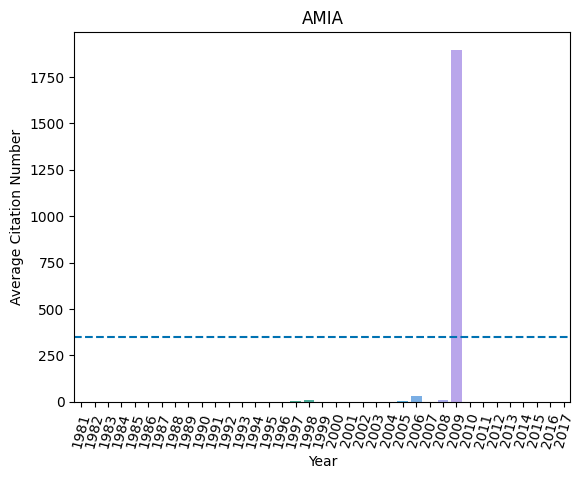

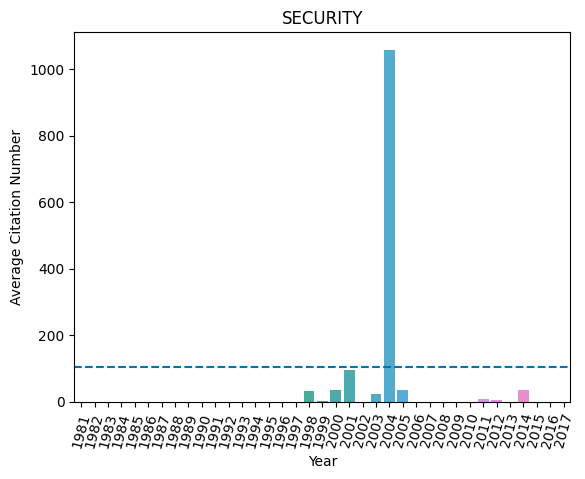

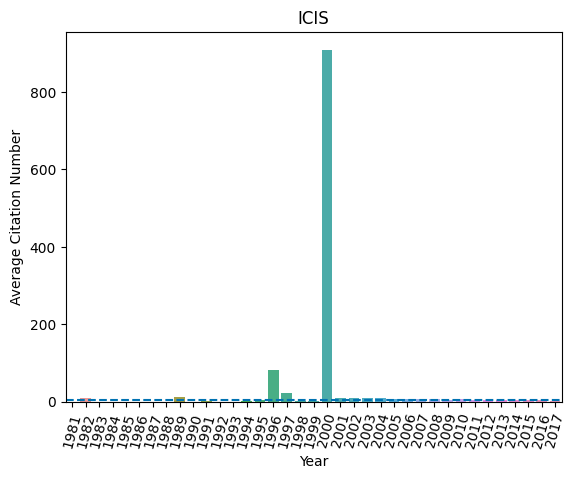

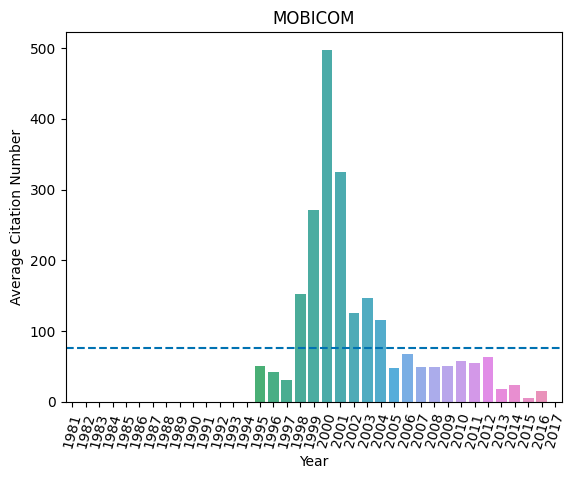

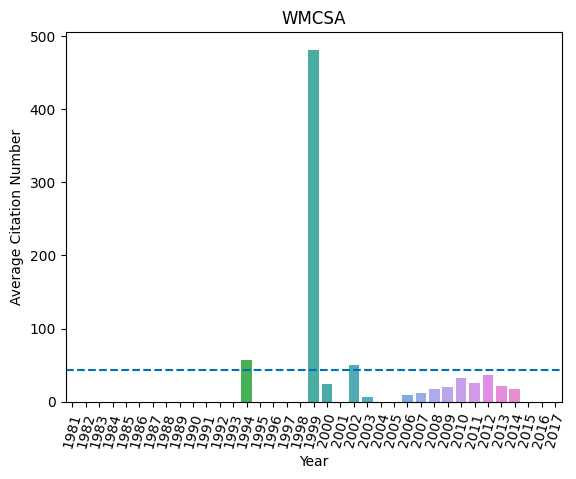

In [51]:
for row,col in list(df_min_max.iterrows())[0:5]:
    plt.figure(row)
    draw_avg_cit_graph(row)

#### Creation of a Dataframe with the Ratio Between the Yearly AVG Citations and the Total AVG Citations of a Conference

In [52]:
lst_dataframes = []
for conference in keys:
    single_conference = {}
    n_editions = 0
    for k, v in conference_tot_cit[conference].items():
        avg_cit = v / conference_tot_article[conference][k]
        if(df_conf_evolution.at[conference, 'AVG Citations'] != 0):
            single_conference[str(k)] = avg_cit / df_conf_evolution.at[conference, 'AVG Citations']
        else:
            single_conference[str(k)] = 0
        n_editions +=1
    single_conference['Total AVG Citations'] = df_conf_evolution.at[conference, 'AVG Citations']
    
    # creation of a list of dataframes containing each different conference
    # filter of the conferences with only one edition since they're not useful 
    if n_editions > 1:
        lst_dataframes.append(pd.DataFrame(data=[single_conference.values()], index = [conference], columns=single_conference.keys()))

# creation of the final dataframe
df_ratio = pd.concat(lst_dataframes)
df_ratio = df_ratio.reindex(sorted(df_ratio.columns), axis=1)

# sort by total avg
df_ratio = df_ratio.sort_values(['Total AVG Citations'], ascending=False)

df_ratio.head(10)

1981  1982      1983  1984     1985  1986      1987     1988  \
amia           NaN   NaN       NaN   NaN      NaN   NaN       NaN      NaN   
security       NaN   NaN       NaN   NaN      NaN   NaN       NaN      NaN   
avc            NaN   NaN       NaN   NaN      NaN   NaN  0.102964  2.75957   
mobicom        NaN   NaN       NaN   NaN      NaN   NaN       NaN      NaN   
osdi           NaN   NaN       NaN   NaN      NaN   NaN       NaN      NaN   
wosn           NaN   NaN       NaN   NaN      NaN   NaN       NaN      NaN   
sosp      0.326926   NaN  0.449695   NaN  0.47679   NaN  0.474317      NaN   
icls           NaN   NaN       NaN   NaN      NaN   NaN       NaN      NaN   
iptps          NaN   NaN       NaN   NaN      NaN   NaN       NaN      NaN   
gcb            NaN   NaN       NaN   NaN      NaN   NaN       NaN      NaN   

              1989  1990      1991  1992      1993  1994      1995      1996  \
amia           NaN   NaN       NaN   NaN       NaN   NaN       NaN       NaN   
security       NaN   NaN       NaN   NaN       NaN   NaN       NaN       NaN   
avc            NaN   NaN       NaN   NaN       NaN   NaN       NaN       NaN   
mobicom        NaN   NaN       NaN   NaN       NaN   NaN  0.656286  0.545446   
osdi           NaN   NaN       NaN   NaN       NaN   NaN       NaN  0.829755   
wosn           NaN   NaN       NaN   NaN       NaN   NaN       NaN       NaN   
sosp      0.951932   NaN  1.219562   NaN  0.879816   NaN  1.307361       NaN   
icls           NaN   NaN       NaN   NaN       NaN   NaN       NaN       NaN   
iptps          NaN   NaN       NaN   NaN       NaN   NaN       NaN       NaN   
gcb            NaN   NaN       NaN   NaN       NaN   NaN       NaN  0.045658   

              1997      1998      1999      2000      2001      2002  \
amia      0.005698  0.028490       NaN       NaN       NaN       NaN   
security       NaN  0.296542  0.014349  0.344371  0.927888       NaN   
avc            NaN       NaN       NaN       NaN       NaN       NaN   
mobicom   0.409926  1.994059  3.553787  6.529575  4.255357  1.647782   
osdi           NaN       NaN       NaN       NaN       NaN  1.219637   
wosn           NaN       NaN       NaN       NaN       NaN       NaN   
sosp      1.441119       NaN  1.175871       NaN       NaN       NaN   
icls           NaN       NaN       NaN       NaN       NaN       NaN   
iptps          NaN       NaN       NaN       NaN       NaN  1.998885   
gcb            NaN       NaN  1.466322  1.641124       NaN       NaN   

              2003       2004      2005      2006      2007      2008  \
amia           NaN        NaN  0.005698  0.082621  0.002849  0.022792   
security  0.210449  10.120677  0.344371       NaN       NaN       NaN   
avc            NaN        NaN       NaN       NaN       NaN       NaN   
mobicom   1.928994   1.518908  0.626669  0.893053  0.646441  0.642441   
osdi           NaN   0.379090       NaN       NaN       NaN       NaN   
wosn           NaN        NaN       NaN       NaN       NaN  1.129156   
sosp      2.298785        NaN  0.586544       NaN  1.790209       NaN   
icls           NaN   1.830065       NaN  0.030501       NaN  1.174292   
iptps          NaN   0.269116  0.562472       NaN       NaN       NaN   
gcb            NaN   0.171217       NaN       NaN       NaN       NaN   

              2009      2010      2011      2012      2013      2014  \
amia      5.401709       NaN  0.002849       NaN       NaN       NaN   
security       NaN       NaN  0.071744  0.047829       NaN  0.325239   
avc            NaN       NaN       NaN       NaN       NaN       NaN   
mobicom   0.658323  0.751053  0.727096  0.837269  0.230677  0.313648   
osdi           NaN       NaN       NaN       NaN       NaN       NaN   
wosn      1.660398       NaN       NaN  0.243953       NaN       NaN   
sosp      2.468877       NaN  1.392320       NaN       NaN       NaN   
icls           NaN  0.442266       NaN       NaN       NaN       NaN   
iptps          NaN       NaN 

<br/>

### Integration of Some Conference Ranking Metrics
The following part of this notebook contains the integration of some conference ranking metrics. These metrics could be another relevant way for finding interesting conferences or conferences editions that are going to be better analyzed later. 

#### GRIN Conference Rating Integration
The GRIN Rating is an initiative sponsored by GII (Group of Italian Professors of Computer Engineering), GRIN (Group of Italian Professors of Computer Science), and SCIE (Spanish Computer-Science Society).

**Creation of the Datasets Subsets with the GRIN Rating**

Unfortunately, at the time of the writing of this notebook, the GRIN Conference Rating is not available for every conference but only for the most famous and prestigious. For this reason, we need to filter all the conferences that doesn't have the rating.

In [53]:
df_conference_series_grin_rank.dropna(subset=["GrinClass", "GrinRating"], inplace=True)
df_conference_series_grin_rank

ConferenceSeriesNormalizedName  GrinClass GrinRating
0                              disc        3.0          B
1                               esa        2.0         A-
3                              dexa        3.0          B
5                          interact        3.0          B
6                               fct        3.0         B-
...                             ...        ...        ...
4593                          jelia        3.0         B-
4806                          dbsec        3.0         B-
4861                           lpar        3.0          B
5047                        sirocco        3.0         B-
5280                          hotos        3.0          B

[536 rows x 3 columns]

Inner join with the Total and AVG Citations dataframe

In [54]:
df_conference_with_grin_rank = pd.merge(left=df_conference, right=df_conference_series_grin_rank, left_on=df_conference.index, right_on="ConferenceSeriesNormalizedName", how="inner")
df_conference_with_grin_rank = df_conference_with_grin_rank.set_index(df_conference_with_grin_rank["ConferenceSeriesNormalizedName"].values).drop(columns=["ConferenceSeriesNormalizedName"])
df_conference_with_grin_rank

Total Citations  AVG Citations  N. of Articles  GrinClass GrinRating
neurips              1033     516.500000               2        1.0        A++
amia                 3861     351.000000              11        2.0         A-
security             1359     104.538462              13        1.0        A++
mobicom             76872      76.186323            1009        1.0        A++
osdi                 3759      75.180000              50        1.0         A+
...                   ...            ...             ...        ...        ...
fie                  5326       3.179701            1675        3.0         B-
ecai                 1097       2.812821             390        2.0         A-
ismir                  23       2.555556               9        2.0          A
edm                   698       2.258900             309        3.0          B
icwsm                   2       2.000000               1        2.0          A

[533 rows x 5 columns]

**Top 10 Conferences by Citation Count**

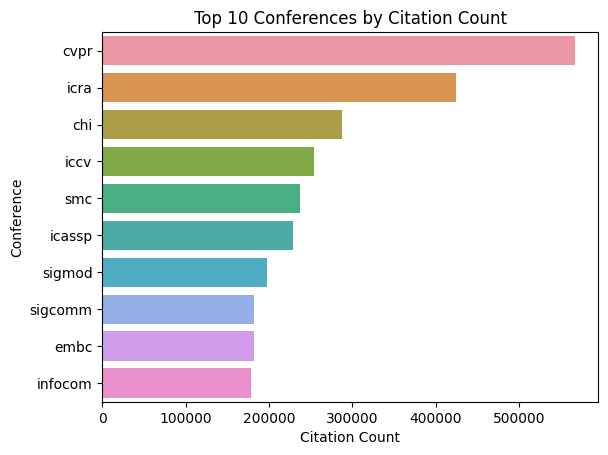

In [55]:
citations_top10_conference_with_grin_rank_by_cit = {k:v for k,v in df_conference_with_grin_rank['Total Citations'].sort_values(ascending=False).head(10).items()}
citations_top10_conference_with_grin_rank_by_cit_plot = sns.barplot(x = list(citations_top10_conference_with_grin_rank_by_cit.values()), y = list(citations_top10_conference_with_grin_rank_by_cit.keys()))

plt.title("Top 10 Conferences by Citation Count")
plt.ylabel("Conference")
plt.xlabel("Citation Count")
plt.savefig(path_file_export + 'charts/conf_cit_top_10.png')

In [56]:
df_conference_with_grin_rank.sort_values(by="Total Citations", ascending=False).head(10).drop(columns=["N. of Articles", "AVG Citations"])

Total Citations  GrinClass GrinRating
cvpr              566598        1.0        A++
icra              424429        2.0          A
chi               287549        1.0        A++
iccv              253928        1.0        A++
smc               237537        2.0         A-
icassp            228557        2.0          A
sigmod            197411        1.0        A++
sigcomm           181993        1.0        A++
embc              181957        2.0         A-
infocom           178972        1.0        A++

**Top 10 Conferences by AVG Citation Count**

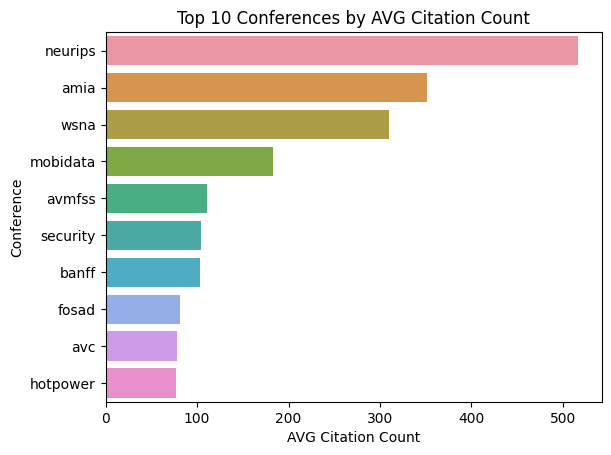

In [57]:
citations_top10_conference_with_grin_rank_by_avg_cit = {k:v for k,v in df_conference['AVG Citations'].sort_values(ascending=False).head(10).items()}
citations_top10_conference_with_grin_rank_by_avg_cit_plot = sns.barplot(x = list(citations_top10_conference_with_grin_rank_by_avg_cit.values()), y = list(citations_top10_conference_with_grin_rank_by_avg_cit.keys()))

plt.title("Top 10 Conferences by AVG Citation Count")
plt.ylabel("Conference")
plt.xlabel("AVG Citation Count")
plt.savefig(path_file_export + 'charts/conf_cit_avg_top_10.png')

In [58]:
df_conference_with_grin_rank.sort_values(by="AVG Citations", ascending=False).head(10).drop(columns=["Total Citations", "N. of Articles"])

AVG Citations  GrinClass GrinRating
neurips       516.500000        1.0        A++
amia          351.000000        2.0         A-
security      104.538462        1.0        A++
mobicom        76.186323        1.0        A++
osdi           75.180000        1.0         A+
iclr           73.000000        1.0        A++
sosp           69.332703        1.0        A++
iptps          62.373494        2.0         A-
eurocrypt      59.386385        1.0        A++
crypto         56.761163        1.0        A++

**Top 10 Conferences by Number of Articles**

In [59]:
df_conference_with_grin_rank.sort_values(by="N. of Articles", ascending=False).head(10).drop(columns=["Total Citations", "AVG Citations"])

N. of Articles  GrinClass GrinRating
icassp             28576        2.0          A
icc                20771        2.0          A
embc               19700        2.0         A-
icra               18749        2.0          A
icip               14622        2.0         A-
cdc                14427        2.0         A-
globecom           13289        2.0         A-
iros               13228        1.0         A+
chi                13095        1.0        A++
iscas              12808        2.0         A-

**Conference Evolution by Total Citation Count for Each GRIN Class**

In [60]:
# first class
df_conference_with_grin_rank.loc[df_conference_with_grin_rank['GrinClass'] == 1.0].sort_values(by="Total Citations", ascending=False).head(4)

Total Citations  AVG Citations  N. of Articles  GrinClass GrinRating
cvpr             566598      51.957634           10905        1.0        A++
chi              287549      21.958687           13095        1.0        A++
iccv             253928      44.548772            5700        1.0        A++
sigmod           197411      41.118725            4801        1.0        A++

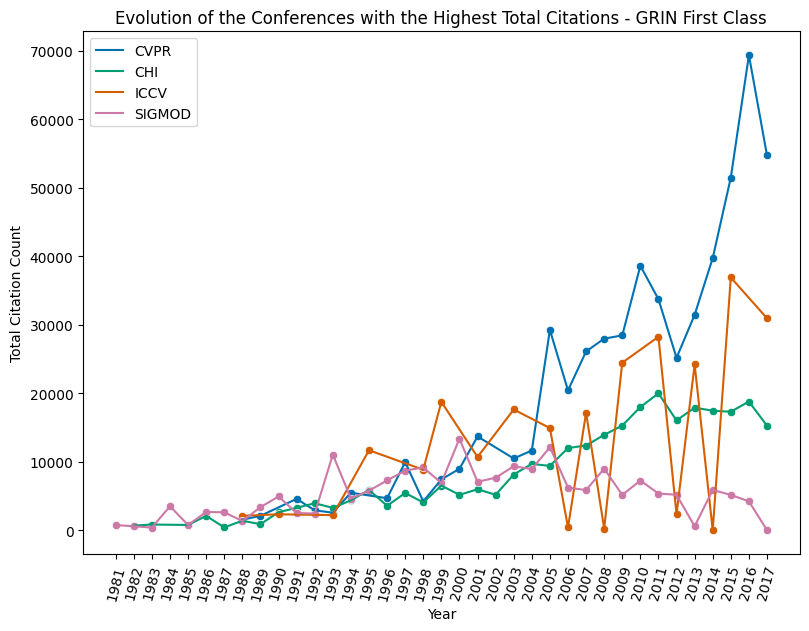

In [61]:
fig,ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=list(dict_cit_conference['cvpr'].keys()), y=list(dict_cit_conference['cvpr'].values()), label='cvpr'.upper())
sns.lineplot(x=list(dict_cit_conference['chi'].keys()), y=list(dict_cit_conference['chi'].values()), label='chi'.upper())
sns.lineplot(x=list(dict_cit_conference['iccv'].keys()), y=list(dict_cit_conference['iccv'].values()), label='iccv'.upper())
sns.lineplot(x=list(dict_cit_conference['sigmod'].keys()), y=list(dict_cit_conference['sigmod'].values()), label='sigmod'.upper())
sns.scatterplot(x=list(dict_cit_conference['cvpr'].keys()), y=list(dict_cit_conference['cvpr'].values()))
sns.scatterplot(x=list(dict_cit_conference['chi'].keys()), y=list(dict_cit_conference['chi'].values()))
sns.scatterplot(x=list(dict_cit_conference['iccv'].keys()), y=list(dict_cit_conference['iccv'].values()))
sns.scatterplot(x=list(dict_cit_conference['sigmod'].keys()), y=list(dict_cit_conference['sigmod'].values()))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.xticks(rotation=75)
plt.tight_layout()
plt.title("Evolution of the Conferences with the Highest Total Citations - GRIN First Class")
plt.xlabel("Year")
plt.ylabel("Total Citation Count")
plt.savefig(path_file_export + 'charts/conf_tot_grin_first.png')

In [62]:
# second class
df_conference_with_grin_rank.loc[df_conference_with_grin_rank['GrinClass'] == 2.0].sort_values(by="Total Citations", ascending=False).head(4)

Total Citations  AVG Citations  N. of Articles  GrinClass GrinRating
icra             424429      22.637421           18749        2.0          A
smc              237537      18.864120           12592        2.0         A-
icassp           228557       7.998215           28576        2.0          A
embc             181957       9.236396           19700        2.0         A-

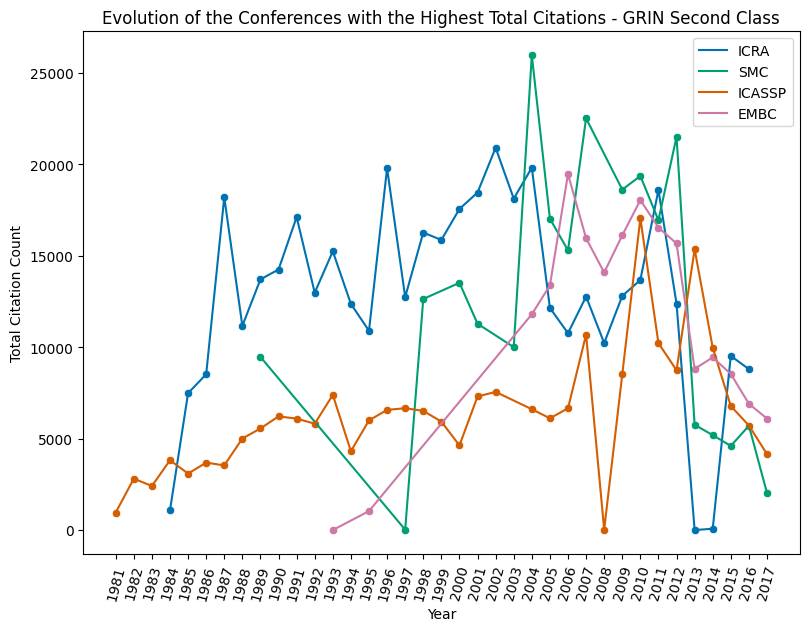

In [63]:
fig,ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=list(dict_cit_conference['icra'].keys()), y=list(dict_cit_conference['icra'].values()), label='icra'.upper())
sns.lineplot(x=list(dict_cit_conference['smc'].keys()), y=list(dict_cit_conference['smc'].values()), label='smc'.upper())
sns.lineplot(x=list(dict_cit_conference['icassp'].keys()), y=list(dict_cit_conference['icassp'].values()), label='icassp'.upper())
sns.lineplot(x=list(dict_cit_conference['embc'].keys()), y=list(dict_cit_conference['embc'].values()), label='embc'.upper())
sns.scatterplot(x=list(dict_cit_conference['icra'].keys()), y=list(dict_cit_conference['icra'].values()))
sns.scatterplot(x=list(dict_cit_conference['smc'].keys()), y=list(dict_cit_conference['smc'].values()))
sns.scatterplot(x=list(dict_cit_conference['icassp'].keys()), y=list(dict_cit_conference['icassp'].values()))
sns.scatterplot(x=list(dict_cit_conference['embc'].keys()), y=list(dict_cit_conference['embc'].values()))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.xticks(rotation=75)
plt.tight_layout()
plt.title("Evolution of the Conferences with the Highest Total Citations - GRIN Second Class")
plt.xlabel("Year")
plt.ylabel("Total Citation Count")
plt.savefig(path_file_export + 'charts/conf_tot_grin_second.png')

In [64]:
# third class
df_conference_with_grin_rank.loc[df_conference_with_grin_rank['GrinClass'] == 3.0].sort_values(by="Total Citations", ascending=False).head(4)

Total Citations  AVG Citations  N. of Articles  GrinClass  \
hipc                 52124      11.083138            4703        3.0   
adhocnets            49039      27.304566            1796        3.0   
igarss               42249       3.640586           11605        3.0   
sac                  40025       8.071184            4959        3.0   

          GrinRating  
hipc               B  
adhocnets         B-  
igarss            B-  
sac                B

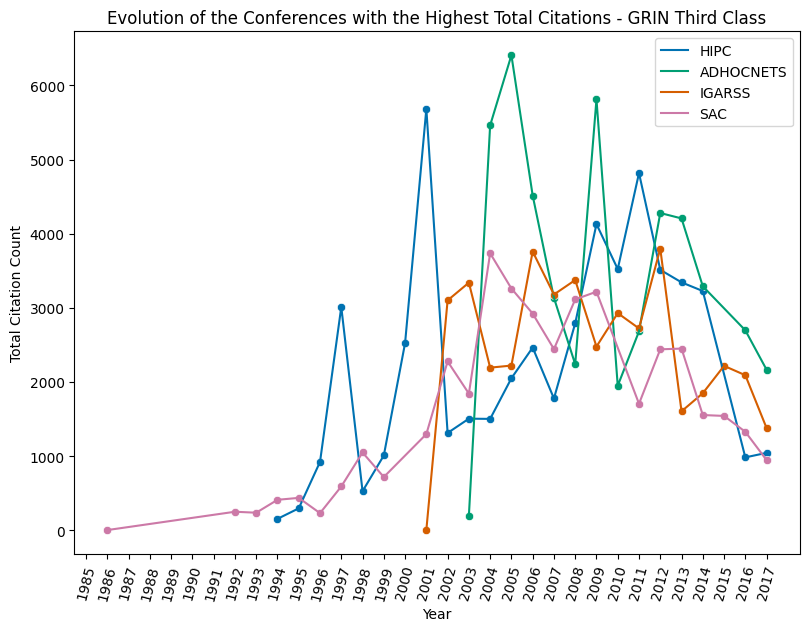

In [65]:
fig,ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=list(dict_cit_conference['hipc'].keys()), y=list(dict_cit_conference['hipc'].values()), label='hipc'.upper())
sns.lineplot(x=list(dict_cit_conference['adhocnets'].keys()), y=list(dict_cit_conference['adhocnets'].values()), label='adhocnets'.upper())
sns.lineplot(x=list(dict_cit_conference['igarss'].keys()), y=list(dict_cit_conference['igarss'].values()), label='igarss'.upper())
sns.lineplot(x=list(dict_cit_conference['sac'].keys()), y=list(dict_cit_conference['sac'].values()), label='sac'.upper())
sns.scatterplot(x=list(dict_cit_conference['hipc'].keys()), y=list(dict_cit_conference['hipc'].values()))
sns.scatterplot(x=list(dict_cit_conference['adhocnets'].keys()), y=list(dict_cit_conference['adhocnets'].values()))
sns.scatterplot(x=list(dict_cit_conference['igarss'].keys()), y=list(dict_cit_conference['igarss'].values()))
sns.scatterplot(x=list(dict_cit_conference['sac'].keys()), y=list(dict_cit_conference['sac'].values()))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.xticks(rotation=75)
plt.tight_layout()
plt.title("Evolution of the Conferences with the Highest Total Citations - GRIN Third Class")
plt.xlabel("Year")
plt.ylabel("Total Citation Count")
plt.savefig(path_file_export + 'charts/conf_tot_grin_third.png')

In [66]:
# unclassified conferences
df_conference_without_grin_rank = pd.concat([df_conference_with_grin_rank.drop(columns=["GrinClass", "GrinRating"]), df_conference]).drop_duplicates(keep=False)

df_conference_without_grin_rank.sort_values(by="Total Citations", ascending=False).head(4)

Total Citations  AVG Citations  N. of Articles
siggraph           222903      31.984933            6969
soco               143222      20.407808            7018
jcis                93729      37.993109            2467
acc                 77783       5.895778           13193

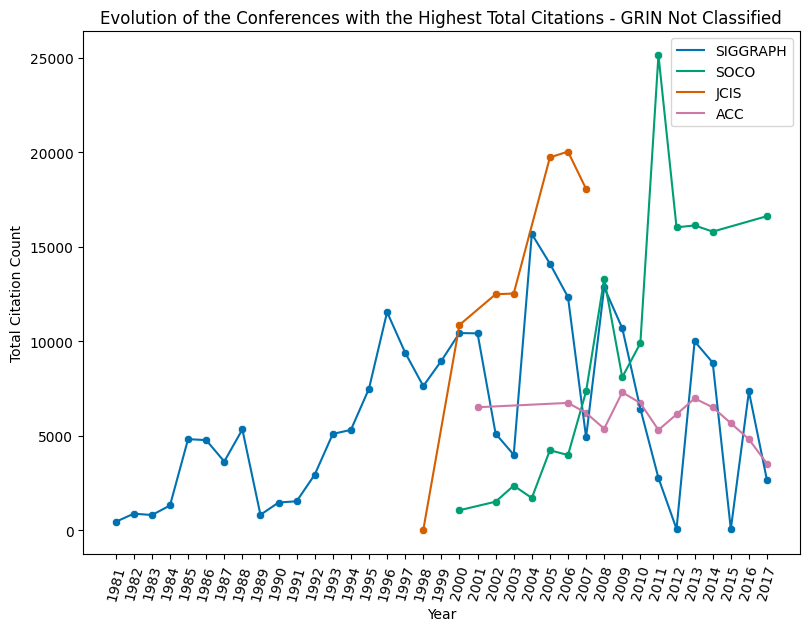

In [67]:
fig,ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=list(dict_cit_conference['siggraph'].keys()), y=list(dict_cit_conference['siggraph'].values()), label='siggraph'.upper())
sns.lineplot(x=list(dict_cit_conference['soco'].keys()), y=list(dict_cit_conference['soco'].values()), label='soco'.upper())
sns.lineplot(x=list(dict_cit_conference['jcis'].keys()), y=list(dict_cit_conference['jcis'].values()), label='jcis'.upper())
sns.lineplot(x=list(dict_cit_conference['acc'].keys()), y=list(dict_cit_conference['acc'].values()), label='acc'.upper())
sns.scatterplot(x=list(dict_cit_conference['siggraph'].keys()), y=list(dict_cit_conference['siggraph'].values()))
sns.scatterplot(x=list(dict_cit_conference['soco'].keys()), y=list(dict_cit_conference['soco'].values()))
sns.scatterplot(x=list(dict_cit_conference['jcis'].keys()), y=list(dict_cit_conference['jcis'].values()))
sns.scatterplot(x=list(dict_cit_conference['acc'].keys()), y=list(dict_cit_conference['acc'].values()))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.xticks(rotation=75)
plt.tight_layout()
plt.title("Evolution of the Conferences with the Highest Total Citations - GRIN Not Classified")
plt.xlabel("Year")
plt.ylabel("Total Citation Count")
plt.savefig(path_file_export + 'charts/conf_tot_grin_unclassified.png')

**Conference Evolution by AVG Citation Count for Each GRIN Class**

In [68]:
y_limit = 200

In [69]:
# first class
df_conference_with_grin_rank[df_conference_with_grin_rank.index.isin(df_conference_with_more_editions.index)].loc[df_conference_with_grin_rank['GrinClass'] == 1.0].sort_values(by="AVG Citations", ascending=False).head(4)

Total Citations  AVG Citations  N. of Articles  GrinClass  \
security              1359     104.538462              13        1.0   
mobicom              76872      76.186323            1009        1.0   
sosp                 36677      69.332703             529        1.0   
eurocrypt            64553      59.386385            1087        1.0   

          GrinRating  
security         A++  
mobicom          A++  
sosp             A++  
eurocrypt        A++

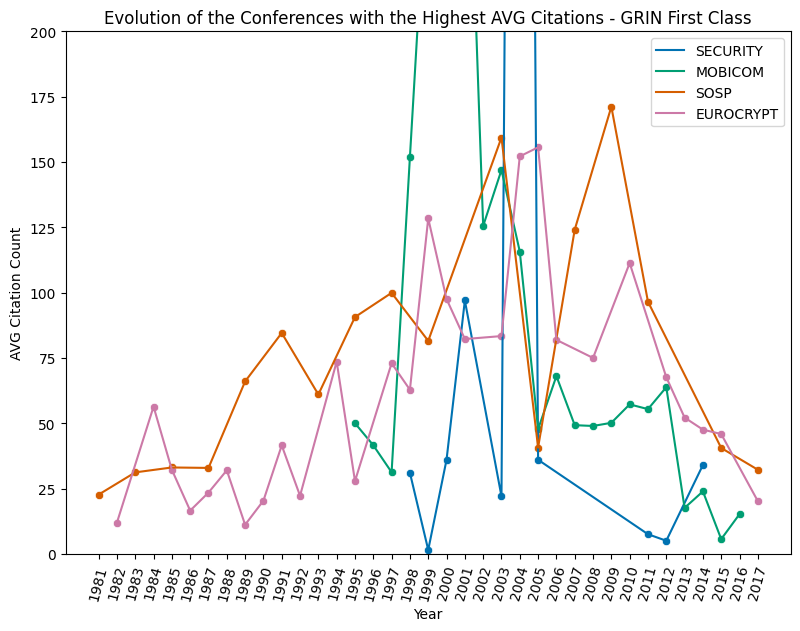

In [70]:
fig,ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=list(dict_avg_cit_conference['security'].keys()), y=list(dict_avg_cit_conference['security'].values()), label='security'.upper())
sns.lineplot(x=list(dict_avg_cit_conference['mobicom'].keys()), y=list(dict_avg_cit_conference['mobicom'].values()), label='mobicom'.upper())
sns.lineplot(x=list(dict_avg_cit_conference['sosp'].keys()), y=list(dict_avg_cit_conference['sosp'].values()), label='sosp'.upper())
sns.lineplot(x=list(dict_avg_cit_conference['eurocrypt'].keys()), y=list(dict_avg_cit_conference['eurocrypt'].values()), label='eurocrypt'.upper())
sns.scatterplot(x=list(dict_avg_cit_conference['security'].keys()), y=list(dict_avg_cit_conference['security'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['mobicom'].keys()), y=list(dict_avg_cit_conference['mobicom'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['sosp'].keys()), y=list(dict_avg_cit_conference['sosp'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['eurocrypt'].keys()), y=list(dict_avg_cit_conference['eurocrypt'].values()))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.xticks(rotation=75)
plt.tight_layout()
plt.title("Evolution of the Conferences with the Highest AVG Citations - GRIN First Class")
plt.xlabel("Year")
plt.ylabel("AVG Citation Count")
ax.set_ylim([0, y_limit])
plt.savefig(path_file_export + 'charts/conf_tot_avg_grin_first.png')

In [71]:
# second class
df_conference_with_grin_rank[df_conference_with_grin_rank.index.isin(df_conference_with_more_editions.index)].loc[df_conference_with_grin_rank['GrinClass'] == 2.0].loc[df_conference_with_grin_rank['N. of Articles'] >= 5].sort_values(by="AVG Citations", ascending=False).head(4)

Total Citations  AVG Citations  N. of Articles  GrinClass GrinRating
amia                3861     351.000000              11        2.0         A-
mobisys            29623      46.503925             637        2.0          A
soups               6304      38.674847             163        2.0         A-
micro              30236      34.437358             878        2.0          A

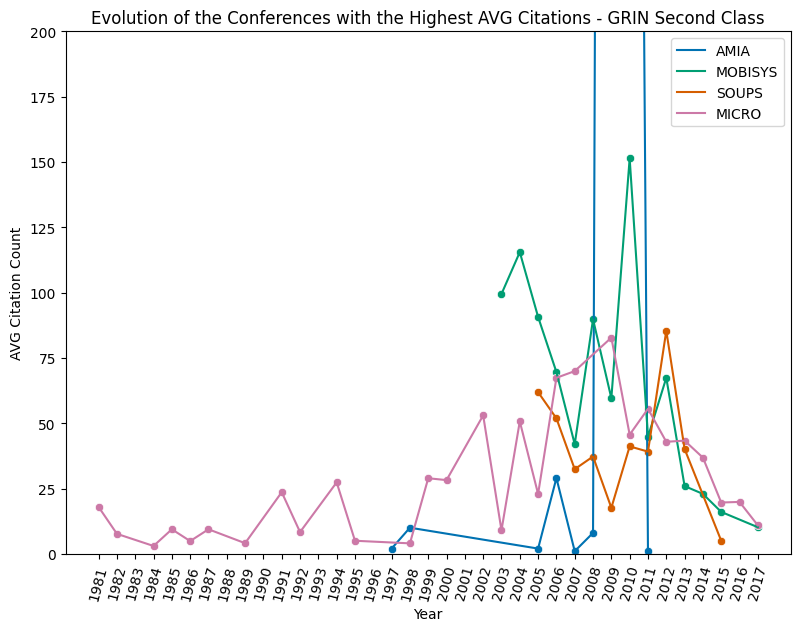

In [72]:
fig,ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=list(dict_avg_cit_conference['amia'].keys()), y=list(dict_avg_cit_conference['amia'].values()), label='amia'.upper())
sns.lineplot(x=list(dict_avg_cit_conference['mobisys'].keys()), y=list(dict_avg_cit_conference['mobisys'].values()), label='mobisys'.upper())
sns.lineplot(x=list(dict_avg_cit_conference['soups'].keys()), y=list(dict_avg_cit_conference['soups'].values()), label='soups'.upper())
sns.lineplot(x=list(dict_avg_cit_conference['micro'].keys()), y=list(dict_avg_cit_conference['micro'].values()), label='micro'.upper())
sns.scatterplot(x=list(dict_avg_cit_conference['amia'].keys()), y=list(dict_avg_cit_conference['amia'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['mobisys'].keys()), y=list(dict_avg_cit_conference['mobisys'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['soups'].keys()), y=list(dict_avg_cit_conference['soups'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['micro'].keys()), y=list(dict_avg_cit_conference['micro'].values()))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.xticks(rotation=75)
plt.tight_layout()
plt.title("Evolution of the Conferences with the Highest AVG Citations - GRIN Second Class")
plt.xlabel("Year")
plt.ylabel("AVG Citation Count")
ax.set_ylim([0, y_limit])
plt.savefig(path_file_export + 'charts/conf_tot_avg_grin_second.png')

In [73]:
# third class
df_conference_with_grin_rank[df_conference_with_grin_rank.index.isin(df_conference_with_more_editions.index)].loc[df_conference_with_grin_rank['GrinClass'] == 3.0].loc[df_conference_with_grin_rank['N. of Articles'] >= 5].sort_values(by="AVG Citations", ascending=False).head(4)

Total Citations  AVG Citations  N. of Articles  GrinClass GrinRating
eccb             4224      52.148148              81        3.0          B
sgp              6208      33.376344             186        3.0          B
gpc             35729      32.718864            1092        3.0         B-
foga             4844      31.051282             156        3.0          B

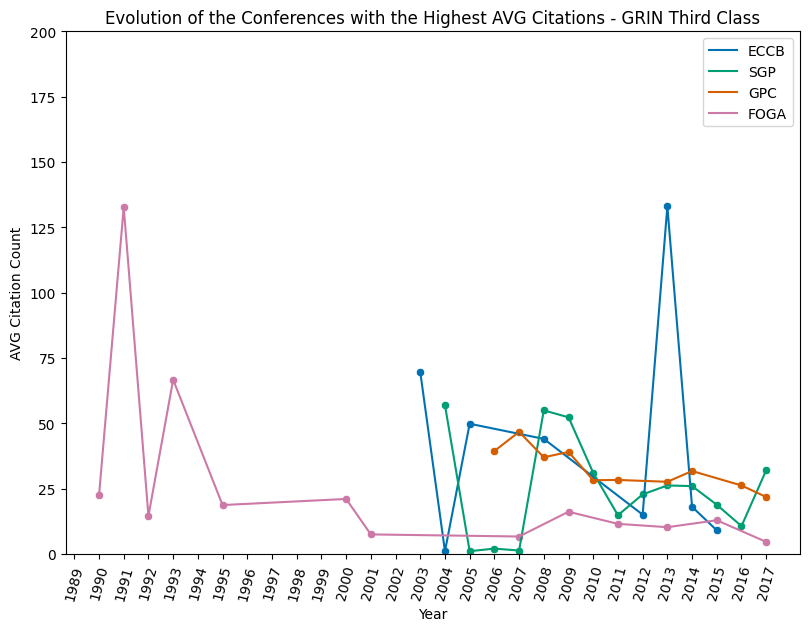

In [74]:
fig,ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=list(dict_avg_cit_conference['eccb'].keys()), y=list(dict_avg_cit_conference['eccb'].values()), label='eccb'.upper())
sns.lineplot(x=list(dict_avg_cit_conference['sgp'].keys()), y=list(dict_avg_cit_conference['sgp'].values()), label='sgp'.upper())
sns.lineplot(x=list(dict_avg_cit_conference['gpc'].keys()), y=list(dict_avg_cit_conference['gpc'].values()), label='gpc'.upper())
sns.lineplot(x=list(dict_avg_cit_conference['foga'].keys()), y=list(dict_avg_cit_conference['foga'].values()), label='foga'.upper())
sns.scatterplot(x=list(dict_avg_cit_conference['eccb'].keys()), y=list(dict_avg_cit_conference['eccb'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['sgp'].keys()), y=list(dict_avg_cit_conference['sgp'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['gpc'].keys()), y=list(dict_avg_cit_conference['gpc'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['foga'].keys()), y=list(dict_avg_cit_conference['foga'].values()))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.xticks(rotation=75)
plt.tight_layout()
plt.title("Evolution of the Conferences with the Highest AVG Citations - GRIN Third Class")
plt.xlabel("Year")
plt.ylabel("AVG Citation Count")
ax.set_ylim([0, y_limit])
plt.savefig(path_file_export + 'charts/conf_tot_avg_grin_third.png')

In [75]:
# unclassified conferences
df_conference_without_grin_rank = pd.concat([df_conference_with_grin_rank.drop(columns=["GrinClass", "GrinRating"]), df_conference]).drop_duplicates(keep=False)

df_conference_without_grin_rank[df_conference_without_grin_rank.index.isin(df_conference_with_more_editions.index)].sort_values(by="AVG Citations", ascending=False).loc[df_conference_without_grin_rank['N. of Articles'] >= 5].head(4)

Total Citations  AVG Citations  N. of Articles
gcb              2637      61.325581              43
ismb            20879      60.518841             345
sp               2689      52.725490              51
sasn             5113      44.460870             115

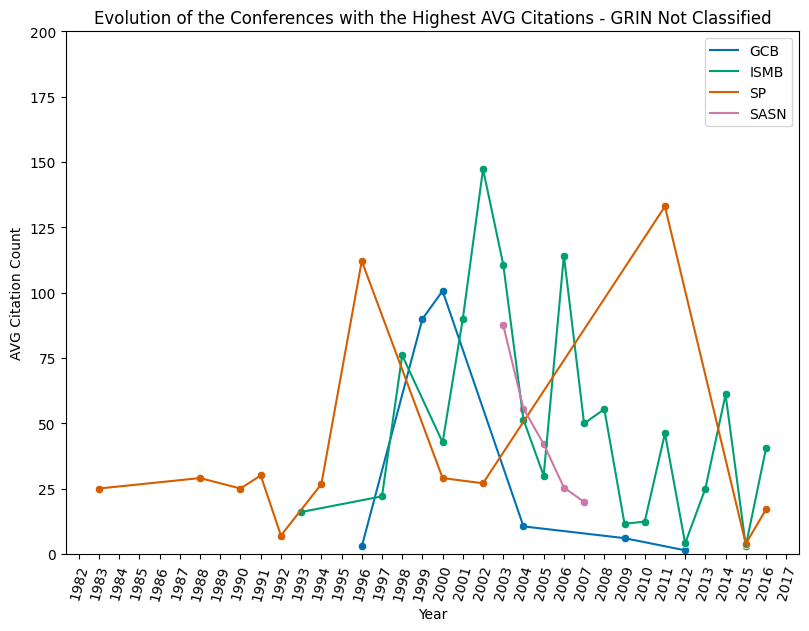

In [76]:
fig,ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=list(dict_avg_cit_conference['gcb'].keys()), y=list(dict_avg_cit_conference['gcb'].values()), label='gcb'.upper())
sns.lineplot(x=list(dict_avg_cit_conference['ismb'].keys()), y=list(dict_avg_cit_conference['ismb'].values()), label='ismb'.upper())
sns.lineplot(x=list(dict_avg_cit_conference['sp'].keys()), y=list(dict_avg_cit_conference['sp'].values()), label='sp'.upper())
sns.lineplot(x=list(dict_avg_cit_conference['sasn'].keys()), y=list(dict_avg_cit_conference['sasn'].values()), label='sasn'.upper())
sns.scatterplot(x=list(dict_avg_cit_conference['gcb'].keys()), y=list(dict_avg_cit_conference['gcb'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['ismb'].keys()), y=list(dict_avg_cit_conference['ismb'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['sp'].keys()), y=list(dict_avg_cit_conference['sp'].values()))
sns.scatterplot(x=list(dict_avg_cit_conference['sasn'].keys()), y=list(dict_avg_cit_conference['sasn'].values()))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.xticks(rotation=75)
plt.tight_layout()
plt.title("Evolution of the Conferences with the Highest AVG Citations - GRIN Not Classified")
plt.xlabel("Year")
plt.ylabel("AVG Citation Count")
ax.set_ylim([0, y_limit])
plt.savefig(path_file_export + 'charts/conf_tot_avg_grin_unclassified.png')

**Considerations About the GRIN Conference Rating**

The integration how the GRIN Conference Rating showed that the conferences with the most total citations and avg citations are not only the "top tier" conferences within the GRIN Rating System. In fact, in both the top 10s we can notice some middle tier (2nd class of 3) conferences.
The GRIN Rating is a complex metric, and of course it's not computed only on the Total and AVG Citations obtained by a conference. Ths result it's absolutely normal.

Another interesting consideration is about the number of articles: the conferences with the most Total and AVG Number of citations have really different number of published articles. However, the conferences with the most number of articles usually are part of the mid tier of the GRIN Rating System, with only some of them in the top one.

#### CORE Conference Ranking Integration
*The CORE Conference Ranking provides assessments of major conferences in the computing disciplines.The rankings are managed by the CORE Executive Committee, with periodic rounds for submission of requests for addition or reranking of conferences. Decisions are made by academic committees based on objective data requested as part of the submission process.* (source: CORE)

**Creation of the Datasets Subsets with the CORE Rating**

Unfortunately, at the time of the writing of this notebook, the CORE Conference Ranking is not available for every conference but only for the most famous and prestigious. For this reason, we need to filter all the conferences that doesn't have the rating.

In [77]:
df_conference_series_core_rank.dropna(inplace=True)

Column rename:

In [78]:
df_conference_series_core_rank.rename(columns={"CORE_2008_Rank": "2008 Rank", "CORE_2013_Rank": "2013 Rank", "CORE_2014_Rank": "2014 Rank", "CORE_2017_Rank": "2017 Rank", "CORE_2018_Rank": "2018 Rank", "CORE_2020_Rank": "2020 Rank", "CORE_2021_Rank": "2021 Rank", "ERA_2010_Rank": "2010 Rank"}, inplace=True)
df_conference_series_core_rank = df_conference_series_core_rank.reindex(sorted(df_conference_series_core_rank.columns), axis=1)

df_conference_series_core_rank

2008 Rank 2010 Rank 2013 Rank 2014 Rank 2017 Rank 2018 Rank 2020 Rank  \
0            A         A         A         A         A         A         A   
1            A         A         A         A         A         A         A   
3            A         B         B         B         B         B         B   
5            A         A         A         A         A         A         A   
6            B         A         A         A         A         A         A   
...        ...       ...       ...       ...       ...       ...       ...   
4838         B         B         B         B         B         B         B   
4937         B         B         B         B         B         B         B   
5020         B         B         B         B         B         B         B   
5060         B         B         B         B         B         B         B   
5253         A         A         A         A         A         A         A   

     2021 Rank ConferenceSeriesNormalizedName  
0            A                           disc  
1            A                            esa  
3            B                           dexa  
5            B                       interact  
6            B                            fct  
...        ...                            ...  
4838         C                           ifsa  
4937         B                           seta  
5020         B                        sirocco  
5060         B                        pacling  
5253         A                          hotos  

[385 rows x 9 columns]

Inner join with the Total and AVG Citations dataframe

In [79]:
df_conference_with_core_rank = pd.merge(left=df_conference, right=df_conference_series_core_rank, left_on=df_conference.index, right_on="ConferenceSeriesNormalizedName", how="inner")
df_conference_with_core_rank = df_conference_with_core_rank.set_index(df_conference_with_core_rank["ConferenceSeriesNormalizedName"].values).drop(columns=["ConferenceSeriesNormalizedName"])
df_conference_with_core_rank

Total Citations  AVG Citations  N. of Articles 2008 Rank 2010 Rank  \
neurips               1033     516.500000               2        A*         A   
mobicom              76872      76.186323            1009        A*         A   
osdi                  3759      75.180000              50        A*         A   
sosp                 36677      69.332703             529        A*         A   
eurocrypt            64553      59.386385            1087        A*         A   
...                    ...            ...             ...       ...       ...   
ecai                  1097       2.812821             390         A         A   
ecms                   987       2.660377             371         B         B   
pacling                 67       2.576923              26         B         B   
somet                  197       2.373494              83         B         B   
jurix                   55       2.115385              26         C         C   

          2013 Rank 2014 Rank 2017 Rank 2018 Rank 2020 Rank 2021 Rank  
neurips          A*        A*        A*        A*        A*        A*  
mobicom          A*        A*        A*        A*        A*        A*  
osdi             A*        A*        A*        A*        A*        A*  
sosp             A*        A*        A*        A*        A*        A*  
eurocrypt        A*        A*        A*        A*        A*        A*  
...             ...       ...       ...       ...       ...       ...  
ecai              A         A         A         A         A         A  
ecms              B         B         B         B         B         B  
pacling           B         B         B         B         B         B  
somet             B         B         B         B         B         C  
jurix             C         C         C         C         C         C  

[378 rows x 11 columns]

<br/>

### Integration of the Conference Acceptance Rate
The following part of this notebook contains the integration of the conference acceptance rate. These metrics could be another relevant way for finding interesting conferences or conferences editions that are going to be better analyzed later. 

#### Creation of the Datasets Subsets with the Acceptance Rate

Unfortunately, at the time of the writing of this notebook, we don't have the Acceptance Rate for every conference but only for some of the most famous and prestigious (some conferences do not provide this kind of data). For this reason, we need to filter all the conferences that doesn't have this information.

In [80]:
df_conference_acceptance_rate.dropna()
df_conference_acceptance_rate

ConferenceSeriesNormalizedName  Papers_Accepted  Papers_Perc_Accepted  \
0                            crypto               60                  26.4   
1                            crypto               61                  26.9   
2                            crypto               48                  21.3   
3                            crypto               42                  18.3   
4                            crypto               39                  19.3   
...                             ...              ...                   ...   
4741                           srds               23                  38.0   
4742                       safecomp               33                  38.0   
4743                         policy               18                  31.0   
4744                         policy               20                  22.0   
4745                         policy               18                  21.0   

      Papers_Submitted  Year  
0                  227  2014  
1                  227  2013  
2                  225  2012  
3                  230  2011  
4                  202  2010  
...                ...   ...  
4741                61  1995  
4742                86  2008  
4743                59  2006  
4744                90  2005  
4745                87  2004  

[4746 rows x 5 columns]

**Join with the Conferences Acceptance Rate Data**

In [81]:
# creation of the conference normalized name column (conf name + year) on the acceptance rate dataframe
df_conference_acceptance_rate['ConferenceNormalizedName'] = np.nan
df_conference_acceptance_rate['ConferenceNormalizedName'] = df_conference_acceptance_rate.ConferenceSeriesNormalizedName + ' ' + df_conference_acceptance_rate.Year.map(str)

df_conference_editions_with_acceptance_rate = pd.merge(left=df_single_conference, right=df_conference_acceptance_rate, left_on=df_single_conference.index, right_on="ConferenceNormalizedName", how="inner")
df_conference_editions_with_acceptance_rate = df_conference_editions_with_acceptance_rate.set_index(df_conference_editions_with_acceptance_rate["ConferenceNormalizedName"].values).drop(columns=["ConferenceNormalizedName"])
df_conference_editions_with_acceptance_rate

Total Citations  AVG Citations  N. of Articles  \
mobicom 2000              13929     497.464286              28   
mobicom 2001               9726     324.200000              30   
mobihoc 2002               3892     176.909091              22   
crypto 2001                5516     167.151515              33   
eurocrypt 2005             5136     155.636364              33   
...                         ...            ...             ...   
gi 2016                       1       1.000000               1   
enc 2016                      2       1.000000               2   
enc 2016                      2       1.000000               2   
iceis 2005                    2       1.000000               2   
waoa 2008                     1       1.000000               1   

               ConferenceSeriesNormalizedName  Papers_Accepted  \
mobicom 2000                          mobicom               28   
mobicom 2001                          mobicom               30   
mobihoc 2002                          mobihoc               22   
crypto 2001                            crypto               33   
eurocrypt 2005                      eurocrypt               33   
...                                       ...              ...   
gi 2016                                    gi               26   
enc 2016                                  enc                5   
enc 2016                                  enc                5   
iceis 2005                              iceis               89   
waoa 2008                                waoa               22   

                Papers_Perc_Accepted  Papers_Submitted  Year  
mobicom 2000                    12.0               226  2000  
mobicom 2001                    11.0               281  2001  
mobihoc 2002                    16.0               134  2002  
crypto 2001                     21.2               156  2001  
eurocrypt 2005                  17.4               190  2005  
...                              ...               ...   ...  
gi 2016                         42.0                62  2016  
enc 2016                       100.0                 5  2016  
enc 2016                       100.0                 5  2016  
iceis 2005                      19.0               459  2005  
waoa 2008                       39.3                56  2008  

[3254 rows x 8 columns]

#### Study of the Correlation Between the Acceptance Rate and the Number of Obtained Citations

First of all we need to define some useful functions

In [82]:
def kendalltau_pval(x, y):
    return stats.kendalltau(x, y)[1]

def pearsonr_pval(x, y):
    return stats.pearsonr(x, y)[1]

def spearmanr_pval(x, y):
    return stats.spearmanr(x, y)[1]

In [83]:
def compute_correlation(df, method='kendall'):
    assert method in ['pearson', 'kendall', 'spearman']
    
    computed_corr = df.corr(method=method)
    
    if method == 'pearson':
        p_value = df.corr(method=pearsonr_pval)
    elif method == 'kendall':
        p_value = df.corr(method=kendalltau_pval)
    elif method == 'spearman':
        p_value = df.corr(method=spearmanr_pval)

    return computed_corr, p_value

In [84]:
def print_p_values_exponents(df):
    return np.floor(np.log10(np.abs(df)))

In [85]:
def print_correlation_heatmap(df, method='pearson', figsize=(9, 7), full_map=False, additional_export_name_string=""):
    assert method in ['pearson', 'kendall', 'spearman']
    
    computed_corr, p_value = compute_correlation(df, method)

    mask = np.triu(np.ones_like(computed_corr, dtype=float))

    f, ax = plt.subplots(figsize=figsize)

    cmap = sns.diverging_palette(230, 15, as_cmap=True)

    if full_map:
        sns.heatmap(computed_corr, cmap=cmap, vmax=1, center=0,
                    square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws = {'va': 'bottom'})

        sns.heatmap(computed_corr, cmap=cmap, vmax=1, center=0,
                    square=True, linewidths=.5, cbar = False, annot = p_value, annot_kws = {'va': 'top'})
    else:
        sns.heatmap(computed_corr, mask=mask, cmap=cmap, vmax=1, center=0,
                    square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws = {'va': 'bottom'})

        sns.heatmap(computed_corr, mask=mask, cmap=cmap, vmax=1, center=0,
                    square=True, linewidths=.5, cbar = False, annot = p_value, annot_kws = {'va': 'top'})

    
    plt.title(method[0].upper() + method[1:] + " Correlation")
    plt.savefig(path_file_export + 'charts/corr_heatmap_' + method + additional_export_name_string + '.png')

    return computed_corr, p_value

**Kendall Correlation**

/var/folders/gy/9drryydn41lddmpgtpzzxrgw0000gn/T/ipykernel_49169/533427031.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  computed_corr = df.corr(method=method)
/var/folders/gy/9drryydn41lddmpgtpzzxrgw0000gn/T/ipykernel_49169/533427031.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  p_value = df.corr(method=kendalltau_pval)


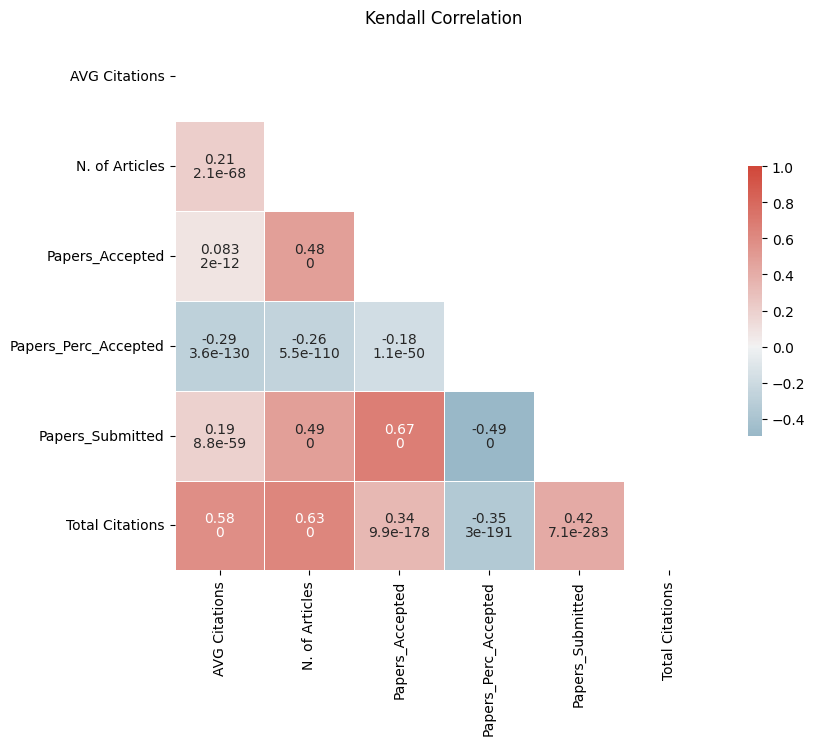

In [86]:
df_support_no_year = df_conference_editions_with_acceptance_rate[df_conference_editions_with_acceptance_rate.columns.difference(['Year'])]

corr_kendall, p_value_kendall = print_correlation_heatmap(df_support_no_year, method='kendall')

**Pearson Correlation**

/var/folders/gy/9drryydn41lddmpgtpzzxrgw0000gn/T/ipykernel_49169/533427031.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  computed_corr = df.corr(method=method)
/var/folders/gy/9drryydn41lddmpgtpzzxrgw0000gn/T/ipykernel_49169/533427031.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  p_value = df.corr(method=pearsonr_pval)


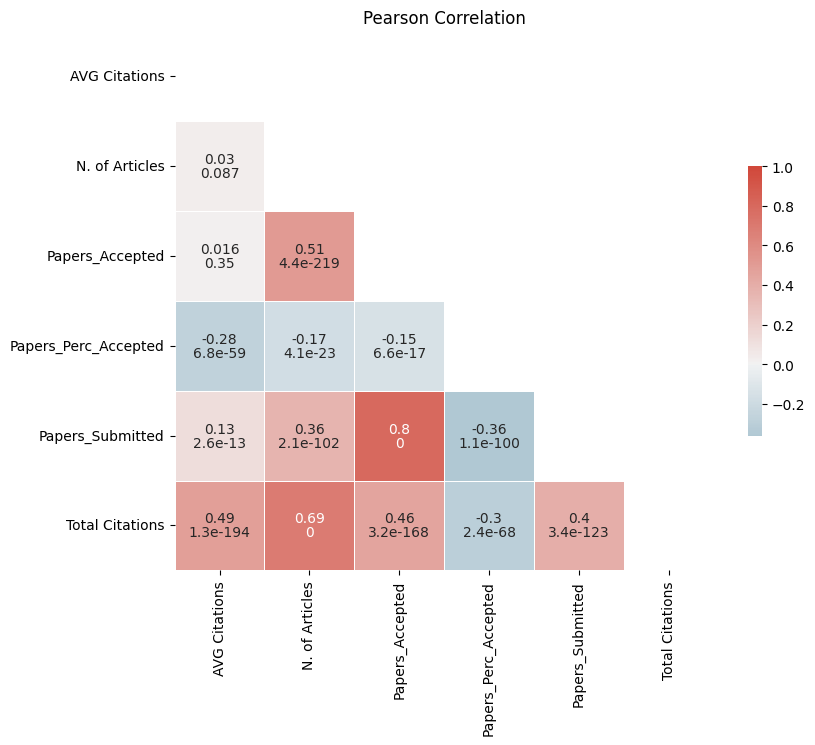

In [87]:
df_support_no_year = df_conference_editions_with_acceptance_rate[df_conference_editions_with_acceptance_rate.columns.difference(['Year'])]

corr_pearson, p_value_pearson = print_correlation_heatmap(df_support_no_year, method='pearson')

**Spearman Correlation**

/var/folders/gy/9drryydn41lddmpgtpzzxrgw0000gn/T/ipykernel_49169/533427031.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  computed_corr = df.corr(method=method)
/var/folders/gy/9drryydn41lddmpgtpzzxrgw0000gn/T/ipykernel_49169/533427031.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  p_value = df.corr(method=spearmanr_pval)


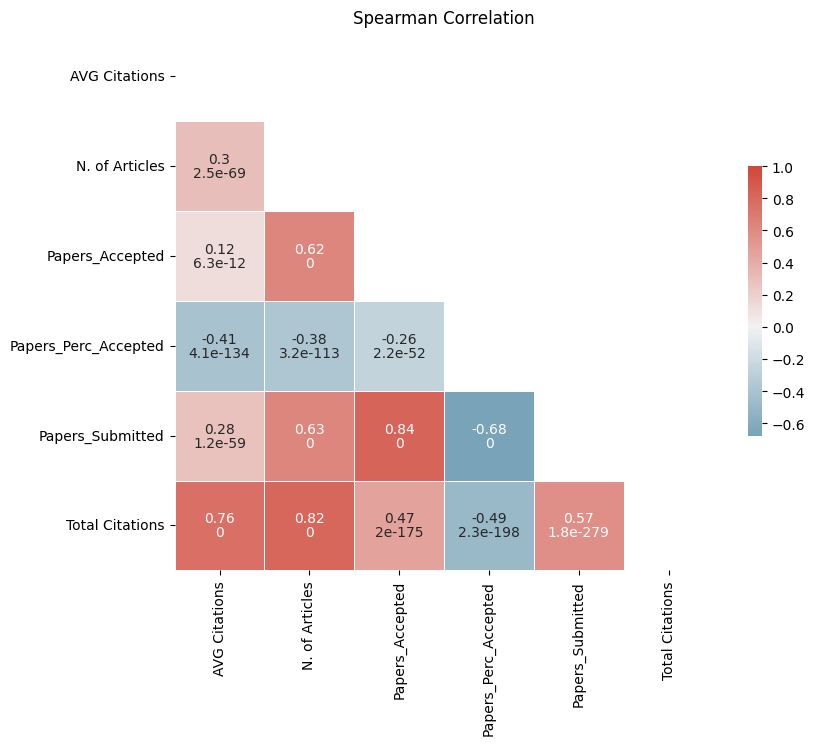

In [88]:
df_support_no_year = df_conference_editions_with_acceptance_rate[df_conference_editions_with_acceptance_rate.columns.difference(['Year'])]

corr_spearman, p_value_spearman = print_correlation_heatmap(df_support_no_year, method='spearman')

**Note About the p-valus**

In some cases, it could happen that the correlation heatmaps show p-values equal to 0. This is not an error! It simply means that the p-value is so small that it cannot be handled by the machine's precision.

Here you can give a look to the exponents of the Kendall's p-values:

In [89]:
print_p_values_exponents(p_value_kendall)

/opt/homebrew/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


AVG Citations  N. of Articles  Papers_Accepted  \
AVG Citations                   0.0           -68.0            -12.0   
N. of Articles                -68.0             0.0             -inf   
Papers_Accepted               -12.0            -inf              0.0   
Papers_Perc_Accepted         -130.0          -110.0            -50.0   
Papers_Submitted              -59.0            -inf             -inf   
Total Citations                -inf            -inf           -178.0   

                      Papers_Perc_Accepted  Papers_Submitted  Total Citations  
AVG Citations                       -130.0             -59.0             -inf  
N. of Articles                      -110.0              -inf             -inf  
Papers_Accepted                      -50.0              -inf           -178.0  
Papers_Perc_Accepted                   0.0              -inf           -191.0  
Papers_Submitted                      -inf               0.0           -283.0  
Total Citations                     -191.0            -283.0              0.0

**Correlation Summary Plot**

The following plot contains only the relevant information, for a better readability.

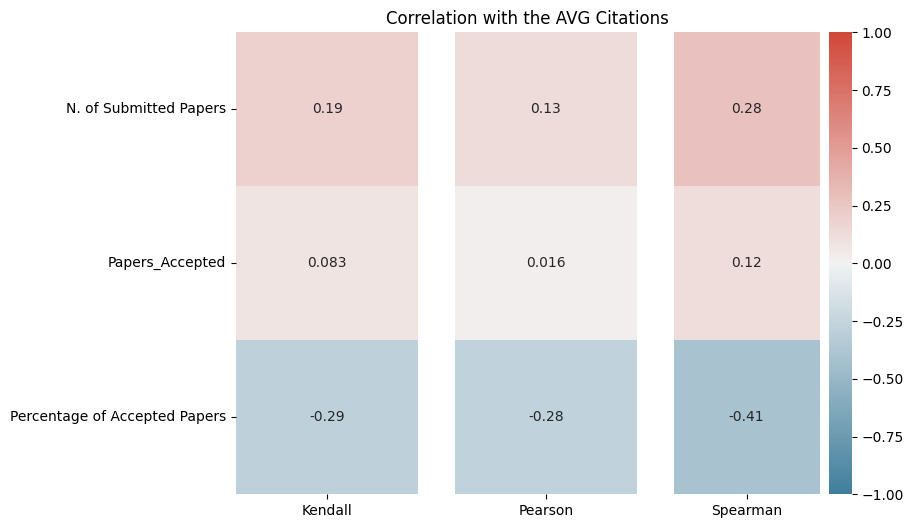

In [90]:
# Correlation values
_s = corr_spearman.rename({'AVG Citations': 'Spearman'}, axis=1)
_k = corr_kendall.rename({'AVG Citations': 'Kendall'}, axis=1)
_p = corr_pearson.rename({'AVG Citations': 'Pearson'}, axis=1)
_s.rename({'Papers_Perc_Accepted': 'Percentage of Accepted Papers', 'Papers_Submitted': "N. of Submitted Papers"}, axis=0, inplace=True)
_k.rename({'Papers_Perc_Accepted': 'Percentage of Accepted Papers', 'Papers_Submitted': "N. of Submitted Papers"}, axis=0, inplace=True)
_p.rename({'Papers_Perc_Accepted': 'Percentage of Accepted Papers', 'Papers_Submitted': "N. of Submitted Papers"}, axis=0, inplace=True)
_s.rename(columns={'Papers_Perc_Accepted': 'Percentage of Accepted Papers', 'Papers_Submitted': "N. of Submitted Papers", 'Papers_Accepted': "N. of Accepted Papers"}, inplace=True)
_k.rename(columns={'Papers_Perc_Accepted': 'Percentage of Accepted Papers', 'Papers_Submitted': "N. of Submitted Papers", 'Papers_Accepted': "N. of Accepted Papers"}, inplace=True)
_p.rename(columns={'Papers_Perc_Accepted': 'Percentage of Accepted Papers', 'Papers_Submitted': "N. of Submitted Papers", 'Papers_Accepted': "N. of Accepted Papers"}, inplace=True)

_p.drop(['AVG Citations', 'N. of Articles', 'Total Citations'], inplace=True)
_s.drop(['AVG Citations', 'N. of Articles', 'Total Citations'], inplace=True)
_k.drop(['AVG Citations', 'N. of Articles', 'Total Citations'], inplace=True)

_p = _p.sort_index(axis=0)
_s = _s.sort_index(axis=0)
_k = _k.sort_index(axis=0)

#Plot
fig, ax = plt.subplots(1,3, figsize=(8,6))
plt.title("Correlation with the AVG Citations", x=-1)
cmap = sns.diverging_palette(230, 15, as_cmap=True)
sns.heatmap(_k[['Kendall']], ax=ax[0], cmap=cmap, cbar=False, vmin=-1, vmax=1, annot=True)
sns.heatmap(_p[['Pearson']], ax=ax[1], cmap=cmap, cbar=False, yticklabels=False, vmin=-1, vmax=1, annot=True)
sns.heatmap(_s[['Spearman']], ax=ax[2], cmap=cmap, yticklabels=False, vmin=-1, vmax=1, annot=True)
plt.savefig(path_file_export + 'charts/corr_avg_cit_vs_acceptance_rate.png')

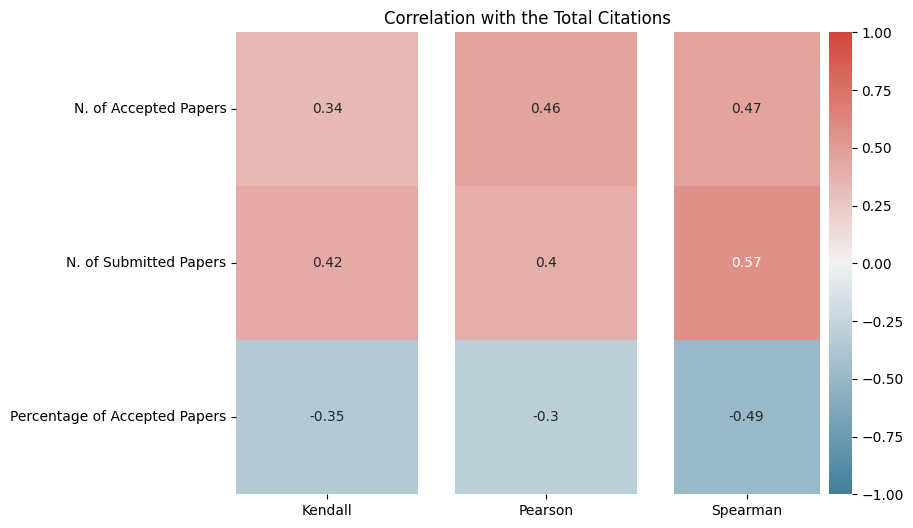

In [91]:
# Correlation values
_s = corr_spearman.rename({'Total Citations': 'Spearman'}, axis=1)
_k = corr_kendall.rename({'Total Citations': 'Kendall'}, axis=1)
_p = corr_pearson.rename({'Total Citations': 'Pearson'}, axis=1)
_s.rename({'Papers_Perc_Accepted': 'Percentage of Accepted Papers', 'Papers_Accepted': "N. of Accepted Papers", 'Papers_Submitted': "N. of Submitted Papers"}, axis=0, inplace=True)
_k.rename({'Papers_Perc_Accepted': 'Percentage of Accepted Papers', 'Papers_Accepted': "N. of Accepted Papers", 'Papers_Submitted': "N. of Submitted Papers"}, axis=0, inplace=True)
_p.rename({'Papers_Perc_Accepted': 'Percentage of Accepted Papers', 'Papers_Accepted': "N. of Accepted Papers", 'Papers_Submitted': "N. of Submitted Papers"}, axis=0, inplace=True)
_s.rename(columns={'Papers_Perc_Accepted': 'Percentage of Accepted Papers', 'Papers_Accepted': "N. of Accepted Papers", 'Papers_Submitted': "N. of Submitted Papers"}, inplace=True)
_k.rename(columns={'Papers_Perc_Accepted': 'Percentage of Accepted Papers', 'Papers_Accepted': "N. of Accepted Papers", 'Papers_Submitted': "N. of Submitted Papers"}, inplace=True)
_p.rename(columns={'Papers_Perc_Accepted': 'Percentage of Accepted Papers', 'Papers_Accepted': "N. of Accepted Papers", 'Papers_Submitted': "N. of Submitted Papers"}, inplace=True)

_p.drop(['AVG Citations', 'N. of Articles', 'Total Citations'], inplace=True)
_s.drop(['AVG Citations', 'N. of Articles', 'Total Citations'], inplace=True)
_k.drop(['AVG Citations', 'N. of Articles', 'Total Citations'], inplace=True)

_p = _p.sort_index(axis=0)
_s = _s.sort_index(axis=0)
_k = _k.sort_index(axis=0)

#Plot
fig, ax = plt.subplots(1,3, figsize=(8,6))
plt.title("Correlation with the Total Citations", x=-1)
cmap = sns.diverging_palette(230, 15, as_cmap=True)
sns.heatmap(_k[['Kendall']], ax=ax[0], cmap=cmap, cbar=False, vmin=-1, vmax=1, annot=True)
sns.heatmap(_p[['Pearson']], ax=ax[1], cmap=cmap, cbar=False, yticklabels=False, vmin=-1, vmax=1, annot=True)
sns.heatmap(_s[['Spearman']], ax=ax[2], cmap=cmap, yticklabels=False, vmin=-1, vmax=1, annot=True)
plt.savefig(path_file_export + 'charts/corr_tot_cit_vs_acceptance_rate.png')

#### Considerations About the Correlations

The computation of the correlation between the Conferences Acceptance Rate Data and the Citations showed interesting results:
* **The AVG Citations have a strong inverse correlation with the Percentage of Accepted Papers**
* The Total Citations also have a strong inverse correlation with the Percentage of Accepted Papers, but of course they have a strong positive correlation with the Number of Submitted and Accepted Papers

These results are similar for both the Pearson, Kendall and Spearman correlation methods.

**These data confirm that the most "selective" conferences usually obtain better results in terms of citations to their articles.**

<br/><br/>

____________________________________________________________

## Data Analysis on the Bibliometric and Touristic Data

### Correlation Between Citations and General Touristic Indexes About Cities

#### Print of the City Touristic Indexes Dataset

In [92]:
df_city_touristic_indexes

City  \
0                  Innsbruck   
1                     Austin   
2                    Wrocław   
3     Villefranche-sur-Saône   
4                     Lisbon   
...                      ...   
2465                   Essex   
2466                  Bastia   
2467                 Laramie   
2468       Shijiazhuang City   
2469            Longyearbyen   

                                     ConferenceLocation        Country  \
0                             Innsbruck, Tyrol, Austria        Austria   
1                          Austin, Texas, United States  United States   
2           Wrocław, Lower Silesian Voivodeship, Poland         Poland   
3     Villefranche-sur-Saône, Auvergne-Rhône-Alpes, ...         France   
4                                      Lisbon, Portugal       Portugal   
...                                                 ...            ...   
2465                     Essex, Maryland, United States  United States   
2466                            Bastia, Corsica, France         France   
2467                    Laramie, Wyoming, United States  United States   
2468                    Shijiazhuang City, Hebei, China          China   
2469                               Longyearbyen, Norway         Norway   

      N. of Booking Res.  N. of Google Res.  N. of Tripadvisor Res.     SWP  \
0                   2880          117000000                    3060   73456   
1                   6390          848000000                    1165  178836   
2                   9700          105000000                    4390  136404   
3                    160           11400000                     280   27815   
4                   4407          178000000                    3052  121730   
...                  ...                ...                     ...     ...   
2465                7620         1540000000                    1375   71775   
2466                1770           30500000                     820   64516   
2467                 330           33700000                     630   10391   
2468                 160            9810000                     770   87977   
2469                 120           15300000                     510   69379   

                           State  Tourist Arrivals  
0                          Tyrol               NaN  
1                          Texas               NaN  
2     Lower Silesian Voivodeship               NaN  
3           Auvergne-Rhône-Alpes               NaN  
4                            NaN              3.54  
...                          ...               ...  
2465                    Maryland               NaN  
2466                     Corsica               NaN  
2467                     Wyoming               NaN  
2468                       Hebei               NaN  
2469                         NaN               NaN  

[2470 rows x 9 columns]

#### Creation of the Support Structures

In [93]:
df_single_conference_reindexed = df_single_conference.reset_index(level=0)
df_single_conference_reindexed = df_single_conference_reindexed.rename(columns={"index": "ConferenceNormalizedName"})
df_single_conference_reindexed

ConferenceNormalizedName  Total Citations  AVG Citations  N. of Articles
0                    amia 2009             3792    1896.000000               2
1                security 2004             1058    1058.000000               1
2                    icis 2000              909     909.000000               1
3                 neurips 1988             1033     516.500000               2
4                 mobicom 2000            13929     497.464286              28
...                        ...              ...            ...             ...
26255                iwec 2016                1       1.000000               1
26256              tamoco 2009                1       1.000000               1
26257           eurova-ws 2011                1       1.000000               1
26258                bled 2005                1       1.000000               1
26259              fusion 2016                1       1.000000               1

[26260 rows x 4 columns]

In [94]:
df_conf_and_locations = df_citations_and_locations.drop(df_citations_and_locations.columns.difference(["ConferenceLocation", "ConferenceNormalizedName"]), 1)
df_conf_and_locations = df_conf_and_locations.drop_duplicates(subset=["ConferenceNormalizedName"])

/var/folders/gy/9drryydn41lddmpgtpzzxrgw0000gn/T/ipykernel_49169/1547099311.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_conf_and_locations = df_citations_and_locations.drop(df_citations_and_locations.columns.difference(["ConferenceLocation", "ConferenceNormalizedName"]), 1)


In [95]:
df_single_conference_with_location = pd.merge(left=df_single_conference_reindexed, right=df_conf_and_locations, on="ConferenceNormalizedName")
df_single_conference_with_location

ConferenceNormalizedName  Total Citations  AVG Citations  \
0                    amia 2009             3792    1896.000000   
1                security 2004             1058    1058.000000   
2                    icis 2000              909     909.000000   
3                 neurips 1988             1033     516.500000   
4                 mobicom 2000            13929     497.464286   
...                        ...              ...            ...   
26255                iwec 2016                1       1.000000   
26256              tamoco 2009                1       1.000000   
26257           eurova-ws 2011                1       1.000000   
26258                bled 2005                1       1.000000   
26259              fusion 2016                1       1.000000   

       N. of Articles                        ConferenceLocation  
0                   2  San Francisco, California, United States  
1                   1      San Diego, California, United States  
2                   1      Brisbane City, Queensland, Australia  
3                   2           Denver, Colorado, United States  
4                  28      Boston, Massachusetts, United States  
...               ...                                       ...  
26255               1                   Vienna, Vienna, Austria  
26256               1                Merida, Extremadura, Spain  
26257               1                            Bergen, Norway  
26258               1                            Bled, Slovenia  
26259               1    Heidelberg, Baden-Württemberg, Germany  

[26260 rows x 5 columns]

In [96]:
df_sum_cit_by_place = df_single_conference_with_location.groupby('ConferenceLocation')['Total Citations'].sum()
df_count_cit_by_place = df_single_conference_with_location.groupby('ConferenceLocation')['ConferenceLocation'].count()
df_mean_cit_by_place = df_single_conference_with_location.groupby('ConferenceLocation')['Total Citations'].mean()

dict_cit_by_city = {}
for k,v in df_sum_cit_by_place.items():
    if not(k == 'None'):
        dict_cit_by_city[k] = [df_mean_cit_by_place[k], v, df_count_cit_by_place[k]]
dict_cit_by_city = {k: v for k, v in sorted(dict_cit_by_city.items(), key=lambda item: item[1], reverse=True)}

df_cit_by_city = pd.DataFrame(data = dict_cit_by_city.values(), index = dict_cit_by_city.keys(), columns = ['AVG Citations', 'Total Citations', 'N. of Editions'])
df_cit_by_city = df_cit_by_city.sort_values('N. of Editions', ascending=False)
df_cit_by_city.head(10)

AVG Citations  Total Citations  \
Paris, Ile-de-France, France                 512.540404           202966   
Beijing, Beijing, China                      550.600522           210880   
San Diego, California, United States        1159.738739           386193   
San Jose, California, United States          687.578462           223463   
Barcelona, Catalonia, Spain                  640.720137           187731   
Vienna, Vienna, Austria                      387.713262           108172   
London, England, United Kingdom              404.334532           112405   
Orlando, Florida, United States              657.837638           178274   
San Francisco, California, United States    1449.699248           385620   
Berlin, Berlin, Germany                      369.435798            94945   

                                          N. of Editions  
Paris, Ile-de-France, France                         396  
Beijing, Beijing, China                              383  
San Diego, California, United States                 333  
San Jose, California, United States                  325  
Barcelona, Catalonia, Spain                          293  
Vienna, Vienna, Austria                              279  
London, England, United Kingdom                      278  
Orlando, Florida, United States                      271  
San Francisco, California, United States             266  
Berlin, Berlin, Germany                              257

**Final Support Dataframe**

In [97]:
df_cit_by_city_reindexed = df_cit_by_city.reset_index(level=0)
df_cit_by_city_reindexed = df_cit_by_city_reindexed.rename(columns={"index": "ConferenceLocation"})

df_city_cit_and_turistic_indexes = pd.merge(left=df_city_touristic_indexes, right=df_cit_by_city_reindexed, on="ConferenceLocation")

# Reindex
df_city_cit_and_turistic_indexes = df_city_cit_and_turistic_indexes.set_index("ConferenceLocation")

# column sort
df_city_cit_and_turistic_indexes = df_city_cit_and_turistic_indexes.reindex(sorted(df_city_cit_and_turistic_indexes.columns), axis=1)

df_city_cit_and_turistic_indexes

AVG Citations  \
ConferenceLocation                                                  
Innsbruck, Tyrol, Austria                              427.157895   
Austin, Texas, United States                           718.598985   
Wrocław, Lower Silesian Voivodeship, Poland            140.833333   
Villefranche-sur-Saône, Auvergne-Rhône-Alpes, F...     271.300000   
Lisbon, Portugal                                       347.301887   
...                                                           ...   
Vaduz, Liechtenstein                                     4.000000   
Gifu, Japan                                            129.000000   
Kasane, Chobe District, Botswana                        15.000000   
Essex, Maryland, United States                         588.000000   
Shijiazhuang City, Hebei, China                          7.000000   

                                                                      City  \
ConferenceLocation                                                           
Innsbruck, Tyrol, Austria                                        Innsbruck   
Austin, Texas, United States                                        Austin   
Wrocław, Lower Silesian Voivodeship, Poland                        Wrocław   
Villefranche-sur-Saône, Auvergne-Rhône-Alpes, F...  Villefranche-sur-Saône   
Lisbon, Portugal                                                    Lisbon   
...                                                                    ...   
Vaduz, Liechtenstein                                                 Vaduz   
Gifu, Japan                                                           Gifu   
Kasane, Chobe District, Botswana                                    Kasane   
Essex, Maryland, United States                                       Essex   
Shijiazhuang City, Hebei, China                          Shijiazhuang City   

                                                          Country  \
ConferenceLocation                                                  
Innsbruck, Tyrol, Austria                                 Austria   
Austin, Texas, United States                        United States   
Wrocław, Lower Silesian Voivodeship, Poland                Poland   
Villefranche-sur-Saône, Auvergne-Rhône-Alpes, F...         France   
Lisbon, Portugal                                         Portugal   
...                                                           ...   
Vaduz, Liechtenstein                                Liechtenstein   
Gifu, Japan                                                 Japan   
Kasane, Chobe District, Botswana                         Botswana   
Essex, Maryland, United States                      United States   
Shijiazhuang City, Hebei, China                             China   

                                                    N. of Booking Res.  \
ConferenceLocation                                                       
Innsbruck, Tyrol, Austria                                         2880   
Austin, Texas, United States                                      6390   
Wrocław, Lower Silesian Voivodeship, Poland                       9700   
Villefranche-sur-Saône, Auvergne-Rhône-Alpes, F...                 160   
Lisbon, Portugal                                                  4407   
...                                                                ...   
Vaduz, Liechtenstein                                                90   
Gifu, Japan                                                       4120   
Kasane, Chobe District, Botswana                                   310   
Essex, Maryland, United States                                    7620   
Shijiazhuang City, Hebei, China                                    160   

                                                    N. of Editions  \
ConferenceLocation                                                   
Innsbruck, Tyrol, Austria                                       38   
Austin, Texas, United States                                   197  

#### Correlation Heatmaps

**Kendall Correlation**

/var/folders/gy/9drryydn41lddmpgtpzzxrgw0000gn/T/ipykernel_49169/533427031.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  computed_corr = df.corr(method=method)
/var/folders/gy/9drryydn41lddmpgtpzzxrgw0000gn/T/ipykernel_49169/533427031.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  p_value = df.corr(method=kendalltau_pval)


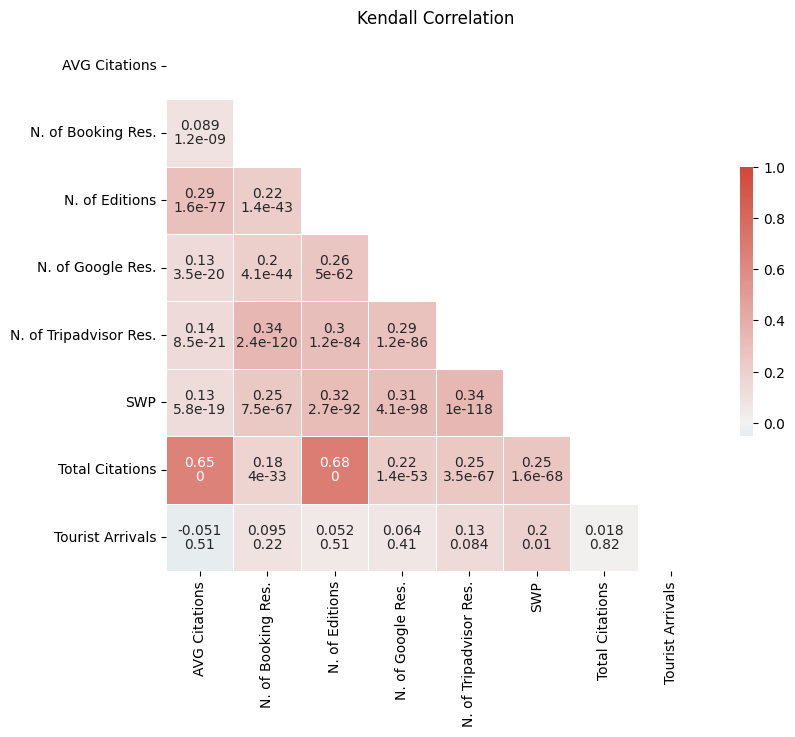

In [98]:
corr_kendall, p_value_kendall = print_correlation_heatmap(df_city_cit_and_turistic_indexes, method='kendall')

**Pearson Correlation**

/var/folders/gy/9drryydn41lddmpgtpzzxrgw0000gn/T/ipykernel_49169/533427031.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  computed_corr = df.corr(method=method)
/var/folders/gy/9drryydn41lddmpgtpzzxrgw0000gn/T/ipykernel_49169/533427031.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  p_value = df.corr(method=pearsonr_pval)


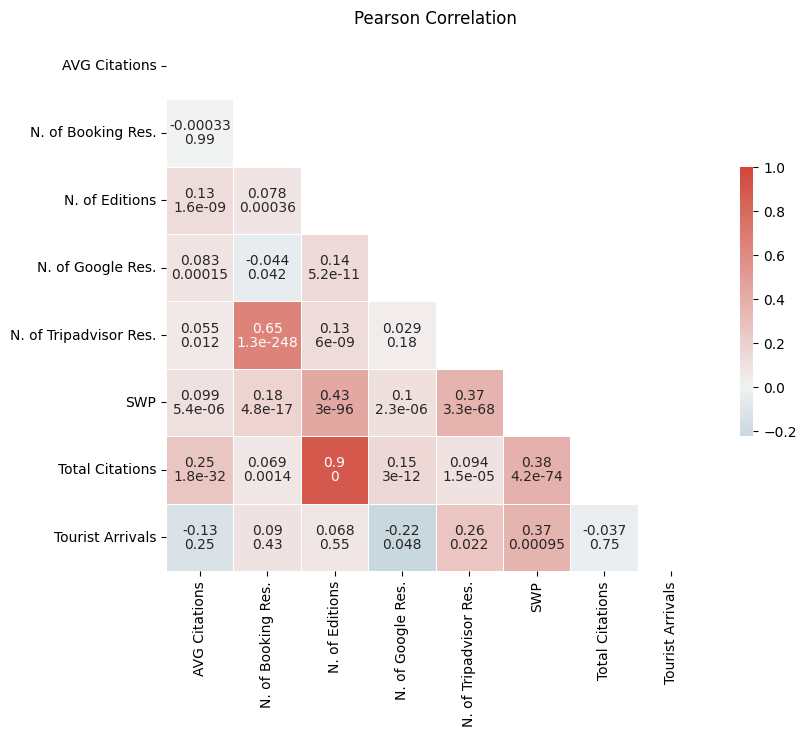

In [99]:
corr_pearson, p_value_pearson = print_correlation_heatmap(df_city_cit_and_turistic_indexes, method='pearson')

**Spearman Correlation**

/var/folders/gy/9drryydn41lddmpgtpzzxrgw0000gn/T/ipykernel_49169/533427031.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  computed_corr = df.corr(method=method)
/var/folders/gy/9drryydn41lddmpgtpzzxrgw0000gn/T/ipykernel_49169/533427031.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  p_value = df.corr(method=spearmanr_pval)


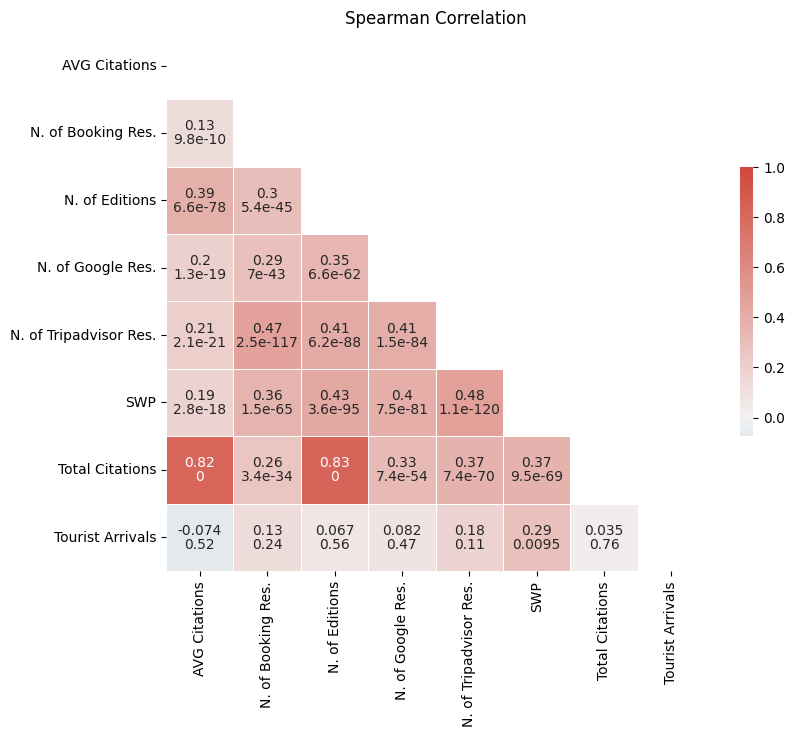

In [100]:
corr_spearman, p_value_spearman = print_correlation_heatmap(df_city_cit_and_turistic_indexes, method='spearman')

**Correlation Summary Plot**

The following plot contains only the relevant information, for a better readability.

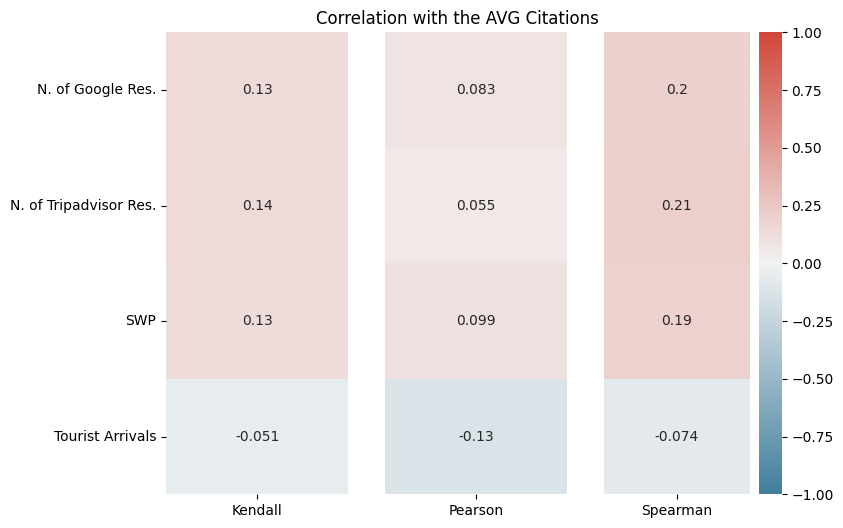

In [101]:
# Correlation values
_s = corr_spearman.rename({'AVG Citations': 'Spearman'}, axis=1)
_k = corr_kendall.rename({'AVG Citations': 'Kendall'}, axis=1)
_p = corr_pearson.rename({'AVG Citations': 'Pearson'}, axis=1)

_p.drop(['AVG Citations', 'N. of Editions', 'Total Citations', 'N. of Booking Res.'], inplace=True)
_s.drop(['AVG Citations', 'N. of Editions', 'Total Citations', 'N. of Booking Res.'], inplace=True)
_k.drop(['AVG Citations', 'N. of Editions', 'Total Citations', 'N. of Booking Res.'], inplace=True)

_p = _p.sort_index(axis=0)
_s = _s.sort_index(axis=0)
_k = _k.sort_index(axis=0)

#Plot
fig, ax = plt.subplots(1,3, figsize=(8,6))
plt.title("Correlation with the AVG Citations", x=-1)
cmap = sns.diverging_palette(230, 15, as_cmap=True)
sns.heatmap(_k[['Kendall']], ax=ax[0], cmap=cmap, cbar=False, vmin=-1, vmax=1, annot=True)
sns.heatmap(_p[['Pearson']], ax=ax[1], cmap=cmap, cbar=False, yticklabels=False, vmin=-1, vmax=1, annot=True)
sns.heatmap(_s[['Spearman']], ax=ax[2], cmap=cmap, yticklabels=False, vmin=-1, vmax=1, annot=True)
plt.savefig(path_file_export + 'charts/corr_avg_cit_vs_city_indexes.png')

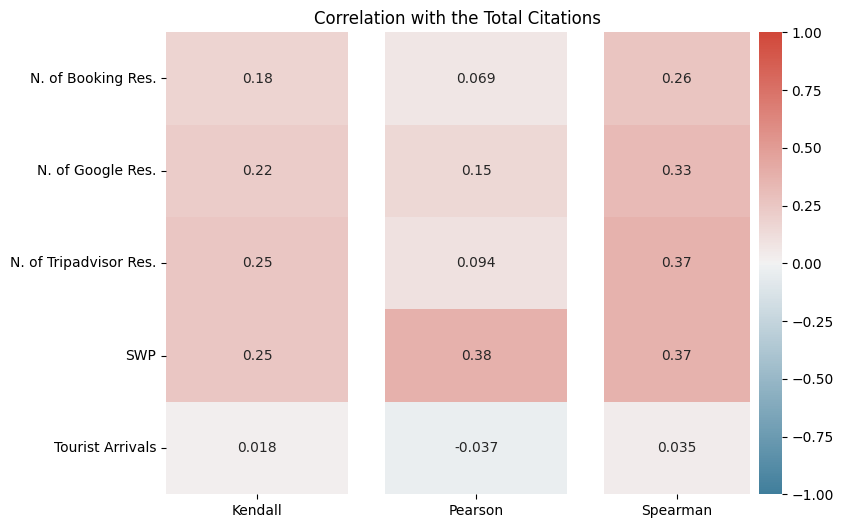

In [102]:
# Correlation values
_s = corr_spearman.rename({'Total Citations': 'Spearman'}, axis=1)
_k = corr_kendall.rename({'Total Citations': 'Kendall'}, axis=1)
_p = corr_pearson.rename({'Total Citations': 'Pearson'}, axis=1)

_p.drop(['AVG Citations', 'N. of Editions', 'Total Citations'], inplace=True)
_s.drop(['AVG Citations', 'N. of Editions', 'Total Citations'], inplace=True)
_k.drop(['AVG Citations', 'N. of Editions', 'Total Citations'], inplace=True)

_p = _p.sort_index(axis=0)
_s = _s.sort_index(axis=0)
_k = _k.sort_index(axis=0)

#Plot
fig, ax = plt.subplots(1,3, figsize=(8,6))
plt.title("Correlation with the Total Citations", x=-1)
cmap = sns.diverging_palette(230, 15, as_cmap=True)
sns.heatmap(_k[['Kendall']], ax=ax[0], cmap=cmap, cbar=False, vmin=-1, vmax=1, annot=True)
sns.heatmap(_p[['Pearson']], ax=ax[1], cmap=cmap, cbar=False, yticklabels=False, vmin=-1, vmax=1, annot=True)
sns.heatmap(_s[['Spearman']], ax=ax[2], cmap=cmap, yticklabels=False, vmin=-1, vmax=1, annot=True)
plt.savefig(path_file_export + 'charts/corr_tot_cit_vs_city_indexes.png')

<br/>

### Correlation Between Citations and "Complex" Touristic Indexes About Countries

#### Import of the Country Touristic Indexes

In [103]:
df_country_touristic_indexes

Country  TTCI   EE  TTPEC  INF  NCR   BE   SS   HH  HRLM  \
0             United States   5.3  5.8    4.6  5.8  4.9  5.8  5.6  5.8   5.8   
1                    Poland   4.2  5.3    4.5  4.0  3.1  4.3  5.6  6.3   4.8   
2                   Austria   5.0  5.9    4.9  5.4  3.6  4.8  6.2  7.0   5.3   
3                    France   5.4  5.6    4.8  5.4  5.9  4.8  5.7  6.5   5.1   
5                  Portugal   4.9  5.5    4.8  5.2  4.0  4.7  6.3  6.0   5.1   
...                     ...   ...  ...    ...  ...  ...  ...  ...  ...   ...   
2254            El Salvador   3.2  3.9    4.6  2.7  1.7  3.6  3.0  5.1   3.7   
2298                Bahrain   3.9  5.5    4.3  4.4  1.4  5.4  5.9  5.2   4.9   
2367  Saint Kitts and Nevis   NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN   NaN   
2461          Liechtenstein   NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN   NaN   
2463               Botswana   3.5  4.4    4.4  2.8  2.3  4.9  5.3  3.3   4.3   

      ICTR  PTT   IO   PC   ES  ATI  GPI  TSI   NR  CRBT  
0      6.0  5.5  4.0  4.7  4.1  5.9  4.9  6.6  5.0   4.7  
1      5.5  4.2  4.1  5.7  4.2  3.2  4.3  4.5  3.2   3.0  
2      6.1  5.3  4.0  4.7  5.7  4.2  5.2  6.7  4.1   3.2  
3      5.9  5.1  4.2  4.5  5.3  4.8  5.6  5.7  4.9   6.8  
5      5.5  5.7  4.2  5.1  4.2  4.7  4.2  6.7  4.0   4.1  
...    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  
2254   4.2  4.3  4.6  5.7  3.8  2.1  2.9  3.1  2.2   1.3  
2298   5.8  4.5  2.9  5.8  4.1  3.5  5.2  4.6  1.6   1.2  
2367   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  
2461   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  
2463   4.1  4.8  2.3  6.0  4.3  2.1  2.8  3.6  3.4   1.2  

[126 rows x 20 columns]

#### Creation of the Support Structures

**Extraction of the Country Name**

In [104]:
df_single_conference_with_full_location = df_single_conference_with_location.copy()

df_single_conference_with_full_location["Country"] = np.nan

for index, row in df_single_conference_with_full_location.iterrows():

    splitted_location = row['ConferenceLocation'].split(', ')

    if splitted_location.__len__() == 3:
        df_single_conference_with_full_location.at[index, 'Country'] = splitted_location[2]
        
    elif splitted_location.__len__() == 2:
        df_single_conference_with_full_location.at[index, 'Country'] = splitted_location[1]

df_single_conference_with_full_location

ConferenceNormalizedName  Total Citations  AVG Citations  \
0                    amia 2009             3792    1896.000000   
1                security 2004             1058    1058.000000   
2                    icis 2000              909     909.000000   
3                 neurips 1988             1033     516.500000   
4                 mobicom 2000            13929     497.464286   
...                        ...              ...            ...   
26255                iwec 2016                1       1.000000   
26256              tamoco 2009                1       1.000000   
26257           eurova-ws 2011                1       1.000000   
26258                bled 2005                1       1.000000   
26259              fusion 2016                1       1.000000   

       N. of Articles                        ConferenceLocation        Country  
0                   2  San Francisco, California, United States  United States  
1                   1      San Diego, California, United States  United States  
2                   1      Brisbane City, Queensland, Australia      Australia  
3                   2           Denver, Colorado, United States  United States  
4                  28      Boston, Massachusetts, United States  United States  
...               ...                                       ...            ...  
26255               1                   Vienna, Vienna, Austria        Austria  
26256               1                Merida, Extremadura, Spain          Spain  
26257               1                            Bergen, Norway         Norway  
26258               1                            Bled, Slovenia       Slovenia  
26259               1    Heidelberg, Baden-Württemberg, Germany        Germany  

[26260 rows x 6 columns]

In [105]:
df_sum_cit_by_country = df_single_conference_with_full_location.groupby('Country')['Total Citations'].sum()
df_count_cit_by_country = df_single_conference_with_full_location.groupby('Country')['ConferenceLocation'].count()
df_mean_cit_by_country = df_single_conference_with_full_location.groupby('Country')['Total Citations'].mean()

dict_cit_by_country = {}
for k,v in df_sum_cit_by_country.items():
    if not(k == 'None'):
        dict_cit_by_country[k] = [df_mean_cit_by_country[k], v, df_count_cit_by_country[k]]
dict_cit_by_country = {k: v for k, v in sorted(dict_cit_by_country.items(), key=lambda item: item[1], reverse=True)}

df_cit_by_country = pd.DataFrame(data = dict_cit_by_country.values(), index = dict_cit_by_country.keys(), columns = ['AVG Citations', 'Total Citations', 'N. of Editions'])
df_cit_by_country = df_cit_by_country.sort_values('N. of Editions', ascending=False)
df_cit_by_country.head(10)

AVG Citations  Total Citations  N. of Editions
United States      928.368964          7017541            7559
China              470.591676           836712            1778
Germany            357.466747           591250            1654
France             444.640966           570919            1284
Italy              448.974763           569300            1268
United Kingdom     404.791385           479273            1184
Canada             714.367295           834381            1168
Spain              463.566229           458467             989
Japan              520.511574           449722             864
Australia          613.542214           327018             533

**Final Support Dataframe**

In [106]:
df_cit_by_country_reindexed = df_cit_by_country.reset_index(level=0)
df_cit_by_country_reindexed = df_cit_by_country_reindexed.rename(columns={"index": "Country"})

df_country_cit_and_turistic_indexes = pd.merge(left=df_country_touristic_indexes, right=df_cit_by_country_reindexed, on="Country")

# Reindex
df_country_cit_and_turistic_indexes = df_country_cit_and_turistic_indexes.set_index("Country")

# column sort
column_order_country = ['TTCI', 'EE', 'BE', 'SS', 'HH', 'HRLM', 'ICTR', 'TTPEC', 
       'PTT', 'IO', 'PC', 'ES', 'INF', 'ATI', 'GPI', 'TSI', 'NCR', 'NR', 'CRBT',
       'AVG Citations', 'Total Citations', 'N. of Editions']
df_country_cit_and_turistic_indexes = df_country_cit_and_turistic_indexes.reindex(column_order_country, axis=1)
#df_country_cit_and_turistic_indexes = df_country_cit_and_turistic_indexes.reindex(sorted(df_country_cit_and_turistic_indexes.columns), axis=1)

df_country_cit_and_turistic_indexes

TTCI   EE   BE   SS   HH  HRLM  ICTR  TTPEC  PTT   IO   PC  \
Country                                                                     
United States   5.3  5.8  5.8  5.6  5.8   5.8   6.0    4.6  5.5  4.0  4.7   
Poland          4.2  5.3  4.3  5.6  6.3   4.8   5.5    4.5  4.2  4.1  5.7   
Austria         5.0  5.9  4.8  6.2  7.0   5.3   6.1    4.9  5.3  4.0  4.7   
France          5.4  5.6  4.8  5.7  6.5   5.1   5.9    4.8  5.1  4.2  4.5   
Portugal        4.9  5.5  4.7  6.3  6.0   5.1   5.5    4.8  5.7  4.2  5.1   
...             ...  ...  ...  ...  ...   ...   ...    ...  ...  ...  ...   
Uganda          3.2  3.7  4.2  4.7  2.5   4.1   3.0    4.3  4.3  3.0  5.7   
Bolivia         3.5  4.2  2.8  5.2  4.8   4.0   4.1    4.2  3.7  3.2  5.5   
Benin           3.0  4.0  4.4  5.4  2.5   4.6   2.9    3.9  3.5  2.9  5.1   
Liechtenstein   NaN  NaN  NaN  NaN  NaN   NaN   NaN    NaN  NaN  NaN  NaN   
Botswana        3.5  4.4  4.9  5.3  3.3   4.3   4.1    4.4  4.8  2.3  6.0   

                ES  INF  ATI  GPI  TSI  NCR   NR  CRBT  AVG Citations  \
Country                                                                 
United States  4.1  5.8  5.9  4.9  6.6  4.9  5.0   4.7     928.368964   
Poland         4.2  4.0  3.2  4.3  4.5  3.1  3.2   3.0     316.003185   
Austria        5.7  5.4  4.2  5.2  6.7  3.6  4.1   3.2     375.994048   
France         5.3  5.4  4.8  5.6  5.7  5.9  4.9   6.8     444.640966   
Portugal       4.2  5.2  4.7  4.2  6.7  4.0  4.0   4.1     290.153696   
...            ...  ...  ...  ...  ...  ...  ...   ...            ...   
Uganda         4.2  2.2  1.7  2.5  2.3  2.6  3.7   1.5      25.000000   
Bolivia        4.2  2.6  2.2  2.1  3.3  3.1  4.1   2.0      76.500000   
Benin          4.3  2.2  1.7  2.3  2.5  2.0  2.9   1.2      12.000000   
Liechtenstein  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN       4.000000   
Botswana       4.3  2.8  2.1  2.8  3.6  2.3  3.4   1.2      15.000000   

               Total Citations  N. of Editions  
Country                                         
United States          7017541            7559  
Poland                   99225             314  
Austria                 189501             504  
France                  570919            1284  
Portugal                149139             514  
...                        ...             ...  
Uganda                      25               1  
Bolivia                    153               2  
Benin                       12               1  
Liechtenstein                4               1  
Botswana                    15               1  

[111 rows x 22 columns]

#### AVG Citations vs Touristic Indexes

In [107]:
metrics = list(set(df_country_cit_and_turistic_indexes.columns.values.tolist()) - set(["Country", "N. of Editions", "Total Citations", "AVG Citations"]))
metrics.sort()

**AVG Citations vs Touristic Indexes Without Fit**

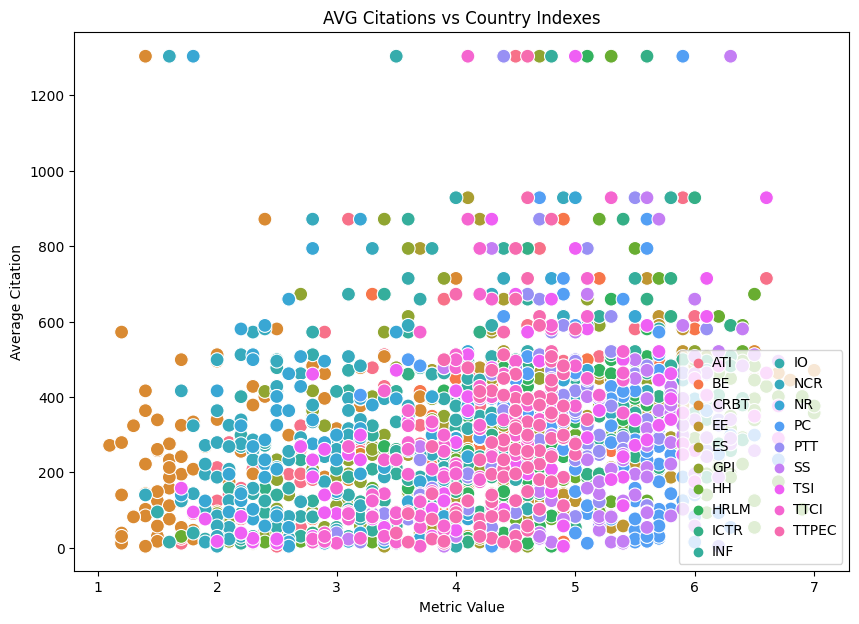

In [108]:
_first_done = False
_ = df_country_cit_and_turistic_indexes.copy()
_.rename({metrics[0]:'metric'}, axis=1, inplace=True)
_.loc[:,'KIND'] = metrics[0]

for metric in metrics:
    __ = df_country_cit_and_turistic_indexes.copy()
    __.rename({metric: 'metric'}, axis=1, inplace=True)
    __.loc[:, 'KIND'] = metric

    if not _first_done:
        _first_done = True
    else:
        _ = pd.concat([_, __])

_['metric'] = _['metric'].round(decimals=1)
#_ = _.groupby(['metric','KIND'],as_index=False).mean()
_.sort_values(['KIND'], inplace=True)

fig,ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(data=_, x='metric', y='AVG Citations', hue='KIND', s=100)
plt.title("AVG Citations vs Country Indexes")
plt.xlabel('Metric Value')
plt.ylabel('Average Citation')


# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:], labels[:],
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=2, frameon=True)

plt.savefig(path_file_export + 'charts/avg_cit_vs_country_indexes_without_fit.png')

**AVG Citations vs Touristic Indexes With Fit**

Here you can define the plot's number of columns:

In [109]:
n_cols = 4

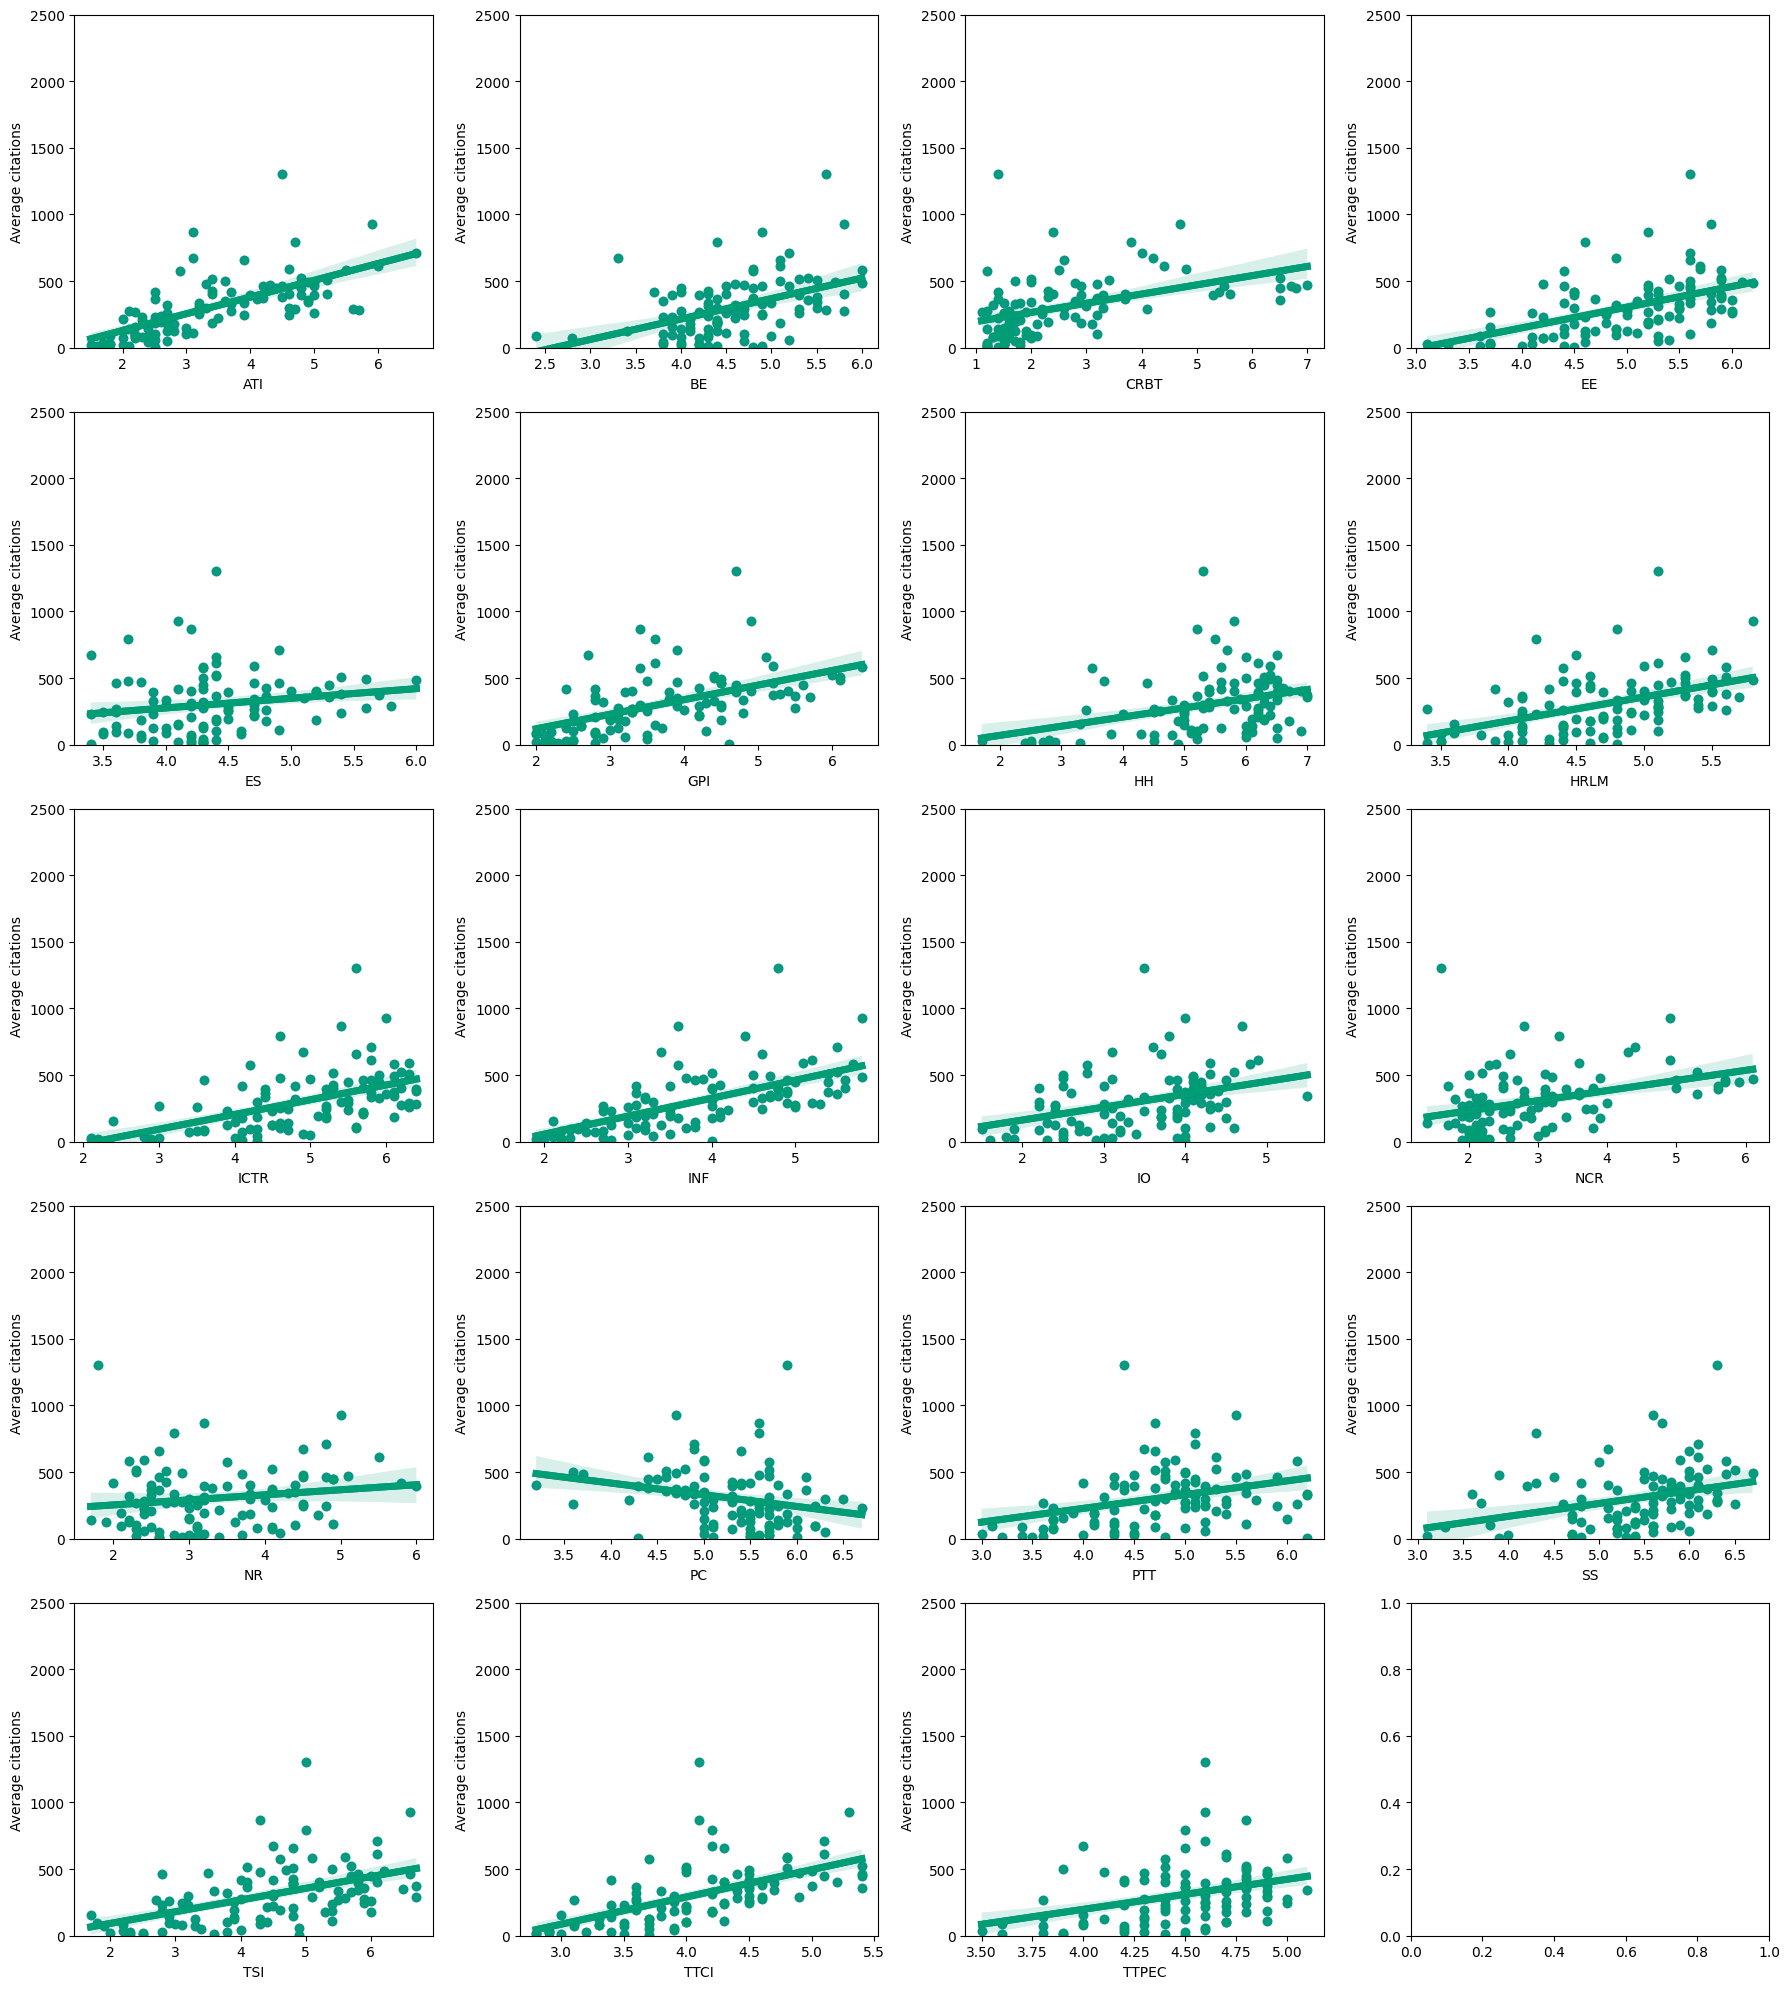

In [110]:
n_rows = int(metrics.__len__() / n_cols)
if metrics.__len__() % 4:
    n_rows += 1

fig,ax = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))

i = 0
j = 0
for metric in metrics:
    sns.regplot(data=_[_['KIND']==metric], x='metric', y='AVG Citations', order=1, ci=None, line_kws={'linewidth':5}, label=metric, ax=ax[i][j])
    sns.regplot(data=_[_['KIND']==metric], x='metric', y='AVG Citations', order=1, line_kws={'linewidth':5}, label=metric, ax=ax[i][j])
    
    ax[i][j].set_xlabel(metric)
    ax[i][j].set_ylim(0, 2500)
    ax[i][j].set_ylabel('Average citations')
    
    j += 1

    if j >= n_cols:
        j = 0
        i += 1

    #if i < n_rows:
    #    if j == 0:
    #        ax[i][j].set_ylabel('Average citations')
    #    else:
    #        ax[i][j].set_ylabel('')
    #        ax[i][j].yaxis.set_visible(False)

plt.tight_layout()
plt.savefig(path_file_export + 'charts/avg_cit_vs_country_indexes_with_fit.png')


**Total Citations vs Touristic Indexes With Fit**

Here you can define the plot's number of columns:

In [111]:
n_cols = 4

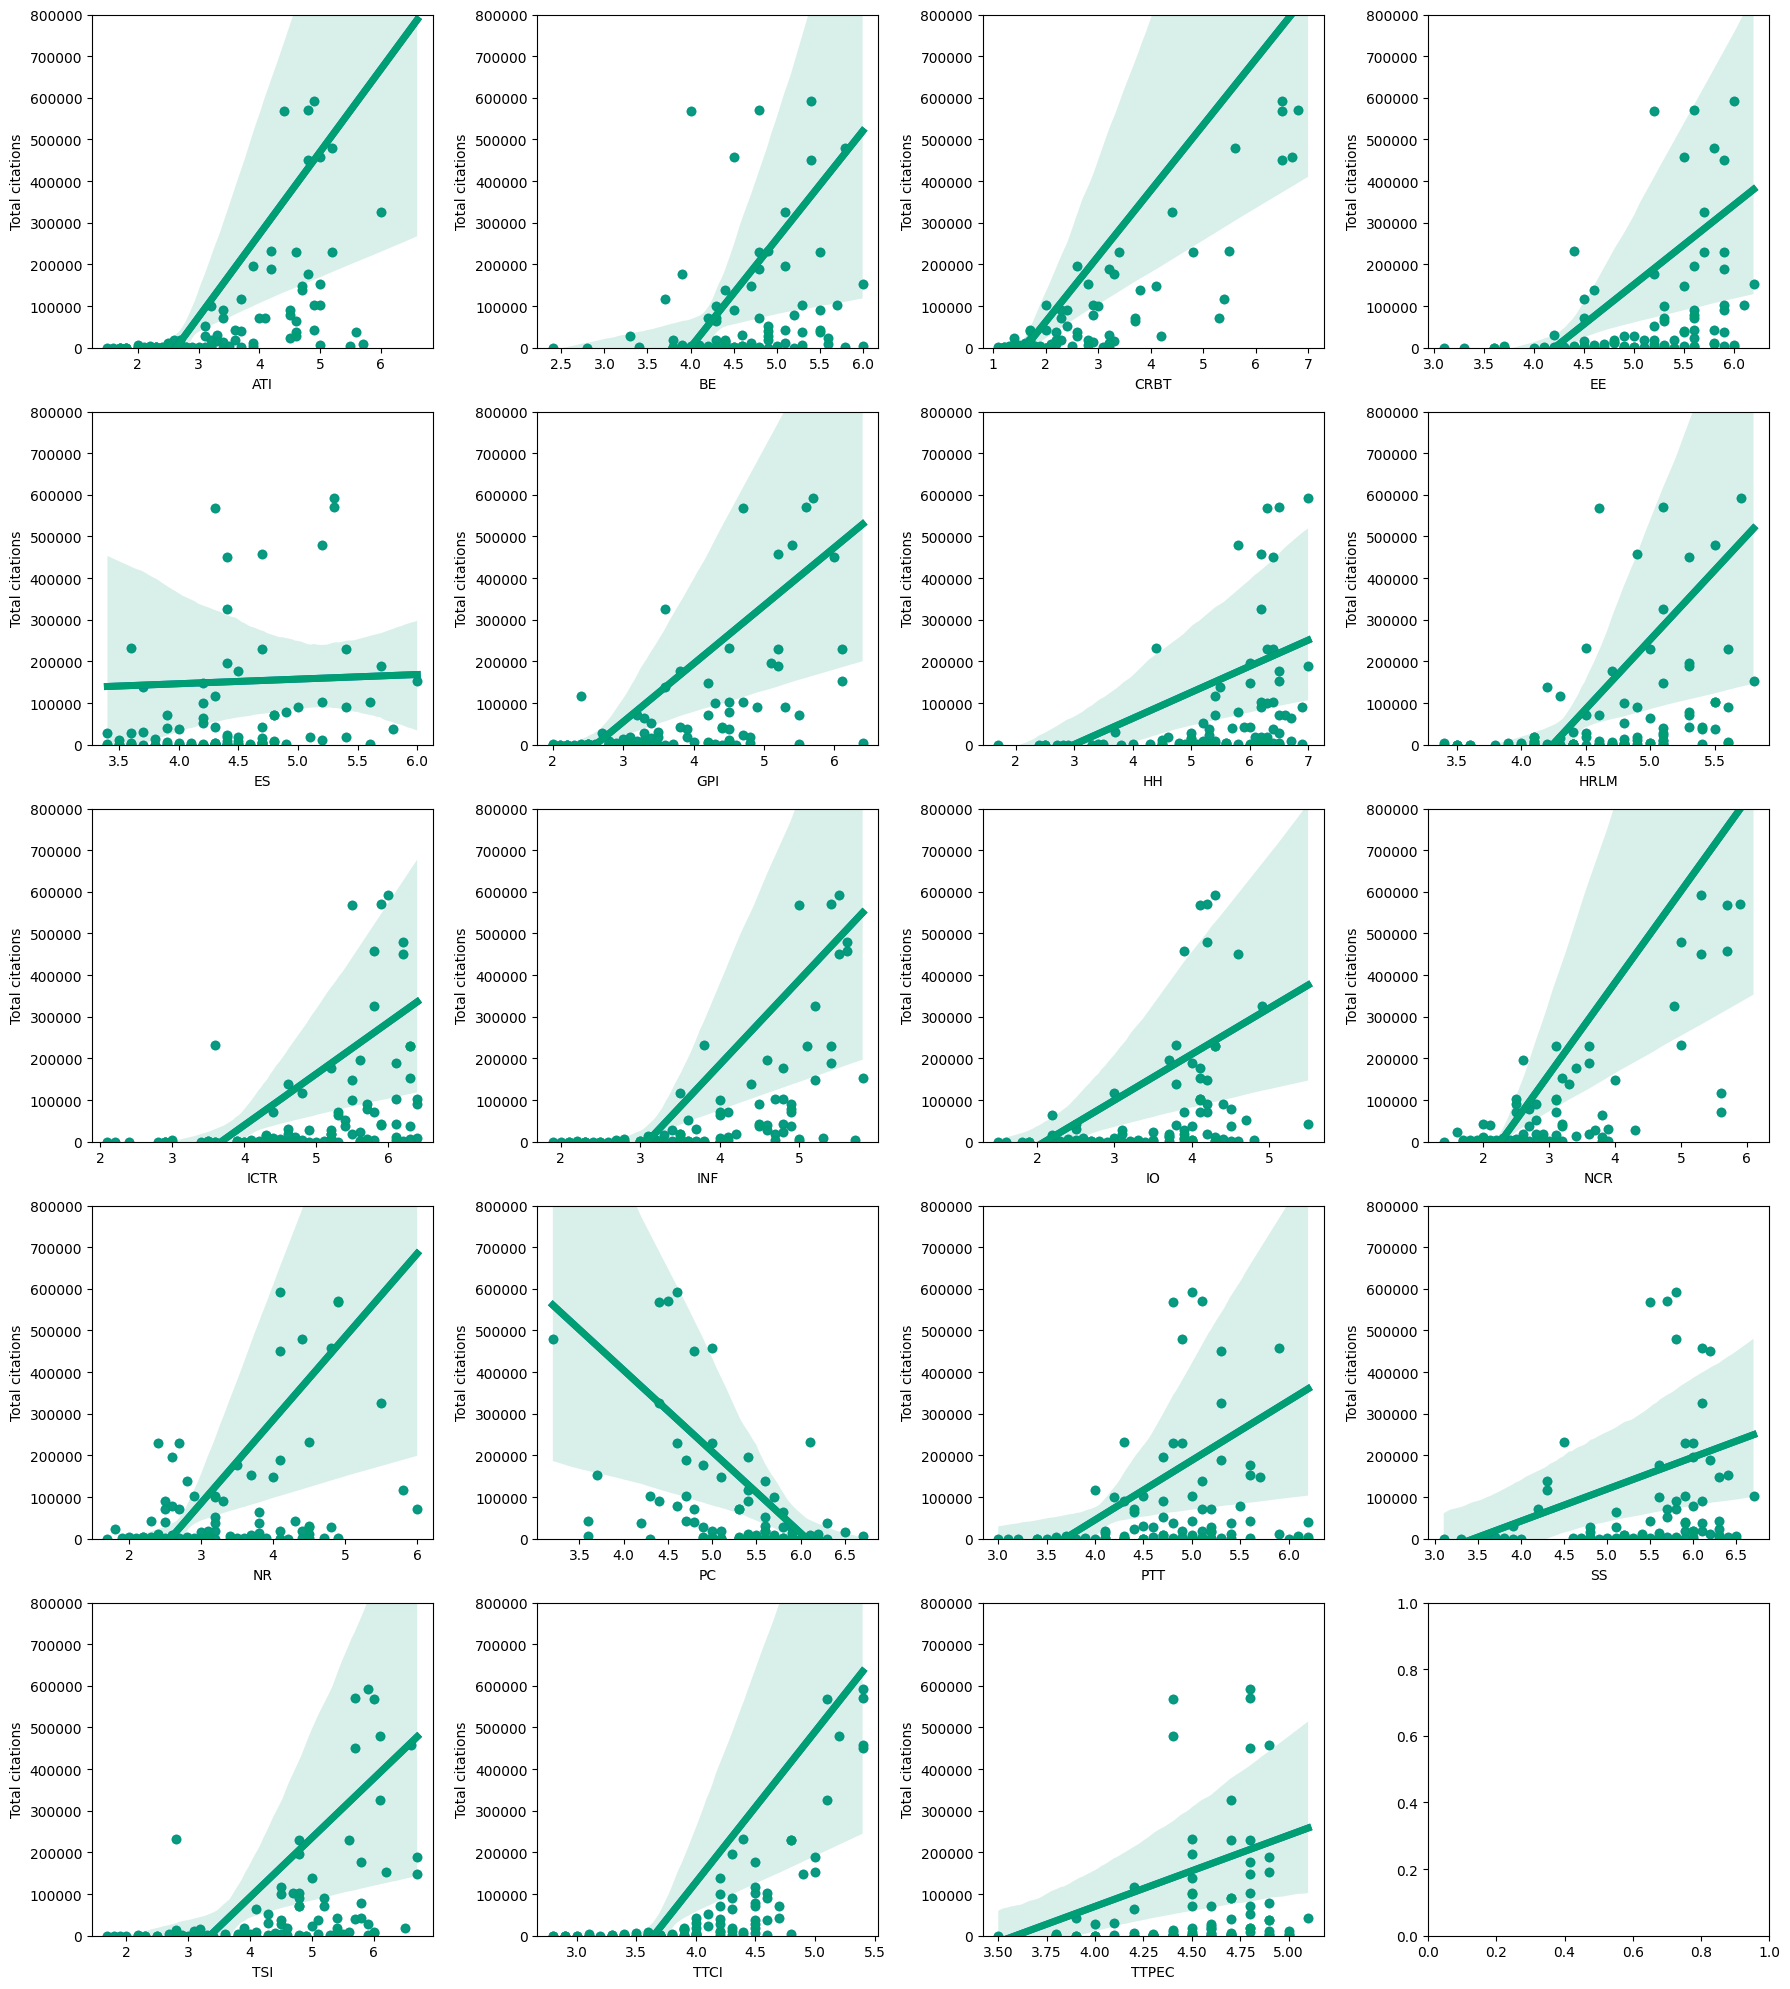

In [112]:
n_rows = int(metrics.__len__() / n_cols)
if metrics.__len__() % 4:
    n_rows += 1

fig,ax = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))

i = 0
j = 0
for metric in metrics:
    sns.regplot(data=_[_['KIND']==metric], x='metric', y='Total Citations', order=1, ci=None, line_kws={'linewidth':5}, label=metric, ax=ax[i][j])
    sns.regplot(data=_[_['KIND']==metric], x='metric', y='Total Citations', order=1, line_kws={'linewidth':5}, label=metric, ax=ax[i][j])
    
    ax[i][j].set_xlabel(metric)
    ax[i][j].set_ylim(0, 8 * 10**5)
    ax[i][j].set_ylabel('Total citations')
    
    j += 1

    if j >= n_cols:
        j = 0
        i += 1

    #if i < n_rows:
    #    if j == 0:
    #        ax[i][j].set_ylabel('Average citations')
    #    else:
    #        ax[i][j].set_ylabel('')
    #        ax[i][j].yaxis.set_visible(False)

plt.tight_layout()
plt.savefig(path_file_export + 'charts/total_cit_vs_country_indexes_with_fit.png')


#### Correlation Heatmaps

In [113]:
df_country_cit_and_turistic_indexes

TTCI   EE   BE   SS   HH  HRLM  ICTR  TTPEC  PTT   IO   PC  \
Country                                                                     
United States   5.3  5.8  5.8  5.6  5.8   5.8   6.0    4.6  5.5  4.0  4.7   
Poland          4.2  5.3  4.3  5.6  6.3   4.8   5.5    4.5  4.2  4.1  5.7   
Austria         5.0  5.9  4.8  6.2  7.0   5.3   6.1    4.9  5.3  4.0  4.7   
France          5.4  5.6  4.8  5.7  6.5   5.1   5.9    4.8  5.1  4.2  4.5   
Portugal        4.9  5.5  4.7  6.3  6.0   5.1   5.5    4.8  5.7  4.2  5.1   
...             ...  ...  ...  ...  ...   ...   ...    ...  ...  ...  ...   
Uganda          3.2  3.7  4.2  4.7  2.5   4.1   3.0    4.3  4.3  3.0  5.7   
Bolivia         3.5  4.2  2.8  5.2  4.8   4.0   4.1    4.2  3.7  3.2  5.5   
Benin           3.0  4.0  4.4  5.4  2.5   4.6   2.9    3.9  3.5  2.9  5.1   
Liechtenstein   NaN  NaN  NaN  NaN  NaN   NaN   NaN    NaN  NaN  NaN  NaN   
Botswana        3.5  4.4  4.9  5.3  3.3   4.3   4.1    4.4  4.8  2.3  6.0   

                ES  INF  ATI  GPI  TSI  NCR   NR  CRBT  AVG Citations  \
Country                                                                 
United States  4.1  5.8  5.9  4.9  6.6  4.9  5.0   4.7     928.368964   
Poland         4.2  4.0  3.2  4.3  4.5  3.1  3.2   3.0     316.003185   
Austria        5.7  5.4  4.2  5.2  6.7  3.6  4.1   3.2     375.994048   
France         5.3  5.4  4.8  5.6  5.7  5.9  4.9   6.8     444.640966   
Portugal       4.2  5.2  4.7  4.2  6.7  4.0  4.0   4.1     290.153696   
...            ...  ...  ...  ...  ...  ...  ...   ...            ...   
Uganda         4.2  2.2  1.7  2.5  2.3  2.6  3.7   1.5      25.000000   
Bolivia        4.2  2.6  2.2  2.1  3.3  3.1  4.1   2.0      76.500000   
Benin          4.3  2.2  1.7  2.3  2.5  2.0  2.9   1.2      12.000000   
Liechtenstein  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN       4.000000   
Botswana       4.3  2.8  2.1  2.8  3.6  2.3  3.4   1.2      15.000000   

               Total Citations  N. of Editions  
Country                                         
United States          7017541            7559  
Poland                   99225             314  
Austria                 189501             504  
France                  570919            1284  
Portugal                149139             514  
...                        ...             ...  
Uganda                      25               1  
Bolivia                    153               2  
Benin                       12               1  
Liechtenstein                4               1  
Botswana                    15               1  

[111 rows x 22 columns]

In [114]:
#column_subset = list(set(df_country_cit_and_turistic_indexes.columns.values.tolist()) - set(["Country", "N. of Editions"]))
#column_subset.sort()

column_subset = ['TTCI', 'EE', 'BE', 'SS', 'HH', 'HRLM', 'ICTR', 'TTPEC',
       'PTT', 'IO', 'PC', 'ES', 'INF', 'ATI', 'GPI', 'TSI', 'NCR', 'NR', 'CRBT',
       'AVG Citations', 'Total Citations']
       
df_country_cit_and_turistic_indexes_col_subset = df_country_cit_and_turistic_indexes[column_subset]

In [115]:
df_country_cit_and_turistic_indexes_col_subset

TTCI   EE   BE   SS   HH  HRLM  ICTR  TTPEC  PTT   IO   PC  \
Country                                                                     
United States   5.3  5.8  5.8  5.6  5.8   5.8   6.0    4.6  5.5  4.0  4.7   
Poland          4.2  5.3  4.3  5.6  6.3   4.8   5.5    4.5  4.2  4.1  5.7   
Austria         5.0  5.9  4.8  6.2  7.0   5.3   6.1    4.9  5.3  4.0  4.7   
France          5.4  5.6  4.8  5.7  6.5   5.1   5.9    4.8  5.1  4.2  4.5   
Portugal        4.9  5.5  4.7  6.3  6.0   5.1   5.5    4.8  5.7  4.2  5.1   
...             ...  ...  ...  ...  ...   ...   ...    ...  ...  ...  ...   
Uganda          3.2  3.7  4.2  4.7  2.5   4.1   3.0    4.3  4.3  3.0  5.7   
Bolivia         3.5  4.2  2.8  5.2  4.8   4.0   4.1    4.2  3.7  3.2  5.5   
Benin           3.0  4.0  4.4  5.4  2.5   4.6   2.9    3.9  3.5  2.9  5.1   
Liechtenstein   NaN  NaN  NaN  NaN  NaN   NaN   NaN    NaN  NaN  NaN  NaN   
Botswana        3.5  4.4  4.9  5.3  3.3   4.3   4.1    4.4  4.8  2.3  6.0   

                ES  INF  ATI  GPI  TSI  NCR   NR  CRBT  AVG Citations  \
Country                                                                 
United States  4.1  5.8  5.9  4.9  6.6  4.9  5.0   4.7     928.368964   
Poland         4.2  4.0  3.2  4.3  4.5  3.1  3.2   3.0     316.003185   
Austria        5.7  5.4  4.2  5.2  6.7  3.6  4.1   3.2     375.994048   
France         5.3  5.4  4.8  5.6  5.7  5.9  4.9   6.8     444.640966   
Portugal       4.2  5.2  4.7  4.2  6.7  4.0  4.0   4.1     290.153696   
...            ...  ...  ...  ...  ...  ...  ...   ...            ...   
Uganda         4.2  2.2  1.7  2.5  2.3  2.6  3.7   1.5      25.000000   
Bolivia        4.2  2.6  2.2  2.1  3.3  3.1  4.1   2.0      76.500000   
Benin          4.3  2.2  1.7  2.3  2.5  2.0  2.9   1.2      12.000000   
Liechtenstein  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN       4.000000   
Botswana       4.3  2.8  2.1  2.8  3.6  2.3  3.4   1.2      15.000000   

               Total Citations  
Country                         
United States          7017541  
Poland                   99225  
Austria                 189501  
France                  570919  
Portugal                149139  
...                        ...  
Uganda                      25  
Bolivia                    153  
Benin                       12  
Liechtenstein                4  
Botswana                    15  

[111 rows x 21 columns]

**Kendall Correlation**

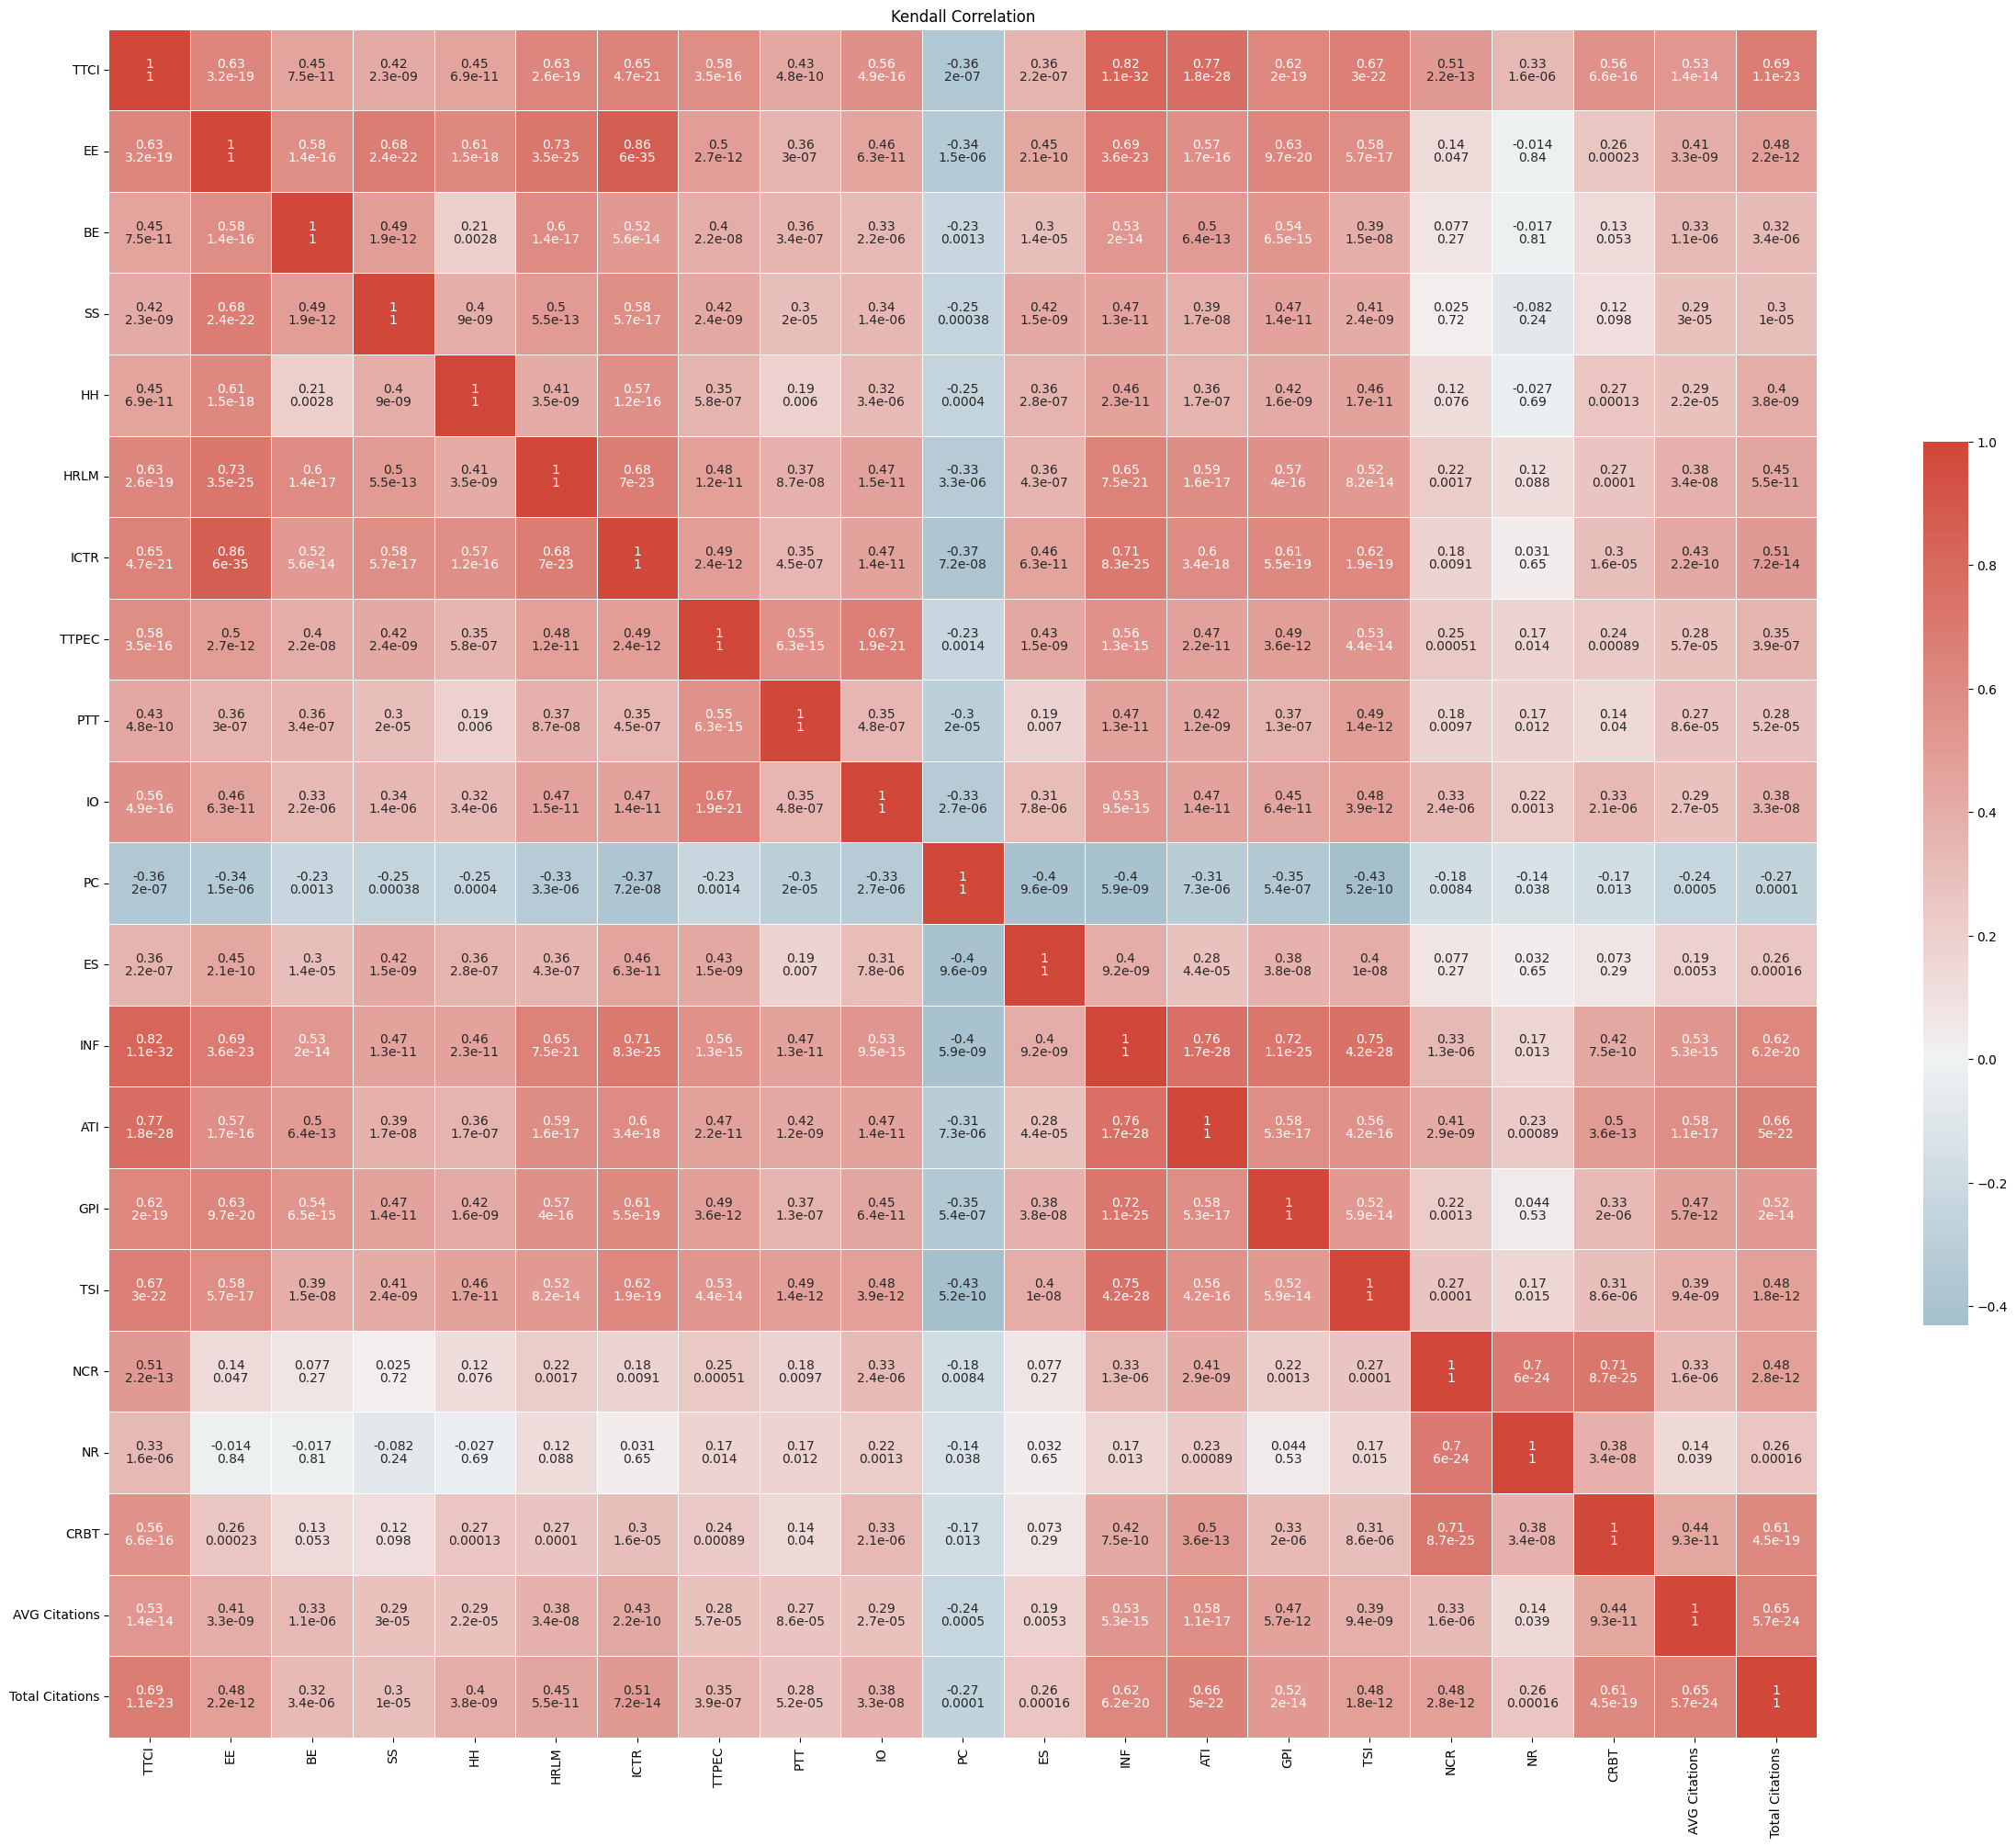

In [116]:
corr_kendall, p_value_kendall = print_correlation_heatmap(df_country_cit_and_turistic_indexes_col_subset, method='kendall', figsize=(30, 25), full_map=True)

**Pearson Correlation**

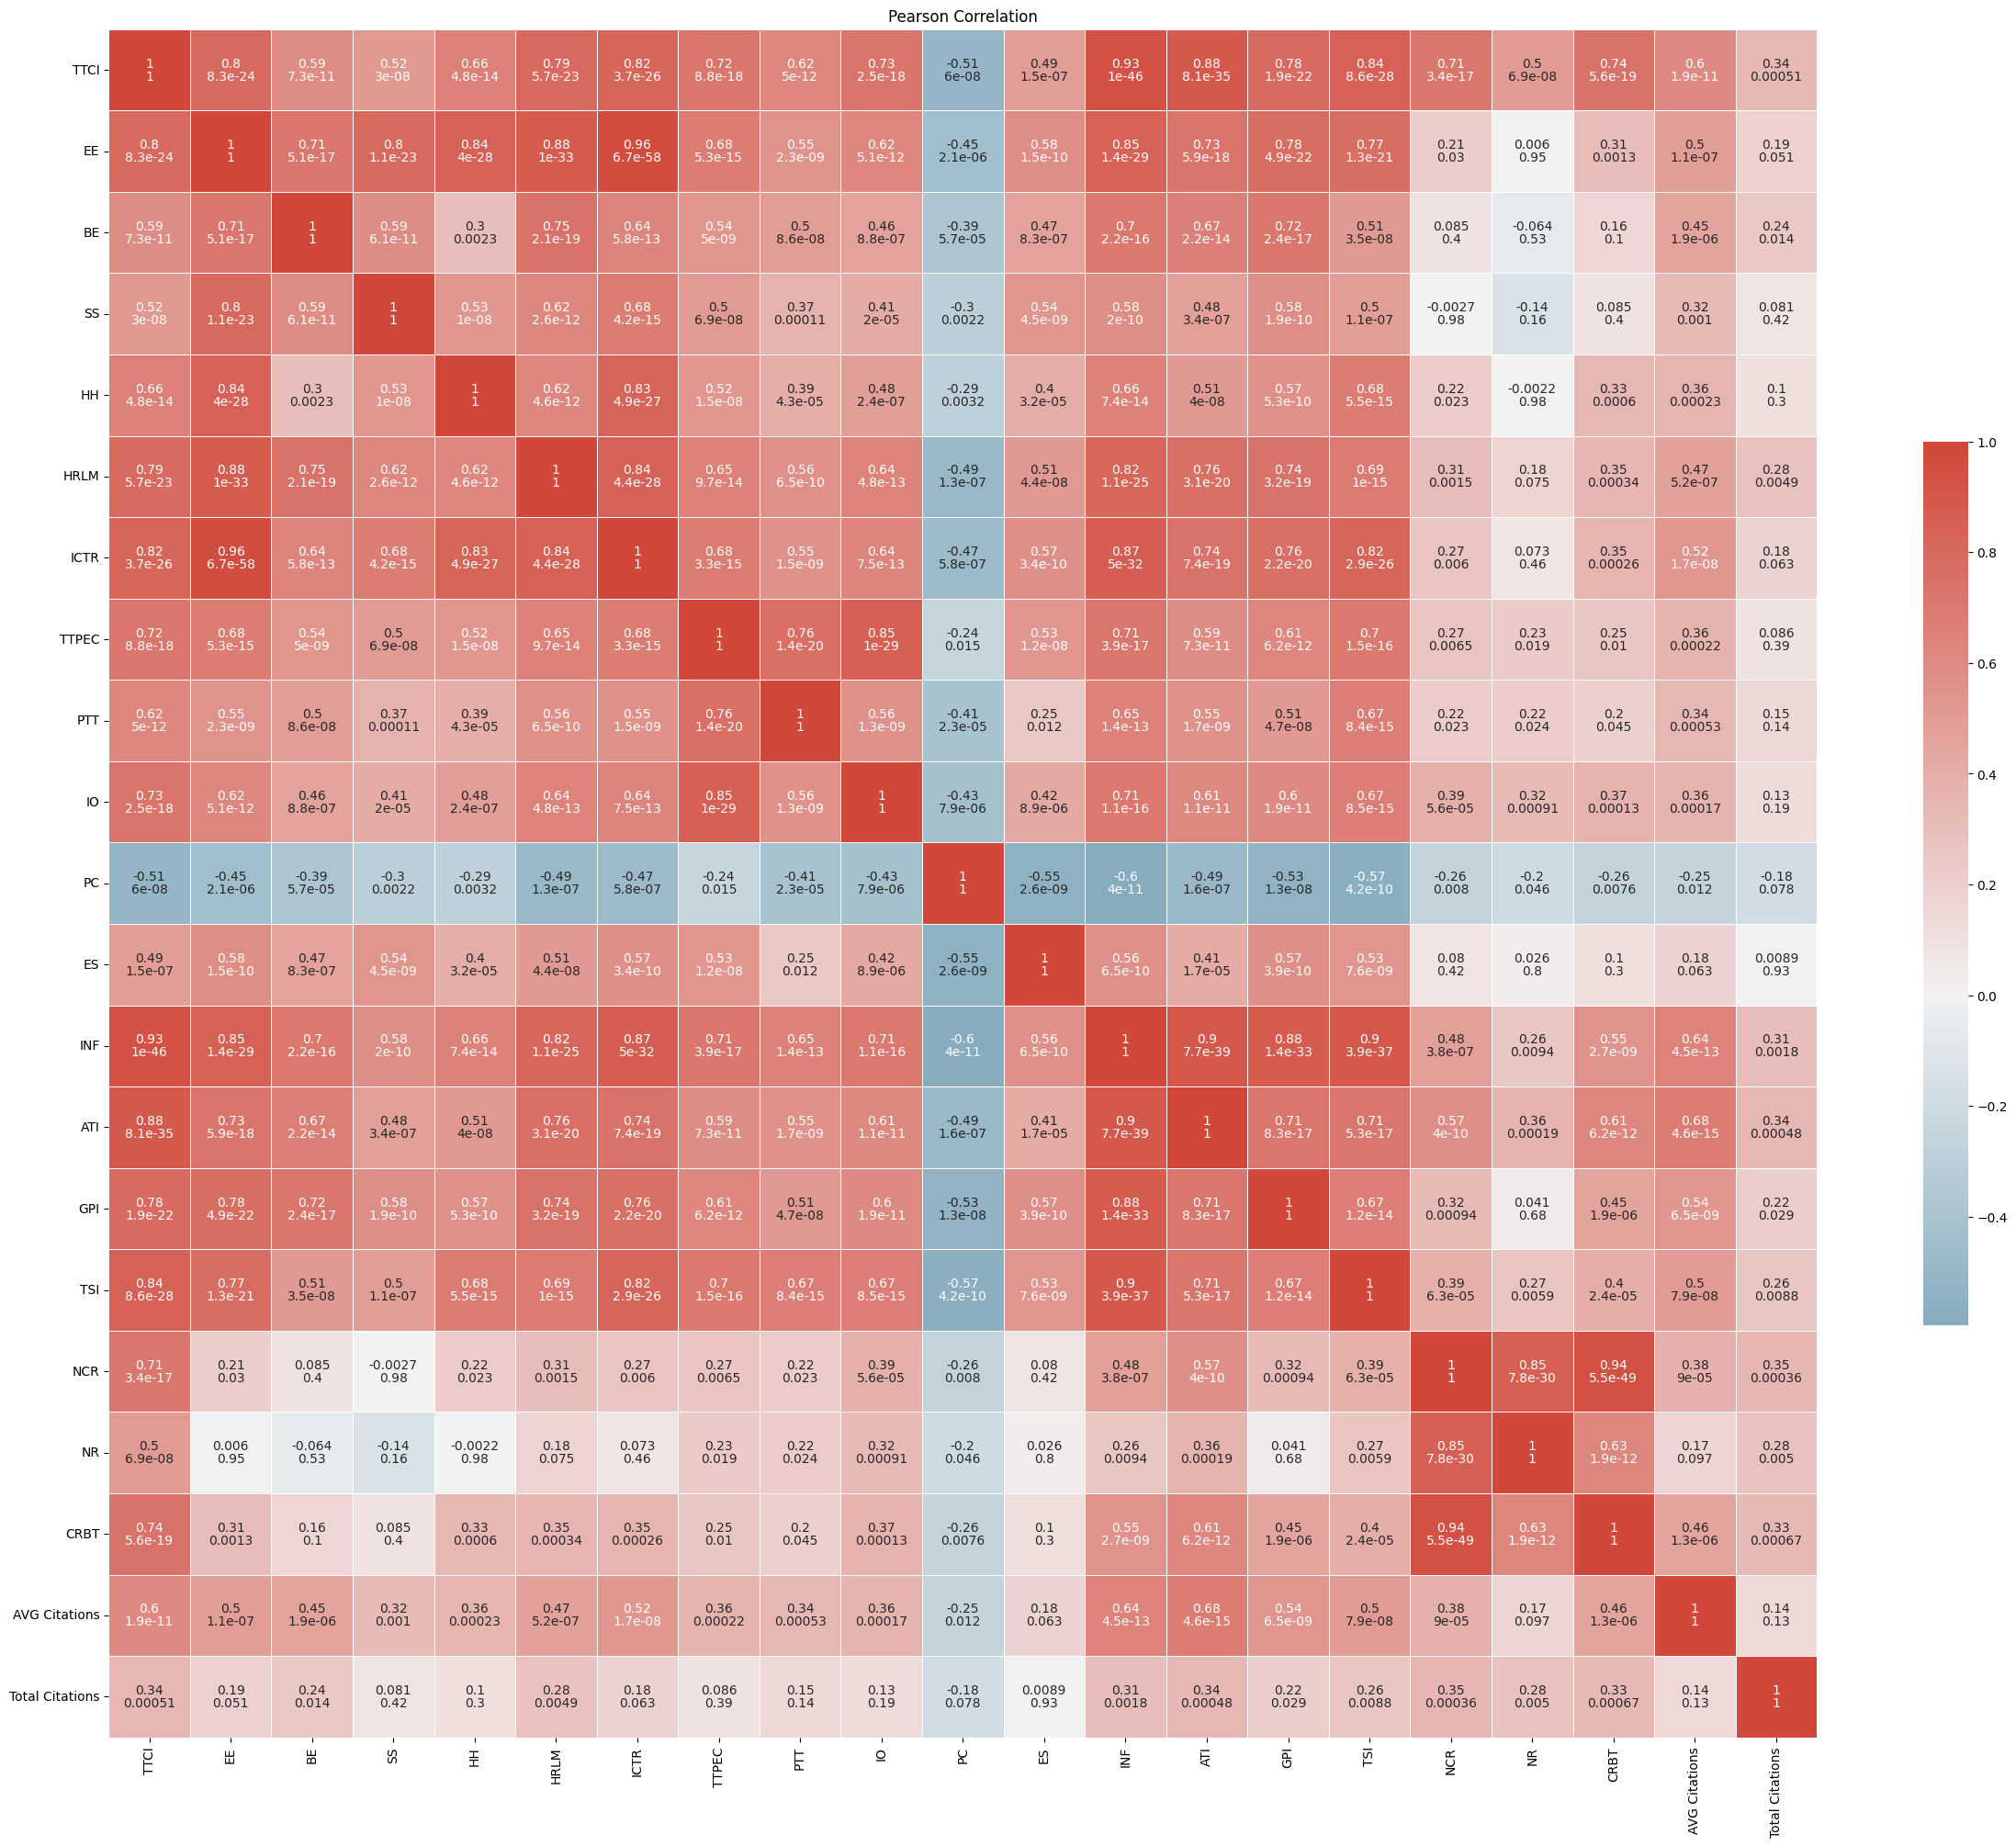

In [117]:
corr_pearson, p_value_pearson = print_correlation_heatmap(df_country_cit_and_turistic_indexes_col_subset, method='pearson', figsize=(30, 25), full_map=True)

**Spearman Correlation**

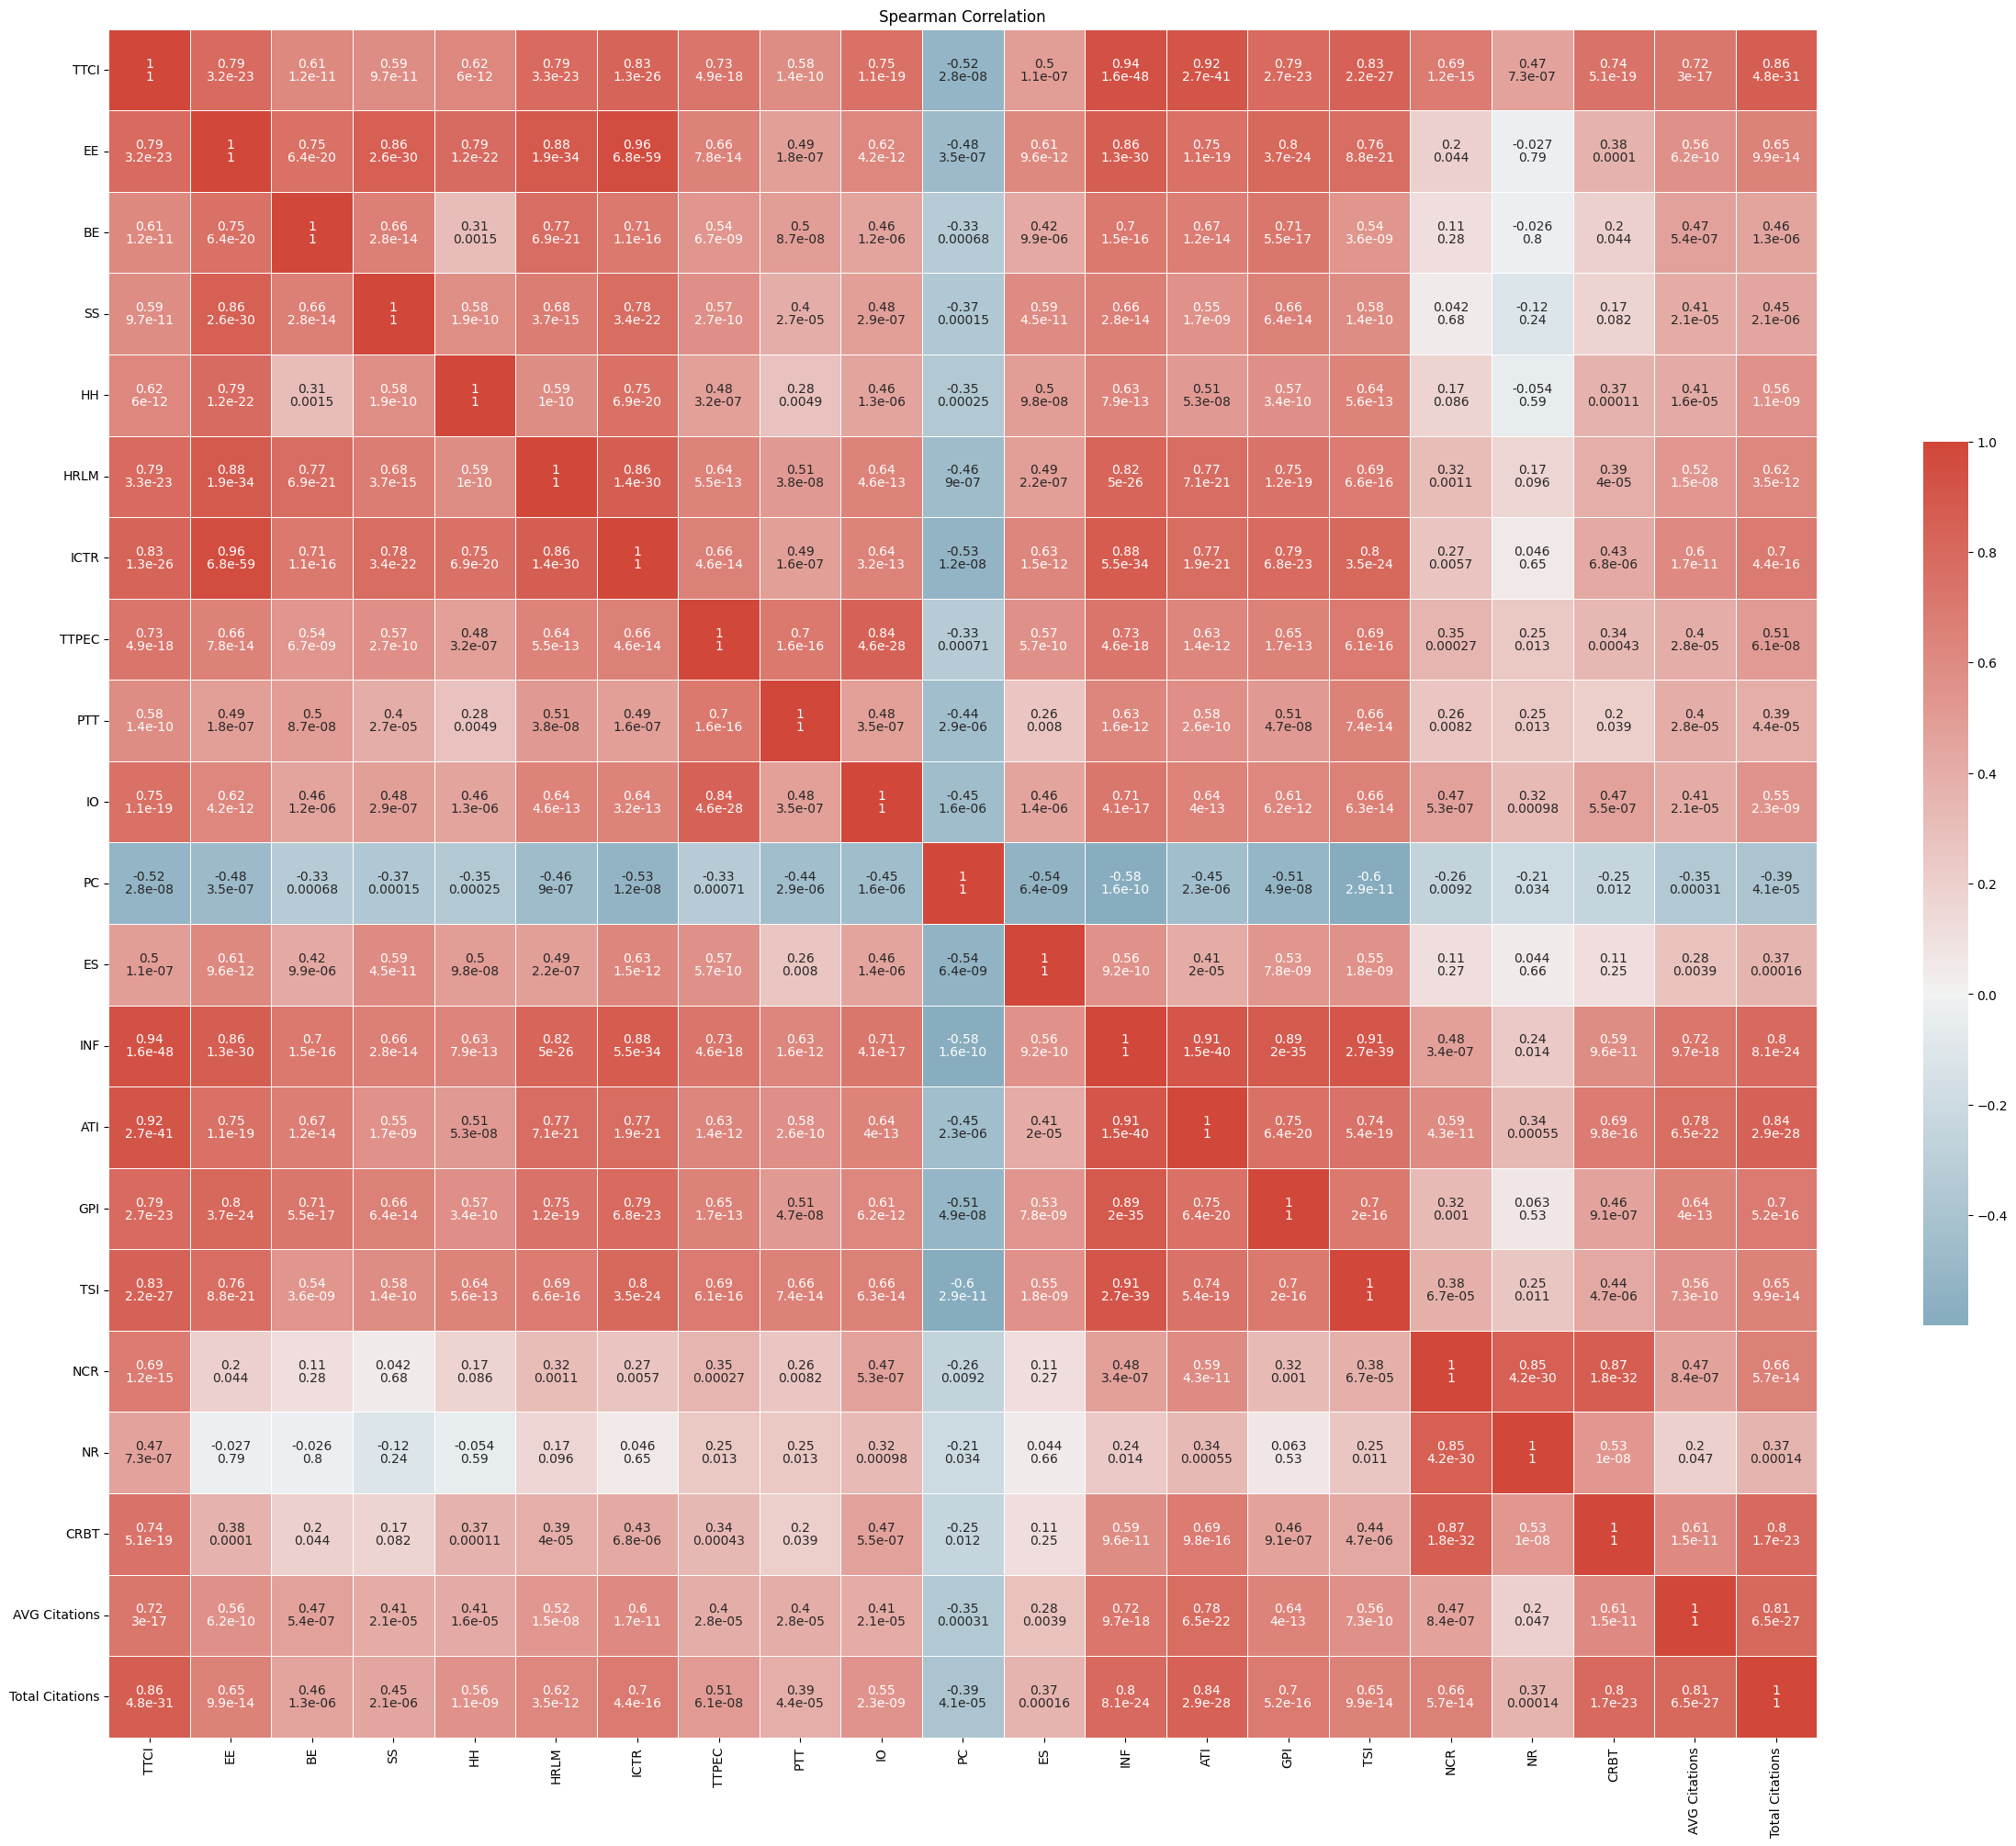

In [118]:
corr_spearman, p_value_spearman = print_correlation_heatmap(df_country_cit_and_turistic_indexes_col_subset, method='spearman', figsize=(30, 25), full_map=True)

**Correlation Summary Plot**

The following plot contains only the relevant information, for a better readability.

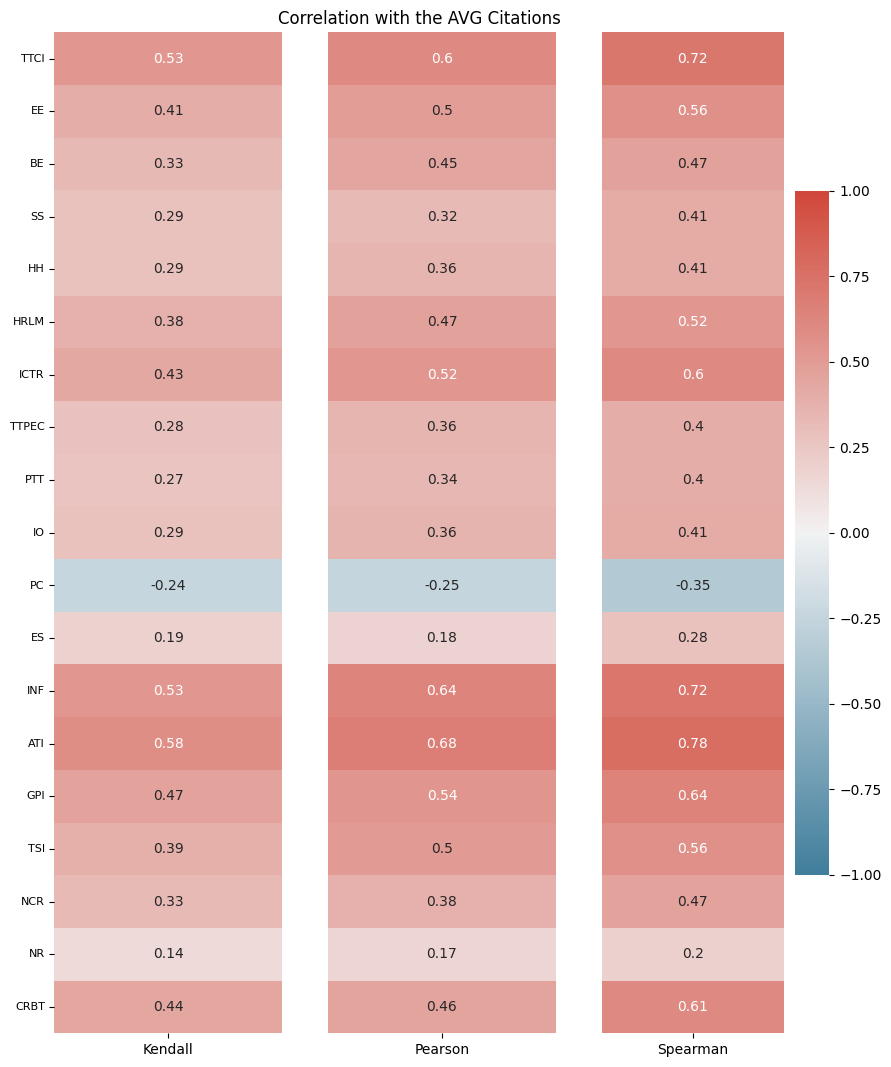

In [119]:
# Correlation values
_s = corr_spearman.rename({'AVG Citations': 'Spearman'}, axis=1)
_k = corr_kendall.rename({'AVG Citations': 'Kendall'}, axis=1)
_p = corr_pearson.rename({'AVG Citations': 'Pearson'}, axis=1)

_p.drop(['AVG Citations', 'Total Citations'], inplace=True)
_s.drop(['AVG Citations', 'Total Citations'], inplace=True)
_k.drop(['AVG Citations', 'Total Citations'], inplace=True)

#Plot
fig, ax = plt.subplots(1,3, figsize=(10, 13))
plt.title("Correlation with the AVG Citations", x=-1)
cmap = sns.diverging_palette(230, 15, as_cmap=True)
g = sns.heatmap(_k[['Kendall']], ax=ax[0], cmap=cmap, cbar=False, vmin=-1, vmax=1, annot=True)
sns.heatmap(_p[['Pearson']], ax=ax[1], cmap=cmap, cbar=False, yticklabels=False, vmin=-1, vmax=1, annot=True)
sns.heatmap(_s[['Spearman']], ax=ax[2], cmap=cmap, yticklabels=False, vmin=-1, vmax=1, annot=True)
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 8)
plt.savefig(path_file_export + 'charts/corr_avg_cit_vs_country_indexes.png')

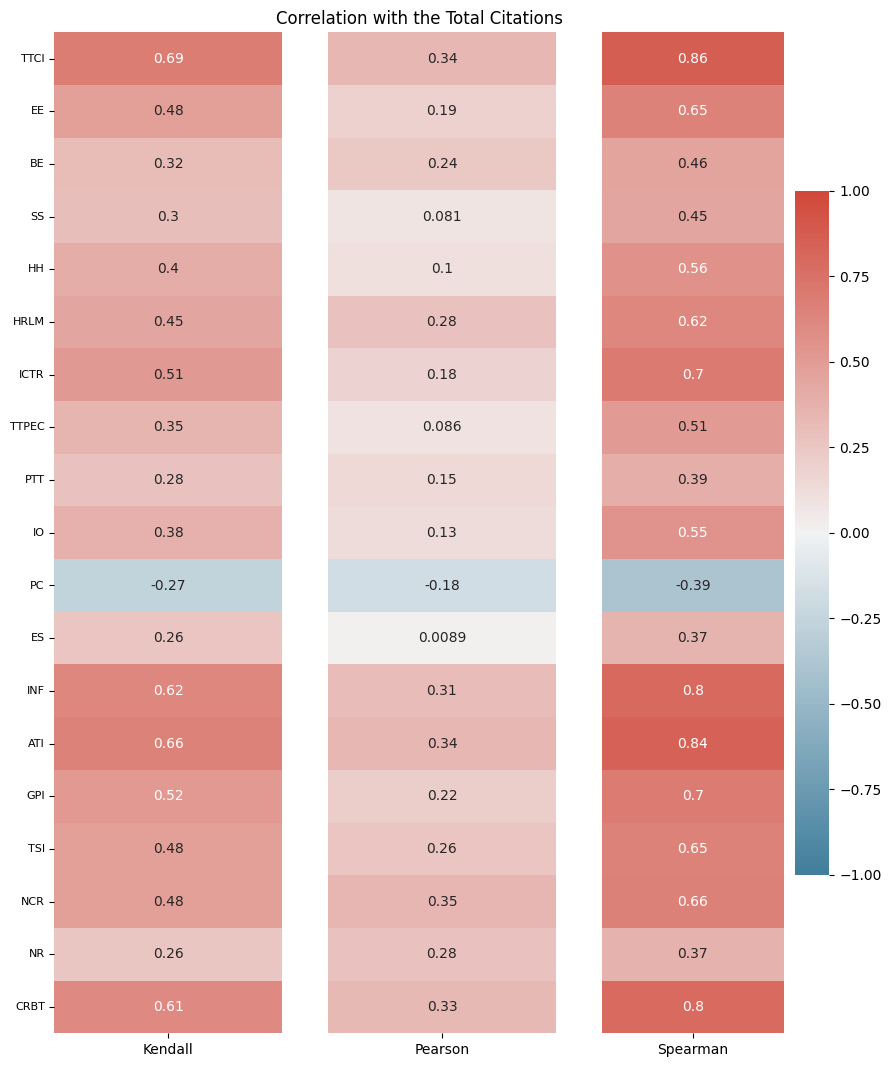

In [120]:
# Correlation values
_s = corr_spearman.rename({'Total Citations': 'Spearman'}, axis=1)
_k = corr_kendall.rename({'Total Citations': 'Kendall'}, axis=1)
_p = corr_pearson.rename({'Total Citations': 'Pearson'}, axis=1)

_p.drop(['AVG Citations', 'Total Citations'], inplace=True)
_s.drop(['AVG Citations', 'Total Citations'], inplace=True)
_k.drop(['AVG Citations', 'Total Citations'], inplace=True)

#Plot
fig, ax = plt.subplots(1,3, figsize=(10, 13))
plt.title("Correlation with the Total Citations", x=-1)
cmap = sns.diverging_palette(230, 15, as_cmap=True)
g = sns.heatmap(_k[['Kendall']], ax=ax[0], cmap=cmap, cbar=False, vmin=-1, vmax=1, annot=True)
sns.heatmap(_p[['Pearson']], ax=ax[1], cmap=cmap, cbar=False, yticklabels=False, vmin=-1, vmax=1, annot=True)
sns.heatmap(_s[['Spearman']], ax=ax[2], cmap=cmap, yticklabels=False, vmin=-1, vmax=1, annot=True)
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 8)
plt.savefig(path_file_export + 'charts/corr_tot_cit_vs_country_indexes.png')

#### AVG Citations vs Countries Tourist Arrivals

**Construction of the Support Structures**

Dataframe filter of the all-NaN columns and normaliziation of the arrivals in the [-1, 1] range:

In [121]:
normalize_values = False

In [122]:
if normalize_values:
    df_country_yearly_tourist_arrivals_transposed = df_country_yearly_tourist_arrivals.set_index("Country").transpose()
    df_country_yearly_tourist_arrivals_transposed = df_country_yearly_tourist_arrivals_transposed.dropna(axis=1, how='all')

    df_country_yearly_tourist_arrivals_transposed = df_country_yearly_tourist_arrivals_transposed.iloc[:,0:-1].apply(lambda x: (x - x.mean()) / (x.max() - x.min()), axis=0)

    df_country_yearly_tourist_arrivals = df_country_yearly_tourist_arrivals_transposed.transpose()
    df_country_yearly_tourist_arrivals = df_country_yearly_tourist_arrivals.reset_index()

    df_country_yearly_tourist_arrivals.head(3)

Reshape of the arrivals dataframe:

In [123]:
start_year = 1995
final_year = 2020

df_country_yearly_tourist_arrivals_reshaped = pd.melt(df_country_yearly_tourist_arrivals, id_vars='Country', value_vars=[str(x) for x in range(start_year, final_year + 1)])
df_country_yearly_tourist_arrivals_reshaped = df_country_yearly_tourist_arrivals_reshaped.rename(columns={"variable": "Year", "value": "Country Tourist Arrival"})
df_country_yearly_tourist_arrivals_reshaped = df_country_yearly_tourist_arrivals_reshaped.dropna()
df_country_yearly_tourist_arrivals_reshaped

Country  Year  Country Tourist Arrival
0             United States  1995                  79732.0
1                    Poland  1995                  82244.0
4                  Portugal  1995                  23066.0
6                     Italy  1995                  55706.0
7            United Kingdom  1995                  23537.0
...                     ...   ...                      ...
3267             Azerbaijan  2020                    796.0
3269              Mauritius  2020                    316.0
3271            El Salvador  2020                    707.0
3272                Bahrain  2020                   1909.0
3273  Saint Kitts and Nevis  2020                    301.4

[2111 rows x 3 columns]

Merge with the single conferences citations dataframe:

In [124]:
# Extraction of the year
df_single_conference_with_loc_and_ta = df_single_conference_with_full_location.copy()
df_single_conference_with_loc_and_ta["Year"] = df_single_conference_with_loc_and_ta["ConferenceNormalizedName"].str.split(" ").str[1]

# Merge and column drop
df_single_conference_with_loc_and_ta = pd.merge(left=df_single_conference_with_loc_and_ta, right=df_country_yearly_tourist_arrivals_reshaped, on=["Country", "Year"], how="right")
df_single_conference_with_loc_and_ta = df_single_conference_with_loc_and_ta.drop(columns=["ConferenceLocation", "N. of Articles", "Country", "Year"])

df_single_conference_with_loc_and_ta.head(3)

ConferenceNormalizedName  Total Citations  AVG Citations  \
0                soda 1995            493.0     164.333333   
1                sosp 1995           2538.0      90.642857   
2            siggraph 1995           7493.0      84.191011   

   Country Tourist Arrival  
0                  79732.0  
1                  79732.0  
2                  79732.0

**Kendall Correlation**

/var/folders/gy/9drryydn41lddmpgtpzzxrgw0000gn/T/ipykernel_49169/533427031.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  computed_corr = df.corr(method=method)
/var/folders/gy/9drryydn41lddmpgtpzzxrgw0000gn/T/ipykernel_49169/533427031.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  p_value = df.corr(method=kendalltau_pval)


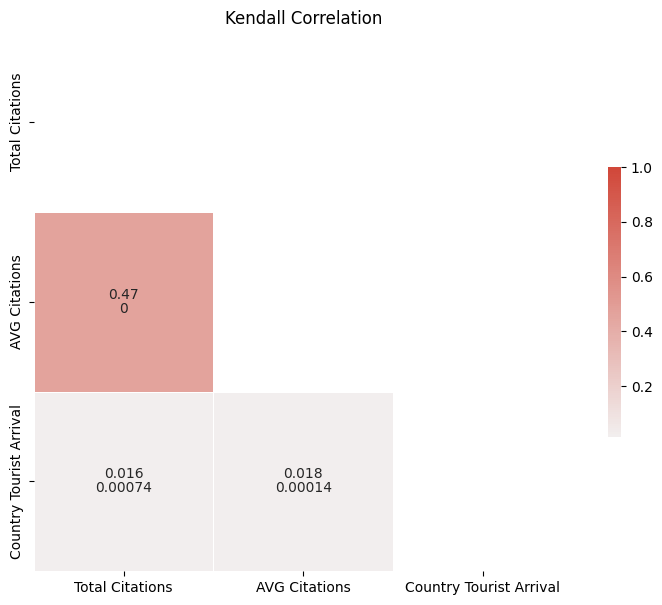

In [125]:
corr_kendall, p_value_kendall = print_correlation_heatmap(df_single_conference_with_loc_and_ta.rename(columns={"Country Tourist Arrival (Normalized)": "Country Tourist Arrival"}), method='kendall')

**Pearson Correlation**

/var/folders/gy/9drryydn41lddmpgtpzzxrgw0000gn/T/ipykernel_49169/533427031.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  computed_corr = df.corr(method=method)
/var/folders/gy/9drryydn41lddmpgtpzzxrgw0000gn/T/ipykernel_49169/533427031.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  p_value = df.corr(method=pearsonr_pval)


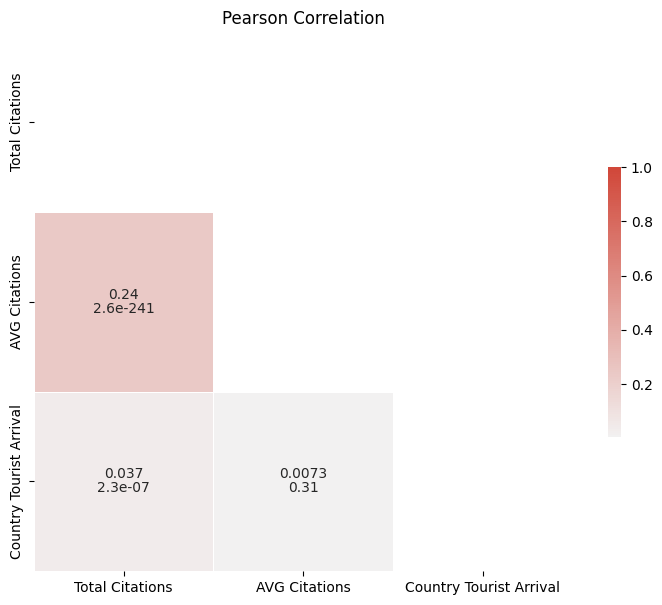

In [126]:
corr_pearson, p_value_pearson = print_correlation_heatmap(df_single_conference_with_loc_and_ta.rename(columns={"Country Tourist Arrival (Normalized)": "Country Tourist Arrival"}), method='pearson')

**Spearman Correlation**

/var/folders/gy/9drryydn41lddmpgtpzzxrgw0000gn/T/ipykernel_49169/533427031.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  computed_corr = df.corr(method=method)
/var/folders/gy/9drryydn41lddmpgtpzzxrgw0000gn/T/ipykernel_49169/533427031.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  p_value = df.corr(method=spearmanr_pval)


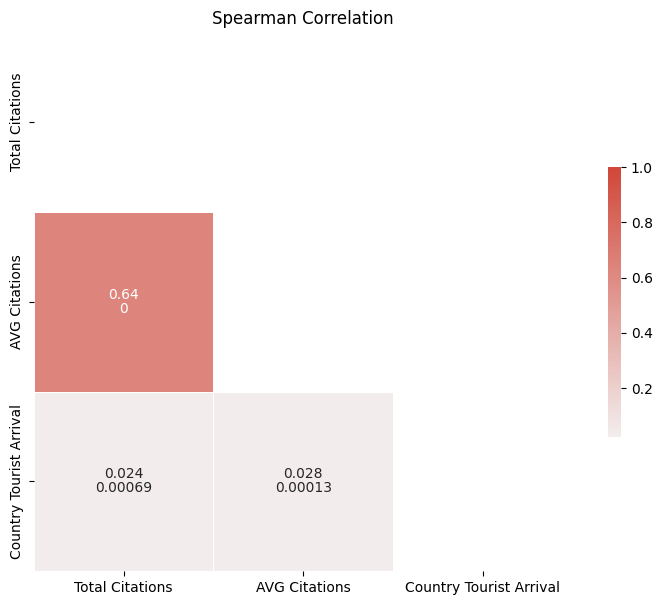

In [127]:
corr_spearman, p_value_spearman = print_correlation_heatmap(df_single_conference_with_loc_and_ta.rename(columns={"Country Tourist Arrival (Normalized)": "Country Tourist Arrival"}), method='spearman')

**Correlation Summary Plot**

The following plot contains only the relevant information, for a better readability.

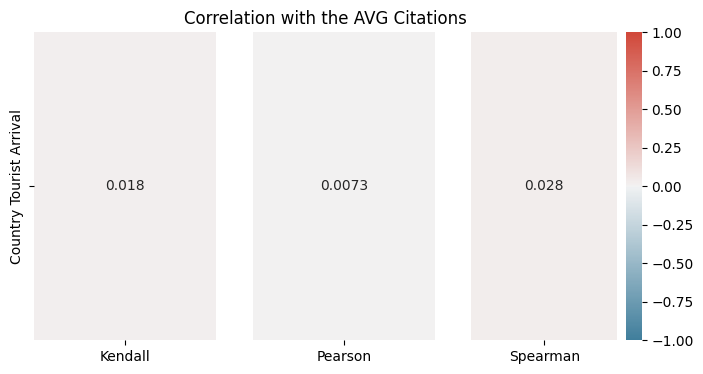

In [128]:
# Correlation values
_s = corr_spearman.rename({'AVG Citations': 'Spearman'}, axis=1)
_k = corr_kendall.rename({'AVG Citations': 'Kendall'}, axis=1)
_p = corr_pearson.rename({'AVG Citations': 'Pearson'}, axis=1)

_p.drop(['AVG Citations', "Total Citations"], inplace=True)
_s.drop(['AVG Citations', "Total Citations"], inplace=True)
_k.drop(['AVG Citations', "Total Citations"], inplace=True)

_p = _p.sort_index(axis=0)
_s = _s.sort_index(axis=0)
_k = _k.sort_index(axis=0)

#Plot
fig, ax = plt.subplots(1,3, figsize=(8,4))
plt.title("Correlation with the AVG Citations", x=-1)
cmap = sns.diverging_palette(230, 15, as_cmap=True)
sns.heatmap(_k[['Kendall']], ax=ax[0], cmap=cmap, cbar=False, vmin=-1, vmax=1, annot=True)
sns.heatmap(_p[['Pearson']], ax=ax[1], cmap=cmap, cbar=False, yticklabels=False, vmin=-1, vmax=1, annot=True)
sns.heatmap(_s[['Spearman']], ax=ax[2], cmap=cmap, yticklabels=False, vmin=-1, vmax=1, annot=True)
plt.savefig(path_file_export + 'charts/corr_avg_cit_vs_country_ta.png')

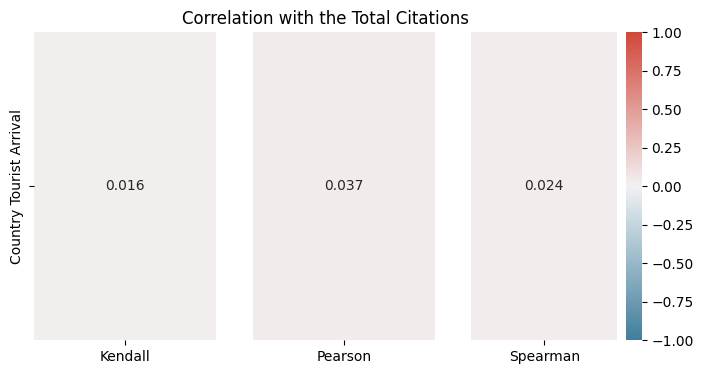

In [129]:
# Correlation values
_s = corr_spearman.rename({'Total Citations': 'Spearman'}, axis=1)
_k = corr_kendall.rename({'Total Citations': 'Kendall'}, axis=1)
_p = corr_pearson.rename({'Total Citations': 'Pearson'}, axis=1)

_p.drop(['AVG Citations', "Total Citations"], inplace=True)
_s.drop(['AVG Citations', "Total Citations"], inplace=True)
_k.drop(['AVG Citations', "Total Citations"], inplace=True)

_p = _p.sort_index(axis=0)
_s = _s.sort_index(axis=0)
_k = _k.sort_index(axis=0)

#Plot
fig, ax = plt.subplots(1,3, figsize=(8,4))
plt.title("Correlation with the Total Citations", x=-1)
cmap = sns.diverging_palette(230, 15, as_cmap=True)
sns.heatmap(_k[['Kendall']], ax=ax[0], cmap=cmap, cbar=False, vmin=-1, vmax=1, annot=True)
sns.heatmap(_p[['Pearson']], ax=ax[1], cmap=cmap, cbar=False, yticklabels=False, vmin=-1, vmax=1, annot=True)
sns.heatmap(_s[['Spearman']], ax=ax[2], cmap=cmap, yticklabels=False, vmin=-1, vmax=1, annot=True)
plt.savefig(path_file_export + 'charts/corr_tot_cit_vs_country_ta.png')

<br>

## Evolution of the Conferences Over the Years

#### Creation of the Support Structures

**Extraction of the City from the Full Citations Dataframe**

In [130]:
df_single_conference_with_city = df_single_conference_with_location.copy()
df_single_conference_with_city["City"] = df_single_conference_with_location['ConferenceLocation'].str.split(', ').str[0]
df_single_conference_with_city["ConferenceSeriesNormalizedName"] = df_single_conference_with_location['ConferenceNormalizedName'].str.split(' ').str[0]
df_single_conference_with_city["Year"] = df_single_conference_with_location['ConferenceNormalizedName'].str.split(' ').str[1]
df_single_conference_with_city

ConferenceNormalizedName  Total Citations  AVG Citations  \
0                    amia 2009             3792    1896.000000   
1                security 2004             1058    1058.000000   
2                    icis 2000              909     909.000000   
3                 neurips 1988             1033     516.500000   
4                 mobicom 2000            13929     497.464286   
...                        ...              ...            ...   
26255                iwec 2016                1       1.000000   
26256              tamoco 2009                1       1.000000   
26257           eurova-ws 2011                1       1.000000   
26258                bled 2005                1       1.000000   
26259              fusion 2016                1       1.000000   

       N. of Articles                        ConferenceLocation  \
0                   2  San Francisco, California, United States   
1                   1      San Diego, California, United States   
2                   1      Brisbane City, Queensland, Australia   
3                   2           Denver, Colorado, United States   
4                  28      Boston, Massachusetts, United States   
...               ...                                       ...   
26255               1                   Vienna, Vienna, Austria   
26256               1                Merida, Extremadura, Spain   
26257               1                            Bergen, Norway   
26258               1                            Bled, Slovenia   
26259               1    Heidelberg, Baden-Württemberg, Germany   

                City ConferenceSeriesNormalizedName  Year  
0      San Francisco                           amia  2009  
1          San Diego                       security  2004  
2      Brisbane City                           icis  2000  
3             Denver                        neurips  1988  
4             Boston                        mobicom  2000  
...              ...                            ...   ...  
26255         Vienna                           iwec  2016  
26256         Merida                         tamoco  2009  
26257         Bergen                      eurova-ws  2011  
26258           Bled                           bled  2005  
26259     Heidelberg                         fusion  2016  

[26260 rows x 8 columns]

**Join with the City Indexes**

In [131]:
# Merge and column drop
df_citations_and_locations_with_city = pd.merge(left=df_single_conference_with_city.drop(columns=["N. of Articles"]), right=df_city_touristic_indexes.drop(columns=["ConferenceLocation"]), on=["City"], how="inner")

#column cleanup
df_citations_and_locations_with_city = df_citations_and_locations_with_city.drop(columns=["ConferenceLocation", "ConferenceNormalizedName", "State", "Country"])

# Filtering incorrect data
df_citations_and_locations_with_city = df_citations_and_locations_with_city[df_citations_and_locations_with_city.Year.apply(lambda x: x.isnumeric())]
df_citations_and_locations_with_city.Year = pd.to_numeric(df_citations_and_locations_with_city["Year"], errors='coerce')
df_citations_and_locations_with_city = df_citations_and_locations_with_city.drop(df_citations_and_locations_with_city[df_citations_and_locations_with_city.Year < 1981].index)

df_citations_and_locations_with_city

Total Citations  AVG Citations                 City  \
0                 3792    1896.000000        San Francisco   
1                  493     164.333333        San Francisco   
2                 4088     151.407407        San Francisco   
3                 3411     106.593750        San Francisco   
4                 2288      99.478261        San Francisco   
...                ...            ...                  ...   
30145               12       1.000000               Handan   
30146                2       1.000000            Chihuahua   
30147                1       1.000000  Kunming Subdistrict   
30148                1       1.000000              Mikulov   
30149                1       1.000000               Merida   

      ConferenceSeriesNormalizedName  Year  N. of Booking Res.  \
0                               amia  2009                2870   
1                               soda  1995                2870   
2                            mobisys  2010                2870   
3                               qels  2000                2870   
4                            mobisys  2003                2870   
...                              ...   ...                 ...   
30145                          grmse  2016                 170   
30146                            enc  2016                 780   
30147                       chinacom  2012                1170   
30148                         memics  2010                1620   
30149                         tamoco  2009                3890   

       N. of Google Res.  N. of Tripadvisor Res.     SWP  Tourist Arrivals  
0             1160000000                    2327  193084               2.9  
1             1160000000                    2327  193084               2.9  
2             1160000000                    2327  193084               2.9  
3             1160000000                    2327  193084               2.9  
4             1160000000                    2327  193084               2.9  
...                  ...                     ...     ...               ...  
30145            9820000                     430   60346               NaN  
30146         1160000000                     750   11360               NaN  
30147             154000                    2500   13001               NaN  
30148            4430000                     280   31221               NaN  
30149          161000000                    4750    9835               NaN  

[30064 rows x 10 columns]

**Creation of the Final Dictionaries**

In [132]:
df_citations_and_swp_reshaped = df_citations_and_locations_with_city.pivot_table(index=["ConferenceSeriesNormalizedName"], columns="Year", values="SWP")
df_citations_and_tripadvisor_reshaped = df_citations_and_locations_with_city.pivot_table(index=["ConferenceSeriesNormalizedName"], columns="Year", values="N. of Booking Res.")
df_citations_and_google_reshaped = df_citations_and_locations_with_city.pivot_table(index=["ConferenceSeriesNormalizedName"], columns="Year", values="N. of Google Res.")
df_citations_and_booking_reshaped = df_citations_and_locations_with_city.pivot_table(index=["ConferenceSeriesNormalizedName"], columns="Year", values="N. of Tripadvisor Res.")

df_citations_and_booking_reshaped

Year                            1981  1982  1983  1984  1985  1986  1987  \
ConferenceSeriesNormalizedName                                             
3dgis                            NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3dic                             NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3dica                            NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3dim                             NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3dimpvt                          NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...                              ...   ...   ...   ...   ...   ...   ...   
xpu                              NaN   NaN   NaN   NaN   NaN   NaN   NaN   
xsede                            NaN   NaN   NaN   NaN   NaN   NaN   NaN   
xsym                             NaN   NaN   NaN   NaN   NaN   NaN   NaN   
zif                              NaN   NaN   NaN   NaN   NaN   NaN   NaN   
zum                              NaN   NaN   NaN   NaN   NaN   NaN   NaN   

Year                            1988    1989  1990  1991    1992  1993  \
ConferenceSeriesNormalizedName                                           
3dgis                            NaN     NaN   NaN   NaN     NaN   NaN   
3dic                             NaN     NaN   NaN   NaN     NaN   NaN   
3dica                            NaN     NaN   NaN   NaN     NaN   NaN   
3dim                             NaN     NaN   NaN   NaN     NaN   NaN   
3dimpvt                          NaN     NaN   NaN   NaN     NaN   NaN   
...                              ...     ...   ...   ...     ...   ...   
xpu                              NaN     NaN   NaN   NaN     NaN   NaN   
xsede                            NaN     NaN   NaN   NaN     NaN   NaN   
xsym                             NaN     NaN   NaN   NaN     NaN   NaN   
zif                              NaN     NaN   NaN   NaN     NaN   NaN   
zum                              NaN  4560.0   NaN   NaN  8394.0   NaN   

Year                              1994    1995  1996    1997    1998    1999  \
ConferenceSeriesNormalizedName                                                 
3dgis                              NaN     NaN   NaN     NaN     NaN     NaN   
3dic                               NaN     NaN   NaN     NaN     NaN     NaN   
3dica                              NaN     NaN   NaN  4900.0  4900.0  4900.0   
3dim                               NaN     NaN   NaN     NaN     NaN     NaN   
3dimpvt                            NaN     NaN   NaN     NaN     NaN     NaN   
...                                ...     ...   ...     ...     ...     ...   
xpu                                NaN     NaN   NaN     NaN     NaN     NaN   
xsede                              NaN     NaN   NaN     NaN     NaN     NaN   
xsym                               NaN     NaN   NaN     NaN     NaN     NaN   
zif                                NaN     NaN   NaN     NaN     NaN     NaN   
zum                             4260.0  2370.0   NaN     NaN   334.0     NaN   

Year                              2000    2001    2002    2003    2004  \
ConferenceSeriesNormalizedName                                           
3dgis                              NaN     NaN     NaN     NaN     NaN   
3dic                               NaN     NaN     NaN     NaN     NaN   
3dica                           4900.0  4900.0  4900.0     NaN  4900.0   
3dim                               NaN     NaN     NaN     NaN     NaN   
3dimpvt                            NaN     NaN     NaN     NaN     NaN   
...                                ...     ...     ...     ...     ...   
xpu                                NaN     NaN  7566.0  1445.0  8640.0   
xsede                              NaN     NaN     NaN     NaN     NaN   
xsym                               NaN     NaN     NaN   334.0   209.0   
zif                                NaN     NaN     NaN     NaN     NaN   
zum                             6790.0     NaN  2610.0  1600.0     NaN   

Year                              2005    20

In [133]:
# SWP
dict_swp_conference = {}
for row, col in df_citations_and_swp_reshaped.iterrows():
    x = {}
    for k, v in col.items():
        if not math.isnan(v):
            x[k] = v
    dict_swp_conference[row] = x

# Tripadvisor
dict_tripadvisor_conference = {}
for row, col in df_citations_and_tripadvisor_reshaped.iterrows():
    x = {}
    for k, v in col.items():
        if not math.isnan(v):
            x[k] = v
    dict_tripadvisor_conference[row] = x

# Booking
dict_booking_conference = {}
for row, col in df_citations_and_booking_reshaped.iterrows():
    x = {}
    for k, v in col.items():
        if not math.isnan(v):
            x[k] = v
    dict_booking_conference[row] = x    

# Google
dict_google_conference = {}
for row, col in df_citations_and_google_reshaped.iterrows():
    x = {}
    for k, v in col.items():
        if not math.isnan(v):
            x[k] = v
    dict_google_conference[row] = x

#### Plots 

**Conferences with the Highest AVG Citations vs SWP Index**

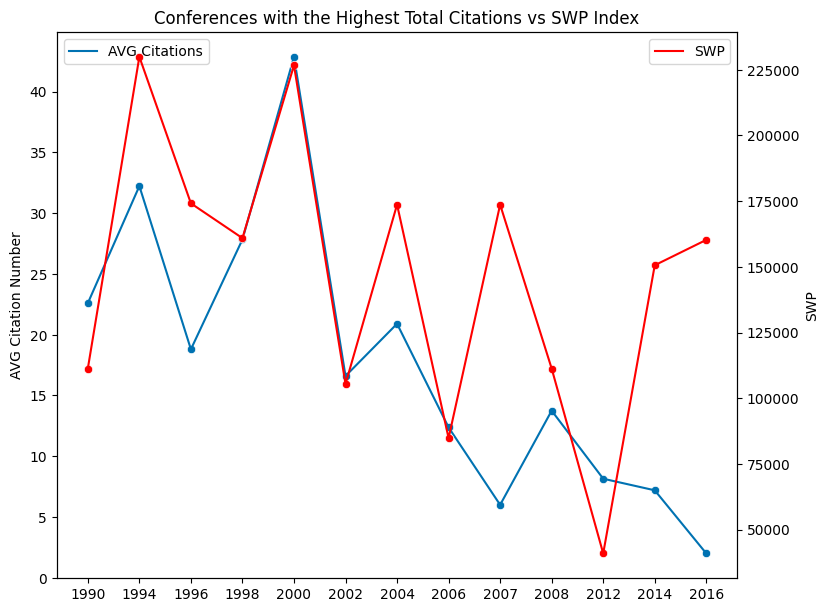

In [135]:
conf_norm_name = "ppsn"

fig, ax = plt.subplots(figsize=(8,6))
ax2 = ax.twinx()

#sns.lineplot(x=list(dict_avg_cit_conference[conf_norm_name].keys()), y=list(dict_avg_cit_conference[conf_norm_name].values()), label="AVG Citations", ax=ax)
#sns.scatterplot(x=list(dict_avg_cit_conference[conf_norm_name].keys()), y=list(dict_avg_cit_conference[conf_norm_name].values()), ax=ax)

dict_avg_cit_conference_without_nans = {k:v for (k, v) in dict_avg_cit_conference[conf_norm_name].items() if not math.isnan(v)}

sns.lineplot(x=list(dict_avg_cit_conference_without_nans.keys()), y=list(dict_avg_cit_conference_without_nans.values()), label="AVG Citations", ax=ax)
sns.scatterplot(x=list(dict_avg_cit_conference_without_nans.keys()), y=list(dict_avg_cit_conference_without_nans.values()), ax=ax)

sns.lineplot(x=ax.get_xticks(), y=list(dict_swp_conference[conf_norm_name].values()), label="SWP", ax=ax2, color="r")
sns.scatterplot(x=ax.get_xticks(), y=list(dict_swp_conference[conf_norm_name].values()), ax=ax2, color="r")

plt.xticks(rotation=75)
plt.tight_layout()
plt.title(f"Conferences with the Highest Total Citations vs SWP Index")
plt.xlabel("Year")
ax.set_ylabel("AVG Citation Number")
ax2.set_ylabel("SWP")
ax.legend(loc=2)
ax2.legend(loc=0)

**Conferences with the Highest AVG Citations vs N. of Tripadvisor Results**

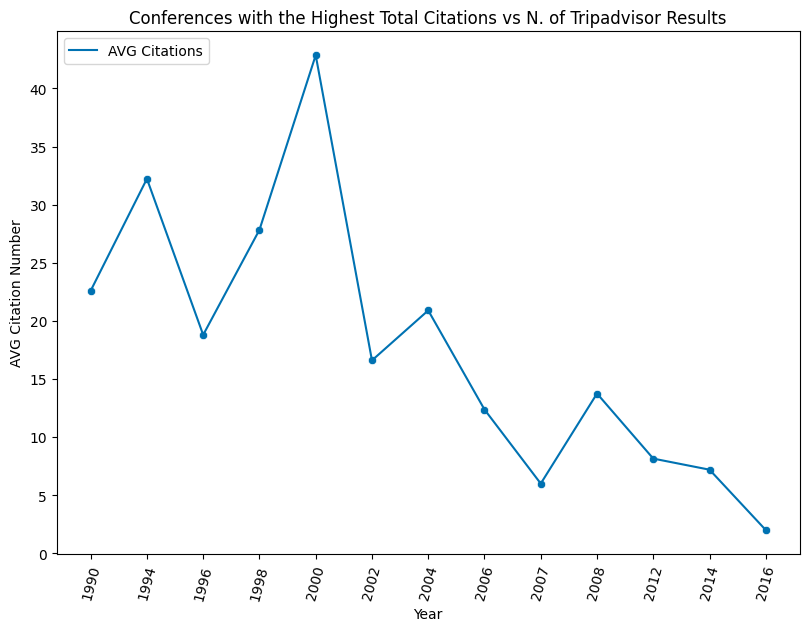

In [136]:
conf_norm_name = "ppsn"

fig, ax = plt.subplots(figsize=(8,6))

#sns.lineplot(x=list(dict_avg_cit_conference[conf_norm_name].keys()), y=list(dict_avg_cit_conference[conf_norm_name].values()), label="AVG Citations", ax=ax)
#sns.scatterplot(x=list(dict_avg_cit_conference[conf_norm_name].keys()), y=list(dict_avg_cit_conference[conf_norm_name].values()), ax=ax)

dict_avg_cit_conference_without_nans = {k:v for (k, v) in dict_avg_cit_conference[conf_norm_name].items() if not math.isnan(v)}

sns.lineplot(x=list(dict_avg_cit_conference_without_nans.keys()), y=list(dict_avg_cit_conference_without_nans.values()), label="AVG Citations", ax=ax)
sns.scatterplot(x=list(dict_avg_cit_conference_without_nans.keys()), y=list(dict_avg_cit_conference_without_nans.values()), ax=ax)

sns.lineplot(x=ax.get_xticks(), y=list(dict_tripadvisor_conference[conf_norm_name].values()), label="N. of Tripadvisor Results", ax=ax2, color="r")
sns.scatterplot(x=ax.get_xticks(), y=list(dict_tripadvisor_conference[conf_norm_name].values()), ax=ax2, color="r")

plt.xticks(rotation=75)
plt.tight_layout()
plt.title(f"Conferences with the Highest Total Citations vs N. of Tripadvisor Results")
plt.xlabel("Year")
ax.set_ylabel("AVG Citation Number")
ax2.set_ylabel("N. of Tripadvisor Results")
ax.legend(loc=2)
ax2.legend(loc=0)

**Conferences with the Highest AVG Citations vs N. of Google Results**

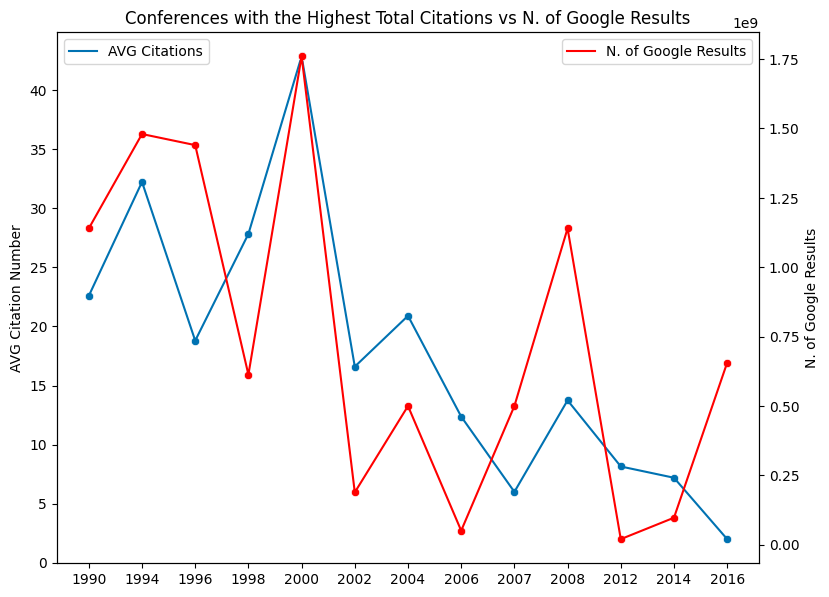

In [137]:
conf_norm_name = "ppsn"

fig, ax = plt.subplots(figsize=(8,6))
ax2 = ax.twinx()

#sns.lineplot(x=list(dict_avg_cit_conference[conf_norm_name].keys()), y=list(dict_avg_cit_conference[conf_norm_name].values()), label="AVG Citations", ax=ax)
#sns.scatterplot(x=list(dict_avg_cit_conference[conf_norm_name].keys()), y=list(dict_avg_cit_conference[conf_norm_name].values()), ax=ax)

dict_avg_cit_conference_without_nans = {k:v for (k, v) in dict_avg_cit_conference[conf_norm_name].items() if not math.isnan(v)}

sns.lineplot(x=list(dict_avg_cit_conference_without_nans.keys()), y=list(dict_avg_cit_conference_without_nans.values()), label="AVG Citations", ax=ax)
sns.scatterplot(x=list(dict_avg_cit_conference_without_nans.keys()), y=list(dict_avg_cit_conference_without_nans.values()), ax=ax)

sns.lineplot(x=ax.get_xticks(), y=list(dict_google_conference[conf_norm_name].values()), label="N. of Google Results", ax=ax2, color="r")
sns.scatterplot(x=ax.get_xticks(), y=list(dict_google_conference[conf_norm_name].values()), ax=ax2, color="r")

plt.xticks(rotation=75)
plt.tight_layout()
plt.title(f"Conferences with the Highest Total Citations vs N. of Google Results")
plt.xlabel("Year")
ax.set_ylabel("AVG Citation Number")
ax2.set_ylabel("N. of Google Results")
ax.legend(loc=2)
ax2.legend(loc=0)

**Conferences with the Highest AVG Citations vs N. of Booking Results**

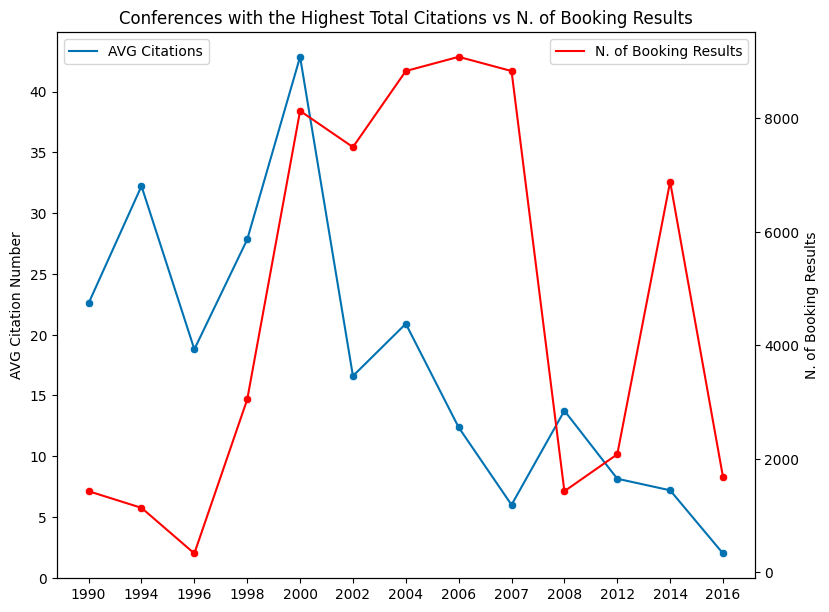

In [138]:
conf_norm_name = "ppsn"

fig, ax = plt.subplots(figsize=(8,6))
ax2 = ax.twinx()

#sns.lineplot(x=list(dict_avg_cit_conference[conf_norm_name].keys()), y=list(dict_avg_cit_conference[conf_norm_name].values()), label="AVG Citations", ax=ax)
#sns.scatterplot(x=list(dict_avg_cit_conference[conf_norm_name].keys()), y=list(dict_avg_cit_conference[conf_norm_name].values()), ax=ax)

dict_avg_cit_conference_without_nans = {k:v for (k, v) in dict_avg_cit_conference[conf_norm_name].items() if not math.isnan(v)}

sns.lineplot(x=list(dict_avg_cit_conference_without_nans.keys()), y=list(dict_avg_cit_conference_without_nans.values()), label="AVG Citations", ax=ax)
sns.scatterplot(x=list(dict_avg_cit_conference_without_nans.keys()), y=list(dict_avg_cit_conference_without_nans.values()), ax=ax)

sns.lineplot(x=ax.get_xticks(), y=list(dict_booking_conference[conf_norm_name].values()), label="N. of Booking Results", ax=ax2, color="r")
sns.scatterplot(x=ax.get_xticks(), y=list(dict_booking_conference[conf_norm_name].values()), ax=ax2, color="r")

plt.xticks(rotation=75)
plt.tight_layout()
plt.title(f"Conferences with the Highest Total Citations vs N. of Booking Results")
plt.xlabel("Year")
ax.set_ylabel("AVG Citation Number")
ax2.set_ylabel("N. of Booking Results")
ax.legend(loc=2)
ax2.legend(loc=0)

<br>

## Study of the Correlations Over Specific Classes of Conferences

For this part of the stury, we're going to restrinct our analysis to specific classes of conferences using the conferences ranking metrics that we introduced above. Are there any differences in the correlation values between specific classes of conferences?

#### Creation of the Support Strcutures for the City Indexes

**Join Between the Conference Ranking Data and the City Indexes**

In [139]:
df_conference_with_grin_rank_reindexed = df_conference_with_grin_rank.reset_index(level=0)
df_conference_with_grin_rank_reindexed = df_conference_with_grin_rank_reindexed.rename(columns={"index": "ConferenceSeriesNormalizedName"})

In [140]:
df_single_conference_reindexed_tmp = df_single_conference_reindexed.copy()
df_single_conference_reindexed_tmp["ConferenceSeriesNormalizedName"] = df_single_conference_reindexed['ConferenceNormalizedName'].str.split(' ').str[0]

In [141]:
df_single_conf_and_grin = pd.merge(left=df_single_conference_reindexed_tmp, right=df_conference_with_grin_rank_reindexed.drop(columns=["Total Citations", "AVG Citations", "N. of Articles", "GrinRating"]), on=["ConferenceSeriesNormalizedName"], how="right")
df_single_conf_and_grin

ConferenceNormalizedName  Total Citations  AVG Citations  N. of Articles  \
0                neurips 1988             1033     516.500000               2   
1                   amia 2009             3792    1896.000000               2   
2                   amia 2006               29      29.000000               1   
3                   amia 1998               10      10.000000               1   
4                   amia 2008               24       8.000000               3   
...                       ...              ...            ...             ...   
8611                 edm 2014              113       2.215686              51   
8612                 edm 2016              165       2.142857              77   
8613                 edm 2017               75       1.923077              39   
8614                 edm 2012                4       1.333333               3   
8615               icwsm 2011                2       2.000000               1   

     ConferenceSeriesNormalizedName  GrinClass  
0                           neurips        1.0  
1                              amia        2.0  
2                              amia        2.0  
3                              amia        2.0  
4                              amia        2.0  
...                             ...        ...  
8611                            edm        3.0  
8612                            edm        3.0  
8613                            edm        3.0  
8614                            edm        3.0  
8615                          icwsm        2.0  

[8616 rows x 6 columns]

**Creation of the Subsets for the City Data**

In [142]:
df_single_conf_grin_first_class = df_single_conf_and_grin[df_single_conf_and_grin["GrinClass"] == 1.0].drop(columns=["GrinClass"])
df_single_conf_grin_second_class  = df_single_conf_and_grin[df_single_conf_and_grin["GrinClass"] == 2.0].drop(columns=["GrinClass"])
df_single_conf_grin_third_class  = df_single_conf_and_grin[df_single_conf_and_grin["GrinClass"] == 3.0].drop(columns=["GrinClass"])

df_single_conf_grin_unclassified  = df_single_conference_reindexed_tmp.copy()
df_single_conf_grin_unclassified = pd.concat([df_single_conf_grin_unclassified, df_single_conf_grin_first_class]).drop_duplicates(keep=False)
df_single_conf_grin_unclassified = pd.concat([df_single_conf_grin_unclassified, df_single_conf_grin_second_class]).drop_duplicates(keep=False)
df_single_conf_grin_unclassified = pd.concat([df_single_conf_grin_unclassified, df_single_conf_grin_third_class]).drop_duplicates(keep=False)

In [143]:
df_single_conf_grin_first_class = pd.merge(left=df_single_conf_grin_first_class, right=df_conf_and_locations, on="ConferenceNormalizedName")
df_single_conf_grin_second_class = pd.merge(left=df_single_conf_grin_second_class, right=df_conf_and_locations, on="ConferenceNormalizedName")
df_single_conf_grin_third_class = pd.merge(left=df_single_conf_grin_third_class, right=df_conf_and_locations, on="ConferenceNormalizedName")
df_single_conf_grin_unclassified = pd.merge(left=df_single_conf_grin_unclassified, right=df_conf_and_locations, on="ConferenceNormalizedName")

**Creation of the Final Dataframe for the City Data**

In [144]:
# First Class
df_city_cit_and_turistic_indexes_grin_first_class = pd.merge(left=df_city_touristic_indexes, right=df_single_conf_grin_first_class.drop(columns=["ConferenceNormalizedName", "ConferenceSeriesNormalizedName"]), on="ConferenceLocation")
df_city_cit_and_turistic_indexes_grin_first_class = df_city_cit_and_turistic_indexes_grin_first_class.set_index("ConferenceLocation")
df_city_cit_and_turistic_indexes_grin_first_class = df_city_cit_and_turistic_indexes_grin_first_class.reindex(sorted(df_city_cit_and_turistic_indexes_grin_first_class.columns), axis=1)

In [145]:
# Second Class
df_city_cit_and_turistic_indexes_grin_second_class = pd.merge(left=df_city_touristic_indexes, right=df_single_conf_grin_second_class.drop(columns=["ConferenceNormalizedName", "ConferenceSeriesNormalizedName"]), on="ConferenceLocation")
df_city_cit_and_turistic_indexes_grin_second_class = df_city_cit_and_turistic_indexes_grin_second_class.set_index("ConferenceLocation")
df_city_cit_and_turistic_indexes_grin_second_class = df_city_cit_and_turistic_indexes_grin_second_class.reindex(sorted(df_city_cit_and_turistic_indexes_grin_second_class.columns), axis=1)

In [146]:
# Third Class
df_city_cit_and_turistic_indexes_grin_third_class = pd.merge(left=df_city_touristic_indexes, right=df_single_conf_grin_third_class.drop(columns=["ConferenceNormalizedName", "ConferenceSeriesNormalizedName"]), on="ConferenceLocation")
df_city_cit_and_turistic_indexes_grin_third_class = df_city_cit_and_turistic_indexes_grin_third_class.set_index("ConferenceLocation")
df_city_cit_and_turistic_indexes_grin_third_class = df_city_cit_and_turistic_indexes_grin_third_class.reindex(sorted(df_city_cit_and_turistic_indexes_grin_third_class.columns), axis=1)

In [147]:
# Unclassified 

df_city_cit_and_turistic_indexes_grin_unclassified = pd.merge(left=df_city_touristic_indexes, right=df_single_conf_grin_unclassified.drop(columns=["ConferenceNormalizedName", "ConferenceSeriesNormalizedName"]), on="ConferenceLocation")
df_city_cit_and_turistic_indexes_grin_unclassified = df_city_cit_and_turistic_indexes_grin_unclassified.set_index("ConferenceLocation")
df_city_cit_and_turistic_indexes_grin_unclassified = df_city_cit_and_turistic_indexes_grin_unclassified.reindex(sorted(df_city_cit_and_turistic_indexes_grin_unclassified.columns), axis=1)

#### Correlation Plots for the City Indexes vs AVG Citations

In [148]:
corr_kendall_grin_first_class, p_value_kendall_grin_first_class = compute_correlation(df_city_cit_and_turistic_indexes_grin_first_class, method='kendall')
corr_kendall_grin_second_class, p_value_kendall_grin_second_class = compute_correlation(df_city_cit_and_turistic_indexes_grin_second_class, method='kendall')
corr_kendall_grin_third_class, p_value_kendall_grin_third_class = compute_correlation(df_city_cit_and_turistic_indexes_grin_third_class, method='kendall')

/var/folders/gy/9drryydn41lddmpgtpzzxrgw0000gn/T/ipykernel_49169/533427031.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  computed_corr = df.corr(method=method)
/var/folders/gy/9drryydn41lddmpgtpzzxrgw0000gn/T/ipykernel_49169/533427031.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  p_value = df.corr(method=kendalltau_pval)


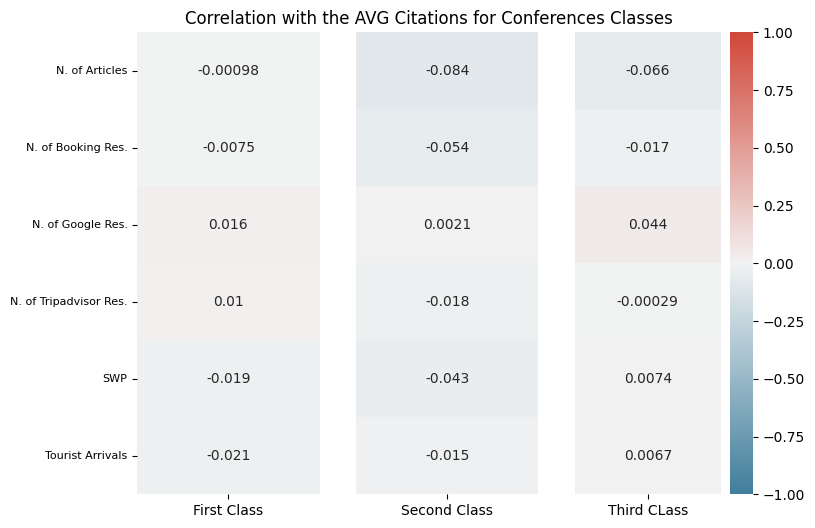

In [149]:
# Correlation values
_k_first = corr_kendall_grin_first_class.rename({'AVG Citations': 'First Class'}, axis=1)
_k_second = corr_kendall_grin_second_class.rename({'AVG Citations': 'Second Class'}, axis=1)
_k_third = corr_kendall_grin_third_class.rename({'AVG Citations': 'Third CLass'}, axis=1)

_k_first.drop(['AVG Citations', 'Total Citations'], inplace=True)
_k_second.drop(['AVG Citations', 'Total Citations'], inplace=True)
_k_third.drop(['AVG Citations', 'Total Citations'], inplace=True)

_k_first = _k_first.sort_index(axis=0)
_k_second = _k_second.sort_index(axis=0)
_k_third = _k_third.sort_index(axis=0)

#Plot
fig, ax = plt.subplots(1,3, figsize=(8,6))
plt.title("Correlation with the AVG Citations for Conferences Classes", x=-1)
cmap = sns.diverging_palette(230, 15, as_cmap=True)
g = sns.heatmap(_k_first[['First Class']], ax=ax[0], cmap=cmap, cbar=False, vmin=-1, vmax=1, annot=True)
sns.heatmap(_k_second[['Second Class']], ax=ax[1], cmap=cmap, cbar=False, yticklabels=False, vmin=-1, vmax=1, annot=True)
sns.heatmap(_k_third[['Third CLass']], ax=ax[2], cmap=cmap, yticklabels=False, vmin=-1, vmax=1, annot=True)
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 8)
plt.savefig(path_file_export + 'charts/corr_avg_cit_vs_city_indexes_for_classes.png')

Same graph as above but adding a "column" for the whole dataset:

In [150]:
corr_kendall_all_conf, p_value_kendall_all_conf = compute_correlation(df_city_cit_and_turistic_indexes, method='kendall')

/var/folders/gy/9drryydn41lddmpgtpzzxrgw0000gn/T/ipykernel_49169/533427031.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  computed_corr = df.corr(method=method)
/var/folders/gy/9drryydn41lddmpgtpzzxrgw0000gn/T/ipykernel_49169/533427031.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  p_value = df.corr(method=kendalltau_pval)


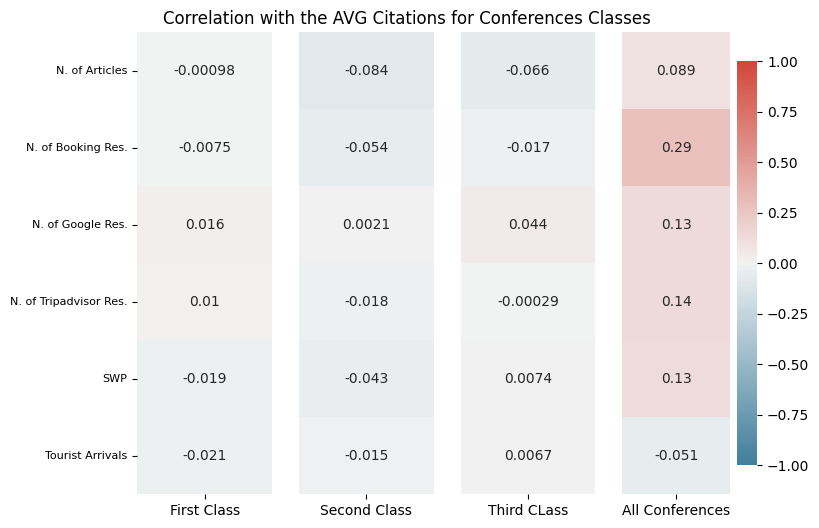

In [151]:
# Correlation values
_k_first = corr_kendall_grin_first_class.rename({'AVG Citations': 'First Class'}, axis=1)
_k_second = corr_kendall_grin_second_class.rename({'AVG Citations': 'Second Class'}, axis=1)
_k_third = corr_kendall_grin_third_class.rename({'AVG Citations': 'Third CLass'}, axis=1)
_k_all_conf = corr_kendall_all_conf.rename({'AVG Citations': 'All Conferences'}, axis=1)

_k_first.drop(['AVG Citations', 'Total Citations'], inplace=True)
_k_second.drop(['AVG Citations', 'Total Citations'], inplace=True)
_k_third.drop(['AVG Citations', 'Total Citations'], inplace=True)
_k_all_conf.drop(['AVG Citations', 'Total Citations'], inplace=True)

_k_first = _k_first.sort_index(axis=0)
_k_second = _k_second.sort_index(axis=0)
_k_third = _k_third.sort_index(axis=0)
_k_all_conf = _k_all_conf.sort_index(axis=0)

#Plot
fig, ax = plt.subplots(1,4, figsize=(8,6))
plt.title("Correlation with the AVG Citations for Conferences Classes", x=-2)
cmap = sns.diverging_palette(230, 15, as_cmap=True)
g = sns.heatmap(_k_first[['First Class']], ax=ax[0], cmap=cmap, cbar=False, vmin=-1, vmax=1, annot=True)
sns.heatmap(_k_second[['Second Class']], ax=ax[1], cmap=cmap, cbar=False, yticklabels=False, vmin=-1, vmax=1, annot=True)
sns.heatmap(_k_third[['Third CLass']], ax=ax[2], cmap=cmap, cbar=False, yticklabels=False, vmin=-1, vmax=1, annot=True)
sns.heatmap(_k_all_conf[['All Conferences']], ax=ax[3], cmap=cmap, yticklabels=False, vmin=-1, vmax=1, annot=True)
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 8)
plt.savefig(path_file_export + 'charts/corr_avg_cit_vs_city_indexes_for_classes_all_conf.png')

Same graph as above but adding a "column" for the not classified conferences:

In [152]:
corr_kendall_not_classified_conf, p_value_kendall_not_classified_conf = compute_correlation(df_city_cit_and_turistic_indexes_grin_unclassified, method='kendall')

/var/folders/gy/9drryydn41lddmpgtpzzxrgw0000gn/T/ipykernel_49169/533427031.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  computed_corr = df.corr(method=method)
/var/folders/gy/9drryydn41lddmpgtpzzxrgw0000gn/T/ipykernel_49169/533427031.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  p_value = df.corr(method=kendalltau_pval)


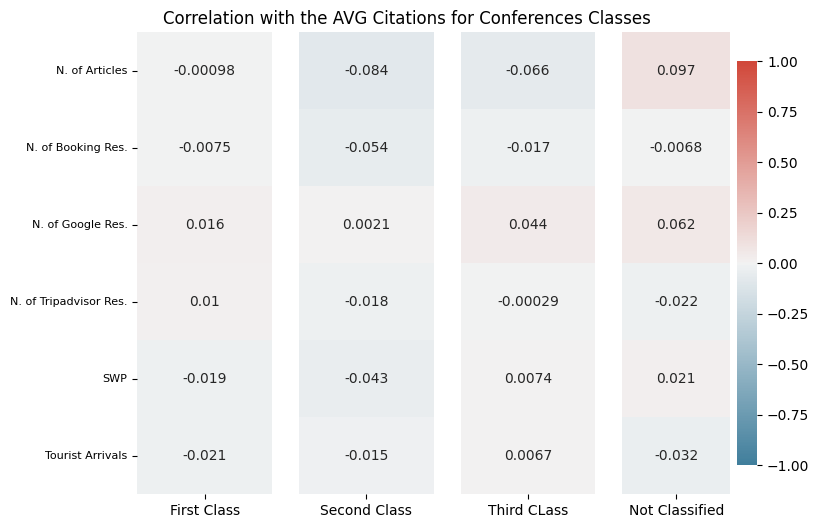

In [153]:
# Correlation values
_k_first = corr_kendall_grin_first_class.rename({'AVG Citations': 'First Class'}, axis=1)
_k_second = corr_kendall_grin_second_class.rename({'AVG Citations': 'Second Class'}, axis=1)
_k_third = corr_kendall_grin_third_class.rename({'AVG Citations': 'Third CLass'}, axis=1)
_k_all_conf = corr_kendall_not_classified_conf.rename({'AVG Citations': 'Not Classified'}, axis=1)

_k_first.drop(['AVG Citations', 'Total Citations'], inplace=True)
_k_second.drop(['AVG Citations', 'Total Citations'], inplace=True)
_k_third.drop(['AVG Citations', 'Total Citations'], inplace=True)
_k_all_conf.drop(['AVG Citations', 'Total Citations'], inplace=True)

_k_first = _k_first.sort_index(axis=0)
_k_second = _k_second.sort_index(axis=0)
_k_third = _k_third.sort_index(axis=0)
_k_all_conf = _k_all_conf.sort_index(axis=0)

#Plot
fig, ax = plt.subplots(1,4, figsize=(8,6))
plt.title("Correlation with the AVG Citations for Conferences Classes", x=-2)
cmap = sns.diverging_palette(230, 15, as_cmap=True)
g = sns.heatmap(_k_first[['First Class']], ax=ax[0], cmap=cmap, cbar=False, vmin=-1, vmax=1, annot=True)
sns.heatmap(_k_second[['Second Class']], ax=ax[1], cmap=cmap, cbar=False, yticklabels=False, vmin=-1, vmax=1, annot=True)
sns.heatmap(_k_third[['Third CLass']], ax=ax[2], cmap=cmap, cbar=False, yticklabels=False, vmin=-1, vmax=1, annot=True)
sns.heatmap(_k_all_conf[['Not Classified']], ax=ax[3], cmap=cmap, yticklabels=False, vmin=-1, vmax=1, annot=True)
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 8)
plt.savefig(path_file_export + 'charts/corr_avg_cit_vs_city_indexes_for_classes_not_classified.png')

#### Creation of the Support Strcutures for the Country Indexes

In [154]:
df_single_conference_with_full_location = df_single_conference_with_location.copy()

df_single_conference_with_full_location["Country"] = np.nan

for index, row in df_single_conference_with_full_location.iterrows():

    splitted_location = row['ConferenceLocation'].split(', ')

    if splitted_location.__len__() == 3:
        df_single_conference_with_full_location.at[index, 'Country'] = splitted_location[2]
        
    elif splitted_location.__len__() == 2:
        df_single_conference_with_full_location.at[index, 'Country'] = splitted_location[1]

df_single_conference_with_full_location

ConferenceNormalizedName  Total Citations  AVG Citations  \
0                    amia 2009             3792    1896.000000   
1                security 2004             1058    1058.000000   
2                    icis 2000              909     909.000000   
3                 neurips 1988             1033     516.500000   
4                 mobicom 2000            13929     497.464286   
...                        ...              ...            ...   
26255                iwec 2016                1       1.000000   
26256              tamoco 2009                1       1.000000   
26257           eurova-ws 2011                1       1.000000   
26258                bled 2005                1       1.000000   
26259              fusion 2016                1       1.000000   

       N. of Articles                        ConferenceLocation        Country  
0                   2  San Francisco, California, United States  United States  
1                   1      San Diego, California, United States  United States  
2                   1      Brisbane City, Queensland, Australia      Australia  
3                   2           Denver, Colorado, United States  United States  
4                  28      Boston, Massachusetts, United States  United States  
...               ...                                       ...            ...  
26255               1                   Vienna, Vienna, Austria        Austria  
26256               1                Merida, Extremadura, Spain          Spain  
26257               1                            Bergen, Norway         Norway  
26258               1                            Bled, Slovenia       Slovenia  
26259               1    Heidelberg, Baden-Württemberg, Germany        Germany  

[26260 rows x 6 columns]

**Join Between the Conference Ranking Data and the Country Indexes**

In [155]:
df_single_conference_full_loc_grin_first_class = pd.merge(left=df_single_conf_grin_first_class, right=df_single_conference_with_full_location.drop(columns=["ConferenceLocation", "Total Citations", "AVG Citations", "N. of Articles"]), on="ConferenceNormalizedName")
df_single_conference_full_loc_grin_second_class = pd.merge(left=df_single_conf_grin_second_class, right=df_single_conference_with_full_location.drop(columns=["ConferenceLocation", "Total Citations", "AVG Citations", "N. of Articles"]), on="ConferenceNormalizedName")
df_single_conference_full_loc_grin_third_class = pd.merge(left=df_single_conf_grin_third_class, right=df_single_conference_with_full_location.drop(columns=["ConferenceLocation", "Total Citations", "AVG Citations", "N. of Articles"]), on="ConferenceNormalizedName")

# unclassified
df_single_conference_full_loc_grin_not_classified = df_single_conference_with_full_location.copy().drop(columns=["ConferenceLocation", "Total Citations", "AVG Citations", "N. of Articles"])
df_single_conference_full_loc_grin_not_classified = pd.concat([df_single_conference_full_loc_grin_not_classified, df_single_conference_full_loc_grin_first_class]).drop_duplicates(keep=False)
df_single_conference_full_loc_grin_not_classified = pd.concat([df_single_conference_full_loc_grin_not_classified, df_single_conference_full_loc_grin_second_class]).drop_duplicates(keep=False)
df_single_conference_full_loc_grin_not_classified = pd.concat([df_single_conference_full_loc_grin_not_classified, df_single_conference_full_loc_grin_third_class]).drop_duplicates(keep=False)

**Creation of the Final Dataframe for the Country Data**

In [156]:
# First Class

df_sum_cit_by_country = df_single_conference_full_loc_grin_first_class.groupby('Country')['Total Citations'].sum()
df_count_cit_by_country = df_single_conference_full_loc_grin_first_class.groupby('Country')['ConferenceLocation'].count()
df_mean_cit_by_country = df_single_conference_full_loc_grin_first_class.groupby('Country')['Total Citations'].mean()

dict_cit_by_country = {}
for k,v in df_sum_cit_by_country.items():
    if not(k == 'None'):
        dict_cit_by_country[k] = [df_mean_cit_by_country[k], v, df_count_cit_by_country[k]]
dict_cit_by_country = {k: v for k, v in sorted(dict_cit_by_country.items(), key=lambda item: item[1], reverse=True)}

df_cit_by_country = pd.DataFrame(data = dict_cit_by_country.values(), index = dict_cit_by_country.keys(), columns = ['AVG Citations', 'Total Citations', 'N. of Editions'])
df_cit_by_country = df_cit_by_country.sort_values('N. of Editions', ascending=False)

df_cit_by_country_reindexed = df_cit_by_country.reset_index(level=0)
df_cit_by_country_reindexed = df_cit_by_country_reindexed.rename(columns={"index": "Country"})
df_country_cit_and_turistic_indexes_grin_first_class = pd.merge(left=df_country_touristic_indexes, right=df_cit_by_country_reindexed, on="Country")
df_country_cit_and_turistic_indexes_grin_first_class = df_country_cit_and_turistic_indexes_grin_first_class.set_index("Country")
#df_country_cit_and_turistic_indexes_grin_first_class = df_country_cit_and_turistic_indexes_grin_first_class.reindex(sorted(df_country_cit_and_turistic_indexes_grin_first_class.columns), axis=1)

In [157]:
# Second Class

df_sum_cit_by_country = df_single_conference_full_loc_grin_second_class.groupby('Country')['Total Citations'].sum()
df_count_cit_by_country = df_single_conference_full_loc_grin_second_class.groupby('Country')['ConferenceLocation'].count()
df_mean_cit_by_country = df_single_conference_full_loc_grin_second_class.groupby('Country')['Total Citations'].mean()

dict_cit_by_country = {}
for k,v in df_sum_cit_by_country.items():
    if not(k == 'None'):
        dict_cit_by_country[k] = [df_mean_cit_by_country[k], v, df_count_cit_by_country[k]]
dict_cit_by_country = {k: v for k, v in sorted(dict_cit_by_country.items(), key=lambda item: item[1], reverse=True)}

df_cit_by_country = pd.DataFrame(data = dict_cit_by_country.values(), index = dict_cit_by_country.keys(), columns = ['AVG Citations', 'Total Citations', 'N. of Editions'])
df_cit_by_country = df_cit_by_country.sort_values('N. of Editions', ascending=False)

df_cit_by_country_reindexed = df_cit_by_country.reset_index(level=0)
df_cit_by_country_reindexed = df_cit_by_country_reindexed.rename(columns={"index": "Country"})
df_country_cit_and_turistic_indexes_grin_second_class = pd.merge(left=df_country_touristic_indexes, right=df_cit_by_country_reindexed, on="Country")
df_country_cit_and_turistic_indexes_grin_second_class = df_country_cit_and_turistic_indexes_grin_second_class.set_index("Country")
#df_country_cit_and_turistic_indexes_grin_second_class = df_country_cit_and_turistic_indexes_grin_second_class.reindex(sorted(df_country_cit_and_turistic_indexes_grin_second_class.columns), axis=1)

In [158]:
# Third Class

df_sum_cit_by_country = df_single_conference_full_loc_grin_third_class.groupby('Country')['Total Citations'].sum()
df_count_cit_by_country = df_single_conference_full_loc_grin_third_class.groupby('Country')['ConferenceLocation'].count()
df_mean_cit_by_country = df_single_conference_full_loc_grin_third_class.groupby('Country')['Total Citations'].mean()

dict_cit_by_country = {}
for k,v in df_sum_cit_by_country.items():
    if not(k == 'None'):
        dict_cit_by_country[k] = [df_mean_cit_by_country[k], v, df_count_cit_by_country[k]]
dict_cit_by_country = {k: v for k, v in sorted(dict_cit_by_country.items(), key=lambda item: item[1], reverse=True)}

df_cit_by_country = pd.DataFrame(data = dict_cit_by_country.values(), index = dict_cit_by_country.keys(), columns = ['AVG Citations', 'Total Citations', 'N. of Editions'])
df_cit_by_country = df_cit_by_country.sort_values('N. of Editions', ascending=False)

df_cit_by_country_reindexed = df_cit_by_country.reset_index(level=0)
df_cit_by_country_reindexed = df_cit_by_country_reindexed.rename(columns={"index": "Country"})
df_country_cit_and_turistic_indexes_grin_third_class = pd.merge(left=df_country_touristic_indexes, right=df_cit_by_country_reindexed, on="Country")
df_country_cit_and_turistic_indexes_grin_third_class = df_country_cit_and_turistic_indexes_grin_third_class.set_index("Country")
#df_country_cit_and_turistic_indexes_grin_third_class = df_country_cit_and_turistic_indexes_grin_third_class.reindex(sorted(df_country_cit_and_turistic_indexes_grin_third_class.columns), axis=1)

In [160]:
# unclassified conferences

df_sum_cit_by_country = df_single_conference_full_loc_grin_not_classified.groupby('Country')['Total Citations'].sum()
df_count_cit_by_country = df_single_conference_full_loc_grin_not_classified.groupby('Country')['ConferenceLocation'].count()
df_mean_cit_by_country = df_single_conference_full_loc_grin_not_classified.groupby('Country')['Total Citations'].mean()

dict_cit_by_country = {}
for k,v in df_sum_cit_by_country.items():
    if not(k == 'None'):
        dict_cit_by_country[k] = [df_mean_cit_by_country[k], v, df_count_cit_by_country[k]]
dict_cit_by_country = {k: v for k, v in sorted(dict_cit_by_country.items(), key=lambda item: item[1], reverse=True)}

df_cit_by_country = pd.DataFrame(data = dict_cit_by_country.values(), index = dict_cit_by_country.keys(), columns = ['AVG Citations', 'Total Citations', 'N. of Editions'])
df_cit_by_country = df_cit_by_country.sort_values('N. of Editions', ascending=False)

df_cit_by_country_reindexed = df_cit_by_country.reset_index(level=0)
df_cit_by_country_reindexed = df_cit_by_country_reindexed.rename(columns={"index": "Country"})
df_country_cit_and_turistic_indexes_grin_not_classified = pd.merge(left=df_country_touristic_indexes, right=df_cit_by_country_reindexed, on="Country")
df_country_cit_and_turistic_indexes_grin_not_classified = df_country_cit_and_turistic_indexes_grin_not_classified.set_index("Country")

In [161]:
# column sort

column_order_country = ['TTCI', 'EE', 'BE', 'SS', 'HH', 'HRLM', 'ICTR', 'TTPEC', 
       'PTT', 'IO', 'PC', 'ES', 'INF', 'ATI', 'GPI', 'TSI', 'NCR', 'NR', 'CRBT',
       'AVG Citations', 'Total Citations', 'N. of Editions']

df_country_cit_and_turistic_indexes_grin_first_class = df_country_cit_and_turistic_indexes_grin_first_class.reindex(column_order_country, axis=1)
df_country_cit_and_turistic_indexes_grin_second_class = df_country_cit_and_turistic_indexes_grin_second_class.reindex(column_order_country, axis=1)
df_country_cit_and_turistic_indexes_grin_third_class = df_country_cit_and_turistic_indexes_grin_third_class.reindex(column_order_country, axis=1)
df_country_cit_and_turistic_indexes_grin_not_classified = df_country_cit_and_turistic_indexes_grin_not_classified.reindex(column_order_country, axis=1)

#### Correlation Plots for the Country Indexes vs AVG Citations

In [162]:
corr_kendall_grin_first_class, p_value_kendall_grin_first_class = compute_correlation(df_country_cit_and_turistic_indexes_grin_first_class, method='kendall')
corr_kendall_grin_second_class, p_value_kendall_grin_second_class = compute_correlation(df_country_cit_and_turistic_indexes_grin_second_class, method='kendall')
corr_kendall_grin_third_class, p_value_kendall_grin_third_class = compute_correlation(df_country_cit_and_turistic_indexes_grin_third_class, method='kendall')

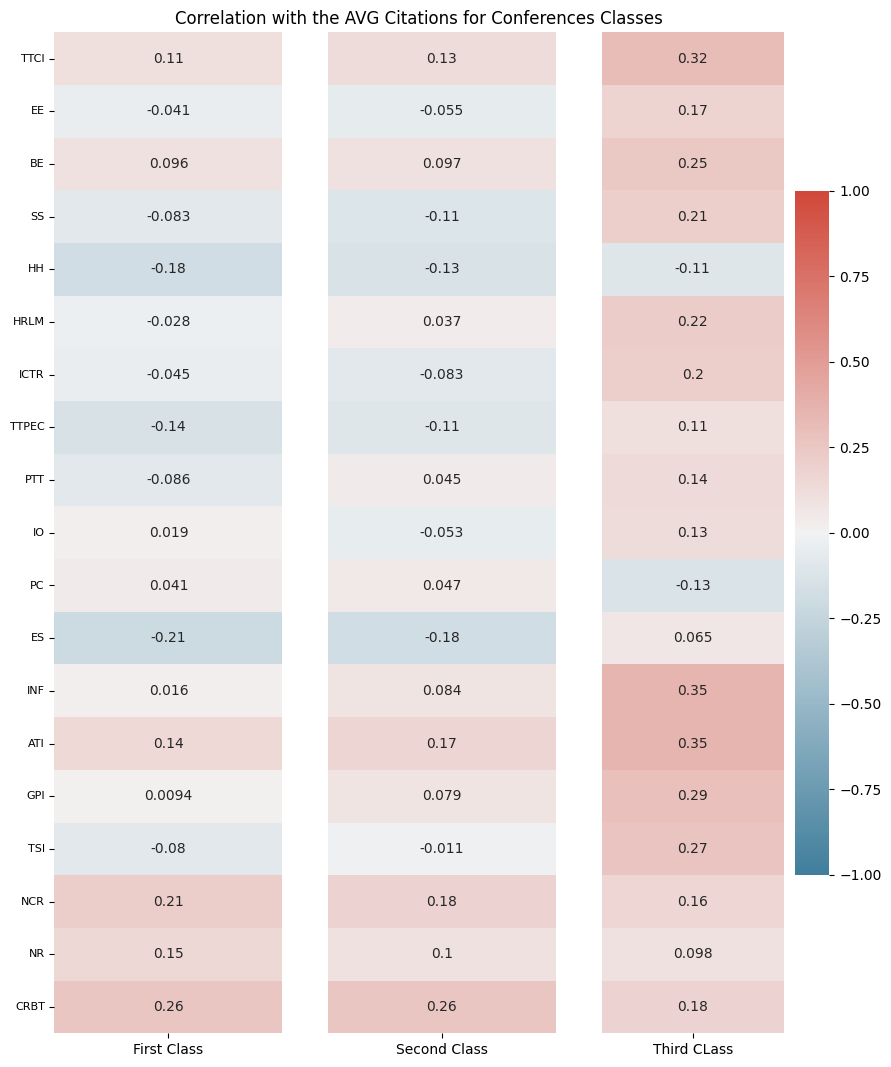

In [163]:
# Correlation values
_k_first = corr_kendall_grin_first_class.rename({'AVG Citations': 'First Class'}, axis=1)
_k_second = corr_kendall_grin_second_class.rename({'AVG Citations': 'Second Class'}, axis=1)
_k_third = corr_kendall_grin_third_class.rename({'AVG Citations': 'Third CLass'}, axis=1)

_k_first.drop(['AVG Citations', 'Total Citations', "N. of Editions"], inplace=True)
_k_second.drop(['AVG Citations', 'Total Citations', "N. of Editions"], inplace=True)
_k_third.drop(['AVG Citations', 'Total Citations', "N. of Editions"], inplace=True)

#Plot
fig, ax = plt.subplots(1,3, figsize=(10, 13))
plt.title("Correlation with the AVG Citations for Conferences Classes", x=-1)
cmap = sns.diverging_palette(230, 15, as_cmap=True)
g = sns.heatmap(_k_first[['First Class']], ax=ax[0], cmap=cmap, cbar=False, vmin=-1, vmax=1, annot=True)
sns.heatmap(_k_second[['Second Class']], ax=ax[1], cmap=cmap, cbar=False, yticklabels=False, vmin=-1, vmax=1, annot=True)
sns.heatmap(_k_third[['Third CLass']], ax=ax[2], cmap=cmap, yticklabels=False, vmin=-1, vmax=1, annot=True)
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 8)
plt.savefig(path_file_export + 'charts/corr_avg_cit_vs_country_indexes_for_classes.png')

Same graph as above but adding a "column" for the whole dataset:

In [164]:
corr_kendall_all_conf, p_value_kendall_all_conf = compute_correlation(df_country_cit_and_turistic_indexes_col_subset, method='kendall')

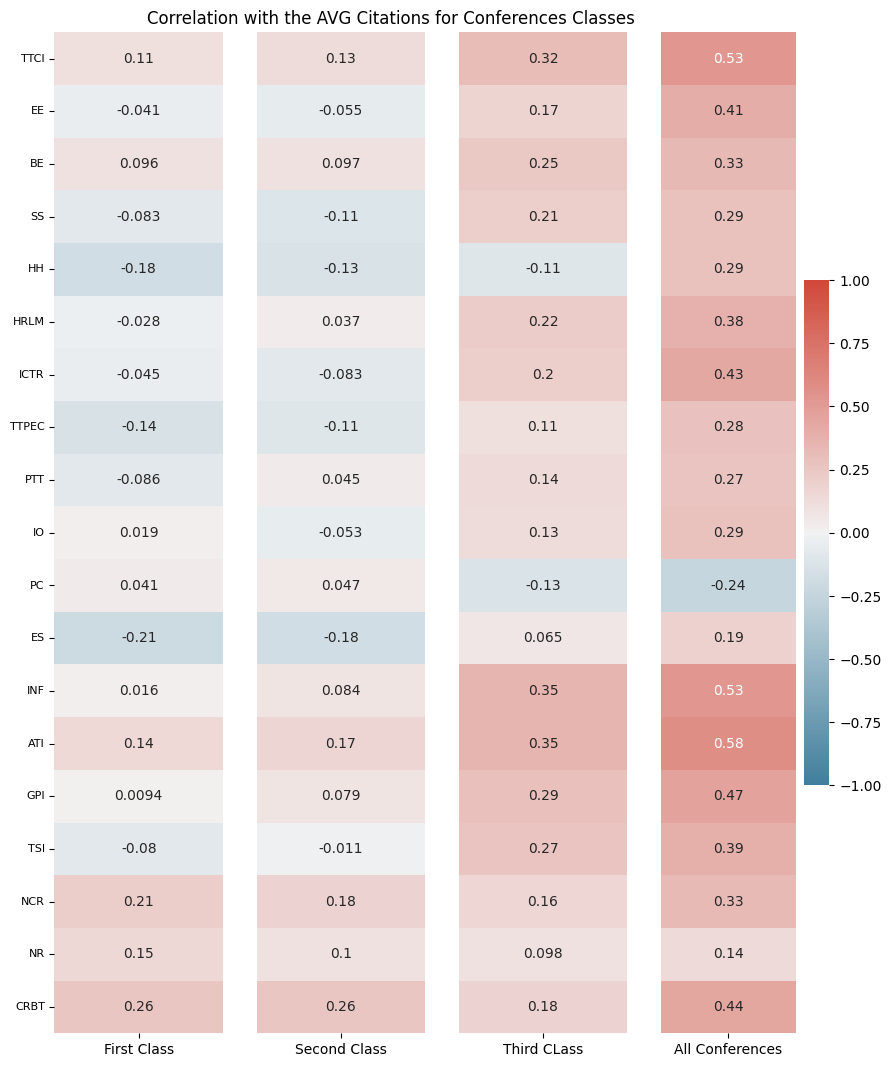

In [165]:
# Correlation values
_k_first = corr_kendall_grin_first_class.rename({'AVG Citations': 'First Class'}, axis=1)
_k_second = corr_kendall_grin_second_class.rename({'AVG Citations': 'Second Class'}, axis=1)
_k_third = corr_kendall_grin_third_class.rename({'AVG Citations': 'Third CLass'}, axis=1)
_k_full = corr_kendall_all_conf.rename({'AVG Citations': 'All Conferences'}, axis=1)

_k_first.drop(['AVG Citations', 'Total Citations', "N. of Editions"], inplace=True)
_k_second.drop(['AVG Citations', 'Total Citations', "N. of Editions"], inplace=True)
_k_third.drop(['AVG Citations', 'Total Citations', "N. of Editions"], inplace=True)
_k_full.drop(['AVG Citations', 'Total Citations'], inplace=True)

#Plot
fig, ax = plt.subplots(1,4, figsize=(10, 13))
plt.title("Correlation with the AVG Citations for Conferences Classes", x=-2)
cmap = sns.diverging_palette(230, 15, as_cmap=True)
g = sns.heatmap(_k_first[['First Class']], ax=ax[0], cmap=cmap, cbar=False, vmin=-1, vmax=1, annot=True)
sns.heatmap(_k_second[['Second Class']], ax=ax[1], cmap=cmap, cbar=False, yticklabels=False, vmin=-1, vmax=1, annot=True)
sns.heatmap(_k_third[['Third CLass']], ax=ax[2], cmap=cmap, cbar=False, yticklabels=False, vmin=-1, vmax=1, annot=True)
sns.heatmap(_k_full[['All Conferences']], ax=ax[3], cmap=cmap, yticklabels=False, vmin=-1, vmax=1, annot=True)
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 8)
plt.savefig(path_file_export + 'charts/corr_avg_cit_vs_country_indexes_for_classes_all_conf.png')

Same graph as above but adding a "column" for the not classified conferences dataset:

In [166]:
corr_kendall_not_classified_conf, p_value_kendall_not_classified_conf = compute_correlation(df_country_cit_and_turistic_indexes_grin_not_classified, method='kendall')

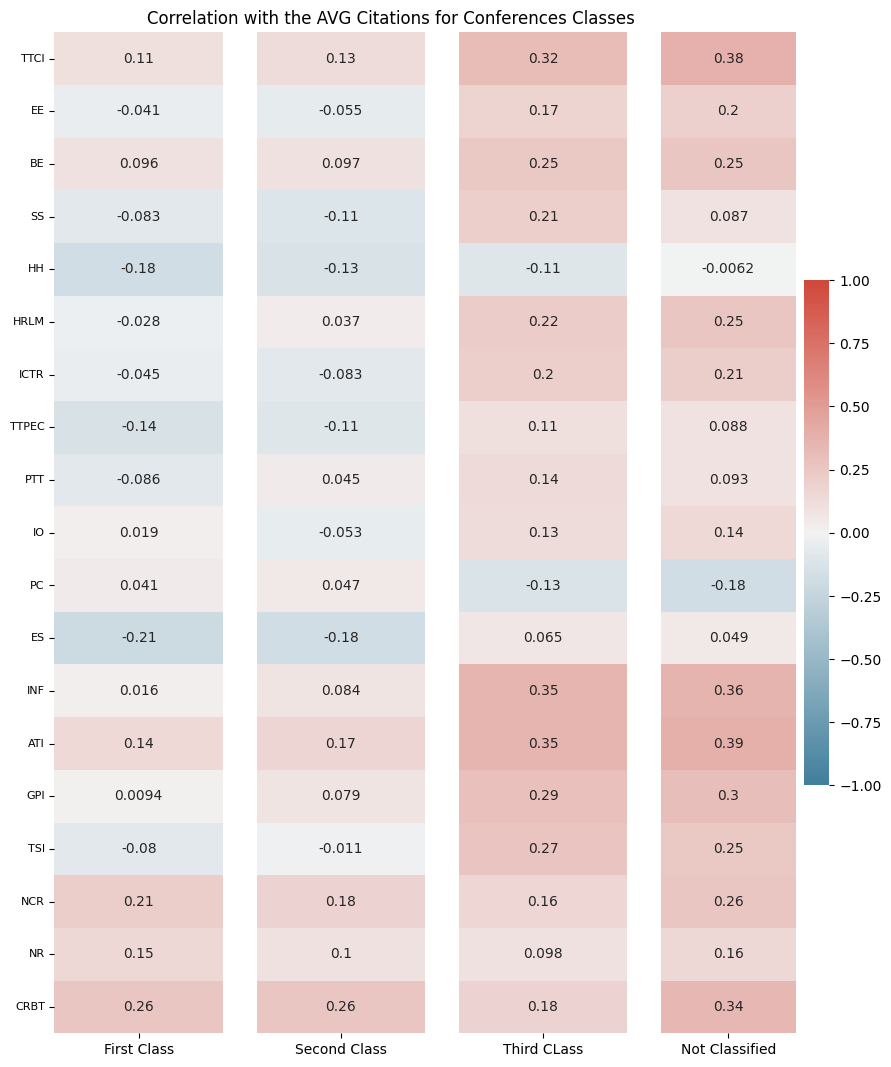

In [167]:
# Correlation values
_k_first = corr_kendall_grin_first_class.rename({'AVG Citations': 'First Class'}, axis=1)
_k_second = corr_kendall_grin_second_class.rename({'AVG Citations': 'Second Class'}, axis=1)
_k_third = corr_kendall_grin_third_class.rename({'AVG Citations': 'Third CLass'}, axis=1)
_k_full = corr_kendall_not_classified_conf.rename({'AVG Citations': 'Not Classified'}, axis=1)

_k_first.drop(['AVG Citations', 'Total Citations', "N. of Editions"], inplace=True)
_k_second.drop(['AVG Citations', 'Total Citations', "N. of Editions"], inplace=True)
_k_third.drop(['AVG Citations', 'Total Citations', "N. of Editions"], inplace=True)
_k_full.drop(['AVG Citations', 'Total Citations', "N. of Editions"], inplace=True)

#Plot
fig, ax = plt.subplots(1,4, figsize=(10, 13))
plt.title("Correlation with the AVG Citations for Conferences Classes", x=-2)
cmap = sns.diverging_palette(230, 15, as_cmap=True)
g = sns.heatmap(_k_first[['First Class']], ax=ax[0], cmap=cmap, cbar=False, vmin=-1, vmax=1, annot=True)
sns.heatmap(_k_second[['Second Class']], ax=ax[1], cmap=cmap, cbar=False, yticklabels=False, vmin=-1, vmax=1, annot=True)
sns.heatmap(_k_third[['Third CLass']], ax=ax[2], cmap=cmap, cbar=False, yticklabels=False, vmin=-1, vmax=1, annot=True)
sns.heatmap(_k_full[['Not Classified']], ax=ax[3], cmap=cmap, yticklabels=False, vmin=-1, vmax=1, annot=True)
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 8)
plt.savefig(path_file_export + 'charts/corr_avg_cit_vs_country_indexes_for_classes_not_classified_conf.png')